The NFL Combine is the premier event for prospective college football athletes to showcase their athletic abilities to their future NFL team. This annual event attracts scouts, coaches, team owners, and team executives to Indianapolis, all in hopes of finding and evaluating the future players that will carry the future of their franchises. In addition, the NFL Combine is televised to give the general public a first-hand look into the raw athletic abilities of some of the best athletes on the planet.

Each year, the NFL's Selection Committee thoroughly examines thousands of hours of college football film to identify the players with the highest potential to be drafted, then sends out a combine invitation to those selected players. With rare exceptions, the only situations in which players decline to show up for the NFL Combine are debilitating injuries/illnesses or family emergencies.

The NFL Combine offers players the option to choose which exercises to participate in. There is a standard core set of measurable exercises, which is the main focus of this project, as well as subjective drills (ie throwing passes, interception drills, etc). The measured exercises that we will focus on are the following:

1. 40 Yard Dash - Time, in seconds, that a player covers 40 yards
2. Bench Press - The number of repetitions that a player is able to bench press 225 pounds until failure
3. Vertical Leap - The number of inches that a player is able to jump from a standing position
4. Broad Jump - The number of inches that a player jumps forward and land squarely on both feet
5. Shuttle - The time, in seconds, it takes a player to run 5 yards, then 10 yards in the opposite direction, then 5 yards back. This exercise is used to measure lateral quickness.
6. 3Cone Drill - The time, in seconds, it takes a player to make an L shape through 3 cones.

After the NFL Combine, the teams evaluate and interview the players, then come together for the NFL Draft. This consists of 7 rounds of about 32 players each (~230 players drafted) in which teams go in order and select players in each round, where the teams with the worst regular season records usually go first in selecting available players in the selection pool. The difference in contract values in each of these rounds is immense - for example, the 2017 Draft's first overall pick, Myles Garrett, sigend a 4 year, 30 million dollar contract, while the first pick of the 2nd Round, Kevin King, signed a 4 year, 7 million dollar contract.

The purpose of this project exercise is to find trends between performance at the NFL Combine and how highly these players are drafted. In doing so, both the teams and prospective players both have a clearer understanding of what this historical data looks like and how they stand comparatively to past performances. For players, these insights will serve to give clear benchmarks to help shape their training goals, as well as give proper perspective on how they stand relative to past performances. For NFL teams, this project will give a more in-depth, multi-dimensional, and quantitative methodology for understanding how great or poor an NFL Combine performance is.

Every major evaluator of talent (scout, General Manager, head coach, player personnel staff, etc) usually has a strong ability to make a fairly consistent heuristic analysis of what level a player is based on their Combine measurables. For example, any strength and conditioning coach at the college level could probably break down what are solid combine numbers for a player at a given position to get drafted. However, the ability for any human brain to process and compute the quantitative relationships of performance and Draft selection across many important dimensions like weight, height, and position becomes incredibly difficult at a large scale.

The data analysis and visualization from this project aims to provide in-depth, empirical analysis on the relationship between performance at the NFL Combine and performance in the NFL Draft. We will do so by grouping players by their positions, then creating violinplots (to show the range and concentration of each position group) and running regressions on the scatterplots across various exercises (to show the spread of the data and arrive at a function for the best fit line).

Three regression lines, seperated by Draft performance (Drafted in Rounds 1-3, Drafted in Rounds 4-7, Undrafted) have been run to show the relationship between various combine exercises against weight. We chose weight because it is the single most import variable that gives context and relevance to a certain exercise. For example, a 180 pound player running a 4.7 second 40-yard dash is considered an atrocious time, while it would be an absolutely amazing time for a 300 pound lineman.

So what does the data tell us?

The first, and most obvious question to answer, is whether or not there was a noticeable difference between the performances of those drafted in Rounds 1-3, 4-7, and those that went Undrafted.

The timed exercises - 40 yard dash, Shuttle, and 3Cone are exercises in which a lower time value is considered a better performance. On the contrary, bench press, vertical leap, and broad jump are considered better performances when the number is larger. 

When looking at the scatterplots and their regressions, we can confirm what seems to be the most self-obvious hypothesis, which is that players drafted earlier tend to have better combine performances. We can see this as most of the regression lines follow the predictable order of Rounds 1-3 having the best results, then Rounds 4-7, then Undrafted. In every exercise (with all position groups consolidated), every regression line strictly dominates the next.

As expected, the following exercises have a positive correlation with weight - Bench Press, 40 yard dash, Shuttle, and 3Cone. Vertical Leap and Broad Jump exhibit an expected negative correlation.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#import datasets
combine_measurables = pd.read_csv('CombineMeasurables.csv')
rounds = pd.read_csv('NFL_Draft_Rounds.csv')

In [2]:
#Data Wrangling

#We want all columns except College
combine_measurables = combine_measurables[['Year', 'Name', 'POS', 'Height', 'Weight', 'Wonderlic', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump', 'Shuttle', '3Cone']]

#We only want the following columns from rounds - Player, Year, Round, and Pos
rounds = rounds[['Player', 'Year', 'Rnd', 'Pos']]

#Rename columns to make join operation easier
combine_measurables = combine_measurables.rename(index = str, columns = {'Name': 'Player', 'POS':'Pos'})

#With this dataset, we need to eliminate all values for which Year < 1987, since NFL Combine started in 1987
rounds = rounds[rounds['Year'] >= 1987]

#Because there used to be 12 Rounds in the NFL Draft in the old days, as opposed to 7 now, we will standardize by eliminating all rows with anybody in the past drafted past the 7th round
rounds = rounds[rounds['Rnd'] <= 7]

#Eliminate Punters, "P", and Kickers, "K", from list, as their success has almost no correlation to Combine results
rounds = rounds[rounds['Pos'] != 'K']
rounds = rounds[rounds['Pos'] != 'P']
combine_measurables = combine_measurables[combine_measurables['Pos'] != 'K']
combine_measurables = combine_measurables[combine_measurables['Pos'] != 'P']

#Consolidate, using for consolidate() method, position groups to standard superset to reduce number of dimensions. For example, Defensive Backs have similar measurables and consist of Cornerbacks, Strong Safeties, and Free Safeties.
def consolidate(i):
    if i == 'CB' or i == 'FS' or i == 'SS':
        return 'DB'
    elif i == 'ILB' or i == 'OLB':
        return 'LB'
    elif i == 'NT' or i == 'DE' or i == 'DT':
        return 'DL'
    elif i == 'C' or i == 'LS' or i == 'G' or i == 'T' or i == 'OT' or i == 'OG':
        return 'OL'
    else:
        return str(i)

#Apply the consolidate() method to 'Pos' columns for both dataframes
rounds['Pos'] = rounds['Pos'].apply(consolidate)
combine_measurables['Pos'] = combine_measurables['Pos'].apply(consolidate)

In [3]:
#Left Join on the two columns to attach the 'Rnd' column to combine_measurables. We want the NaN values because this represents the group of players that went undrafted, and we will change those values later
df_joined = combine_measurables.merge(rounds, how = 'left', on = ['Year', 'Player', 'Pos'])


#We can now drop the columns 'Year' and 'Player', as they no longer serve a purpose
df_joined = df_joined[['Rnd', 'Pos', 'Height', 'Weight', 'Wonderlic', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump', 'Shuttle', '3Cone']]

#We want to divide the rounds in which players was drafted
def consolidate_rounds(i):
    if i == 1 or i == 2 or i == 3:
        return '1-3'
    elif i == 4 or i == 5 or i == 6 or i == 7:
        return '4-7'
    else:
        return 'Undrafted'

#Now, Rnd will be a category (1-3, 4-7, or Undrafted) instead of an integer or NaN
df_joined['Rnd'] = df_joined['Rnd'].apply(consolidate_rounds)


In [4]:
#Create dataframes split by position groups

df_OL = df_joined[df_joined['Pos'] == 'OL']
df_DB = df_joined[df_joined['Pos'] == 'DB']
df_DL = df_joined[df_joined['Pos'] == 'DL']
df_FB = df_joined[df_joined['Pos'] == 'FB']
df_LB = df_joined[df_joined['Pos'] == 'LB']
df_QB = df_joined[df_joined['Pos'] == 'QB']
df_RB = df_joined[df_joined['Pos'] == 'RB']
df_TE = df_joined[df_joined['Pos'] == 'TE']
df_WR = df_joined[df_joined['Pos'] == 'WR']

#Find Mean Weights to find values for each regression model
mean_weight_OL = np.mean(df_OL['Weight'])
mean_weight_DB = np.mean(df_DB['Weight'])
mean_weight_DL = np.mean(df_DL['Weight'])
mean_weight_FB = np.mean(df_FB['Weight'])
mean_weight_LB = np.mean(df_LB['Weight'])
mean_weight_QB = np.mean(df_QB['Weight'])
mean_weight_RB = np.mean(df_RB['Weight'])
mean_weight_TE = np.mean(df_TE['Weight'])
mean_weight_WR = np.mean(df_WR['Weight'])



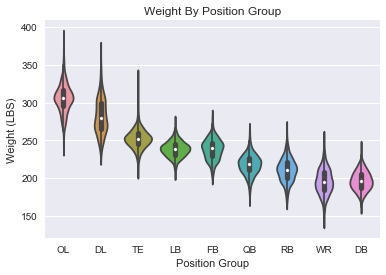

In [5]:
#Create a violinplot for weight of each position group
Weight_df_pos = df_joined[['Pos', 'Weight']].dropna()
Weight_df_pos = Weight_df_pos[Weight_df_pos['Weight'] != 163]

sns.set()
_ = sns.violinplot('Pos', 'Weight', data = Weight_df_pos, order = ['OL', 'DL', 'TE', 'LB', 'FB', 'QB', 'RB', 'WR', 'DB'])
_ = plt.xlabel('Position Group')
_ = plt.ylabel('Weight (LBS)')
_ = plt.title('Weight By Position Group')
_ = plt.show()


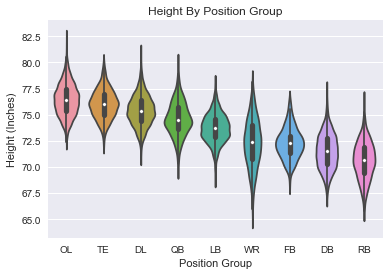

In [33]:
#Create a violinplot for height of each position group
Height_df_pos = df_joined[['Pos', 'Height']].dropna()

#remove outlier in TE (5' 5")
Height_df_pos = Height_df_pos[Height_df_pos['Height'] != 64.9]


sns.set()
_ = sns.violinplot('Pos', 'Height', data = Height_df_pos, order = ['OL', 'TE', 'DL', 'QB', 'LB', 'WR', 'FB', 'DB', 'RB'])
_ = plt.xlabel('Position Group')
_ = plt.ylabel('Height (Inches)')
_ = plt.title('Height By Position Group')
_ = plt.show()



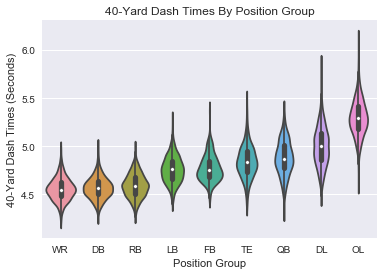

In [34]:
#Create a violinplot for 40 Yard dash times, grouped by position
forty_yard_df_pos = df_joined[['Pos', '40_Yard']].dropna()

sns.set()
_ = sns.violinplot('Pos', '40_Yard', data = forty_yard_df_pos, order = ['WR', 'DB', 'RB', 'LB', 'FB', 'TE', 'QB', 'DL', 'OL'])
_ = plt.xlabel('Position Group')
_ = plt.ylabel('40-Yard Dash Times (Seconds)')
_ = plt.title('40-Yard Dash Times By Position Group')
_ = plt.show()

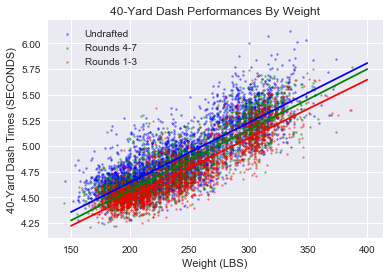

Regression for Undrafted: y=0.00580709793575x + 3.48423661243, R-Squared = 0.688453607181
Regression for Rounds 4-7: y=0.00590284696523x + 3.38716539501, R-Squared = 0.763116900873
Regression for Rounds 1-3: y=0.0056979658304x + 3.36575771469, R-Squared = 0.758969510135


In [8]:
#Create a scatterplot of 40 yard dash times against weight, split by Round dimension (Undrafted, Rounds 4-7, Rounds 1-3)

forty_yard_df_weight_13 = df_joined[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_df_weight_13 = forty_yard_df_weight_13[forty_yard_df_weight_13['Rnd'] == '1-3']

forty_yard_df_weight_47 = df_joined[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_df_weight_47 = forty_yard_df_weight_47[forty_yard_df_weight_47['Rnd'] == '4-7']

forty_yard_df_weight_Undrafted = df_joined[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_df_weight_Undrafted = forty_yard_df_weight_Undrafted[forty_yard_df_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,400])
m_Undrafted, b_Undrafted = np.polyfit(forty_yard_df_weight_Undrafted['Weight'], forty_yard_df_weight_Undrafted['40_Yard'], deg=1)
m_47, b_47 = np.polyfit(forty_yard_df_weight_47['Weight'], forty_yard_df_weight_47['40_Yard'], deg=1)
m_13, b_13 = np.polyfit(forty_yard_df_weight_13['Weight'], forty_yard_df_weight_13['40_Yard'], deg=1)


#calculate R squared of each group
def rsquared(x, y):

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

forty_rsquared_Undrafted = rsquared(forty_yard_df_weight_Undrafted['Weight'], forty_yard_df_weight_Undrafted['40_Yard'])
forty_rsquared_47 = rsquared(forty_yard_df_weight_47['Weight'], forty_yard_df_weight_47['40_Yard'])
forty_rsquared_13 = rsquared(forty_yard_df_weight_13['Weight'], forty_yard_df_weight_13['40_Yard'])


#plotting regression lines
_ = plt.plot(x, m_Undrafted*x + b_Undrafted, color = 'blue')
_ = plt.plot(x, m_47*x + b_47, color = 'green')
_ = plt.plot(x, m_13*x + b_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', '40_Yard', data = forty_yard_df_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '40_Yard', data = forty_yard_df_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '40_Yard', data = forty_yard_df_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('40-Yard Dash Times (SECONDS)')
_ = plt.title('40-Yard Dash Performances By Weight')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_Undrafted) + 'x + ' + str(b_Undrafted) + ', R-Squared = ' + str(forty_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_47) + 'x + ' + str(b_47) + ', R-Squared = ' + str(forty_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_13) + 'x + ' + str(b_13) + ', R-Squared = ' + str(forty_rsquared_13))

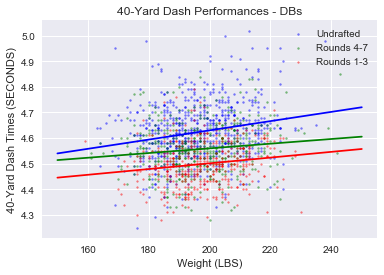

Regression for Undrafted: y=0.00180484770438x + 4.26890470981, R-Squared = 0.0432370138062
Regression for Rounds 4-7: y=0.000915727966408x + 4.37628421537, R-Squared = 0.0159635935797
Regression for Rounds 1-3: y=0.00112073307781x + 4.27683541661, R-Squared = 0.022854123052
Mean Value for Undrafted: 4.62351687668
Mean Value for Rounds 4-7: 4.5562042594
Mean Value for Rounds 1-3: 4.49703437536
Mean Weight: 196.47761194029852 LBS


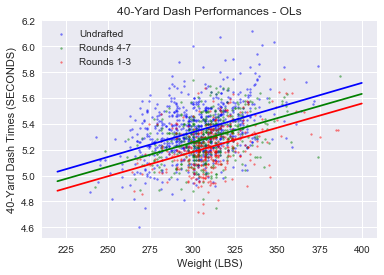

Regression for Undrafted: y=0.00381260671685x + 4.1915508961, R-Squared = 0.155123794338
Regression for Rounds 4-7: y=0.00375092684363x + 4.13124809234, R-Squared = 0.156602510563
Regression for Rounds 1-3: y=0.00374618916064x + 4.05872473067, R-Squared = 0.152680600908
Mean Value for Undrafted: 5.35794744432
Mean Value for Rounds 4-7: 5.27877482351
Mean Value for Rounds 1-3: 5.20480205531
Mean Weight: 305.93151479976785 LBS


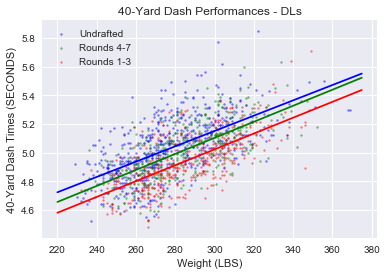

Regression for Undrafted: y=0.00534921983766x + 3.54575902903, R-Squared = 0.373481295445
Regression for Rounds 4-7: y=0.00559956848089x + 3.42285182703, R-Squared = 0.439998270068
Regression for Rounds 1-3: y=0.00553273816241x + 3.36217564204, R-Squared = 0.439680533048
Mean Value for Undrafted: 5.0539705023
Mean Value for Rounds 4-7: 5.00164905065
Mean Value for Rounds 1-3: 4.92213007061
Mean Weight: 281.94980184940556 LBS


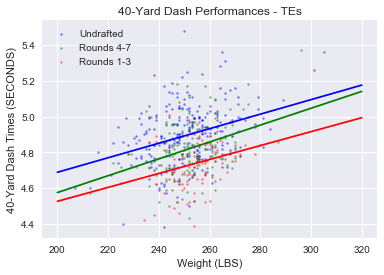

Regression for Undrafted: y=0.00406597562475x + 3.87478780641, R-Squared = 0.117232999892
Regression for Rounds 4-7: y=0.00471696239873x + 3.63120688442, R-Squared = 0.127259382708
Regression for Rounds 1-3: y=0.00390028034597x + 3.74534340181, R-Squared = 0.0699751421193
Mean Value for Undrafted: 4.89879953212
Mean Value for Rounds 4-7: 4.81916895103
Mean Value for Rounds 1-3: 4.72762494415
Mean Weight: 251.84895833333334 LBS


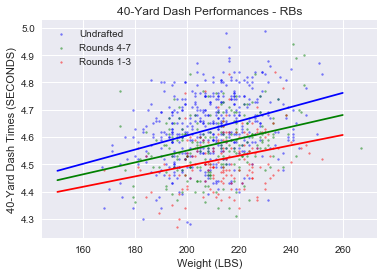

Regression for Undrafted: y=0.00259721366964x + 4.08648783528, R-Squared = 0.108831209504
Regression for Rounds 4-7: y=0.00217314065761x + 4.11569860292, R-Squared = 0.0921811391395
Regression for Rounds 1-3: y=0.00189825797453x + 4.11394480701, R-Squared = 0.0703110026497
Mean Value for Undrafted: 4.63418938316
Mean Value for Rounds 4-7: 4.57397144964
Mean Value for Rounds 1-3: 4.51425027401
Mean Weight: 210.8804347826087 LBS


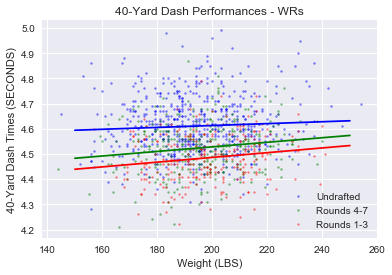

Regression for Undrafted: y=0.000375248629906x + 4.53765646229, R-Squared = 0.00348715402885
Regression for Rounds 4-7: y=0.000906128816159x + 4.34679923138, R-Squared = 0.021884712633
Regression for Rounds 1-3: y=0.000940110503097x + 4.29813891597, R-Squared = 0.0241204827702
Mean Value for Undrafted: 4.61103788002
Mean Value for Rounds 4-7: 4.52399645976
Mean Value for Rounds 1-3: 4.48198140343
Mean Weight: 195.55412566237698 LBS


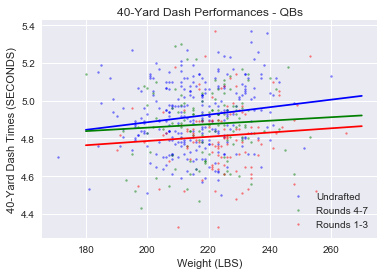

Regression for Undrafted: y=0.00200120688221x + 4.48556849262, R-Squared = 0.0248402558524
Regression for Rounds 4-7: y=0.000923092563023x + 4.6727857649, R-Squared = 0.00435881441339
Regression for Rounds 1-3: y=0.00112367759123x + 4.56181286413, R-Squared = 0.00597281121632
Mean Weight: 218.18275862068967 LBS


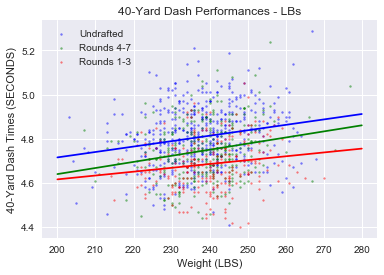

Regression for Undrafted: y=0.00245659182335x + 4.22385747918, R-Squared = 0.0415644448166
Regression for Rounds 4-7: y=0.00276068339808x + 4.08748123435, R-Squared = 0.0424402359088
Regression for Rounds 1-3: y=0.00174134077291x + 4.26742256192, R-Squared = 0.020867242118
Mean Value for Undrafted: 4.80958736737
Mean Value for Rounds 4-7: 4.74571625846
Mean Value for Rounds 1-3: 4.6826137738
Mean Weight: 238.43191311612364 LBS


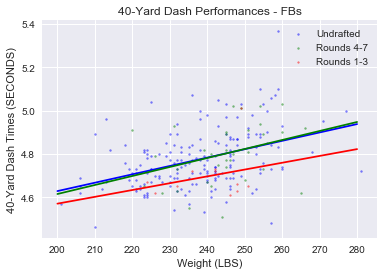

Regression for Undrafted: y=0.00387175157245x + 3.85380790014, R-Squared = 0.1630249657
Regression for Rounds 4-7: y=0.00416156552755x + 3.78238636911, R-Squared = 0.126710419088
Regression for Rounds 1-3: y=0.00315175879397x + 3.93970452261, R-Squared = 0.0721032650853
Mean Value for Undrafted: 4.77686157643
Mean Value for Rounds 4-7: 4.77453379579
Mean Value for Rounds 1-3: 4.69110669476
Mean Weight: 238.40725806451613 LBS


In [9]:
#Scatterplot for DB Group - 40 yard dash
forty_yard_db_weight_13 = df_DB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_db_weight_13 = forty_yard_db_weight_13[forty_yard_db_weight_13['Rnd'] == '1-3']

forty_yard_db_weight_47 = df_DB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_db_weight_47 = forty_yard_db_weight_47[forty_yard_db_weight_47['Rnd'] == '4-7']

forty_yard_db_weight_Undrafted = df_DB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_db_weight_Undrafted = forty_yard_db_weight_Undrafted[forty_yard_db_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,250])
m_db_Undrafted, b_db_Undrafted = np.polyfit(forty_yard_db_weight_Undrafted['Weight'], forty_yard_db_weight_Undrafted['40_Yard'], deg=1)
m_db_47, b_db_47 = np.polyfit(forty_yard_db_weight_47['Weight'], forty_yard_db_weight_47['40_Yard'], deg=1)
m_db_13, b_db_13 = np.polyfit(forty_yard_db_weight_13['Weight'], forty_yard_db_weight_13['40_Yard'], deg=1)

forty_db_rsquared_Undrafted = rsquared(forty_yard_db_weight_Undrafted['Weight'], forty_yard_db_weight_Undrafted['40_Yard'])
forty_db_rsquared_47 = rsquared(forty_yard_db_weight_47['Weight'], forty_yard_db_weight_47['40_Yard'])
forty_db_rsquared_13 = rsquared(forty_yard_db_weight_13['Weight'], forty_yard_db_weight_13['40_Yard'])


#plotting regression lines
_ = plt.plot(x, m_db_Undrafted*x + b_db_Undrafted, color = 'blue')
_ = plt.plot(x, m_db_47*x + b_db_47, color = 'green')
_ = plt.plot(x, m_db_13*x + b_db_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', '40_Yard', data = forty_yard_db_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '40_Yard', data = forty_yard_db_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '40_Yard', data = forty_yard_db_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('40-Yard Dash Times (SECONDS)')
_ = plt.title('40-Yard Dash Performances - DBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_db_Undrafted) + 'x + ' + str(b_db_Undrafted) + ', R-Squared = ' + str(forty_db_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_db_47) + 'x + ' + str(b_db_47) + ', R-Squared = ' + str(forty_db_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_db_13) + 'x + ' + str(b_db_13) + ', R-Squared = ' + str(forty_db_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_db_Undrafted*mean_weight_DB+b_db_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_db_47*mean_weight_DB+b_db_47))
print('Mean Value for Rounds 1-3: ' + str(m_db_13*mean_weight_DB+b_db_13))
print('Mean Weight: ' + str(mean_weight_DB) + ' LBS')

#Scatterplot for OL Group
forty_yard_OL_weight_13 = df_OL[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_OL_weight_13 = forty_yard_OL_weight_13[forty_yard_OL_weight_13['Rnd'] == '1-3']

forty_yard_OL_weight_47 = df_OL[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_OL_weight_47 = forty_yard_OL_weight_47[forty_yard_OL_weight_47['Rnd'] == '4-7']

forty_yard_OL_weight_Undrafted = df_OL[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_OL_weight_Undrafted = forty_yard_OL_weight_Undrafted[forty_yard_OL_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([220,400])
m_OL_Undrafted, b_OL_Undrafted = np.polyfit(forty_yard_OL_weight_Undrafted['Weight'], forty_yard_OL_weight_Undrafted['40_Yard'], deg=1)
m_OL_47, b_OL_47 = np.polyfit(forty_yard_OL_weight_47['Weight'], forty_yard_OL_weight_47['40_Yard'], deg=1)
m_OL_13, b_OL_13 = np.polyfit(forty_yard_OL_weight_13['Weight'], forty_yard_OL_weight_13['40_Yard'], deg=1)

forty_OL_rsquared_Undrafted = rsquared(forty_yard_OL_weight_Undrafted['Weight'], forty_yard_OL_weight_Undrafted['40_Yard'])
forty_OL_rsquared_47 = rsquared(forty_yard_OL_weight_47['Weight'], forty_yard_OL_weight_47['40_Yard'])
forty_OL_rsquared_13 = rsquared(forty_yard_OL_weight_13['Weight'], forty_yard_OL_weight_13['40_Yard'])


#plotting regression lines
_ = plt.plot(x, m_OL_Undrafted*x + b_OL_Undrafted, color = 'blue')
_ = plt.plot(x, m_OL_47*x + b_OL_47, color = 'green')
_ = plt.plot(x, m_OL_13*x + b_OL_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', '40_Yard', data = forty_yard_OL_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '40_Yard', data = forty_yard_OL_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '40_Yard', data = forty_yard_OL_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('40-Yard Dash Times (SECONDS)')
_ = plt.title('40-Yard Dash Performances - OLs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_OL_Undrafted) + 'x + ' + str(b_OL_Undrafted) + ', R-Squared = ' + str(forty_OL_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_OL_47) + 'x + ' + str(b_OL_47) + ', R-Squared = ' + str(forty_OL_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_OL_13) + 'x + ' + str(b_OL_13) + ', R-Squared = ' + str(forty_OL_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_OL_Undrafted*mean_weight_OL+b_OL_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_OL_47*mean_weight_OL+b_OL_47))
print('Mean Value for Rounds 1-3: ' + str(m_OL_13*mean_weight_OL+b_OL_13))
print('Mean Weight: ' + str(mean_weight_OL) + ' LBS')

#scatterplot for 40 yard dash for DL Group
forty_yard_DL_weight_13 = df_DL[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_DL_weight_13 = forty_yard_DL_weight_13[forty_yard_DL_weight_13['Rnd'] == '1-3']

forty_yard_DL_weight_47 = df_DL[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_DL_weight_47 = forty_yard_DL_weight_47[forty_yard_DL_weight_47['Rnd'] == '4-7']

forty_yard_DL_weight_Undrafted = df_DL[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_DL_weight_Undrafted = forty_yard_DL_weight_Undrafted[forty_yard_DL_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([220,375])
m_DL_Undrafted, b_DL_Undrafted = np.polyfit(forty_yard_DL_weight_Undrafted['Weight'], forty_yard_DL_weight_Undrafted['40_Yard'], deg=1)
m_DL_47, b_DL_47 = np.polyfit(forty_yard_DL_weight_47['Weight'], forty_yard_DL_weight_47['40_Yard'], deg=1)
m_DL_13, b_DL_13 = np.polyfit(forty_yard_DL_weight_13['Weight'], forty_yard_DL_weight_13['40_Yard'], deg=1)

forty_DL_rsquared_Undrafted = rsquared(forty_yard_DL_weight_Undrafted['Weight'], forty_yard_DL_weight_Undrafted['40_Yard'])
forty_DL_rsquared_47 = rsquared(forty_yard_DL_weight_47['Weight'], forty_yard_DL_weight_47['40_Yard'])
forty_DL_rsquared_13 = rsquared(forty_yard_DL_weight_13['Weight'], forty_yard_DL_weight_13['40_Yard'])


#plotting regression lines
_ = plt.plot(x, m_DL_Undrafted*x + b_DL_Undrafted, color = 'blue')
_ = plt.plot(x, m_DL_47*x + b_DL_47, color = 'green')
_ = plt.plot(x, m_DL_13*x + b_DL_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', '40_Yard', data = forty_yard_DL_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '40_Yard', data = forty_yard_DL_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '40_Yard', data = forty_yard_DL_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('40-Yard Dash Times (SECONDS)')
_ = plt.title('40-Yard Dash Performances - DLs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_DL_Undrafted) + 'x + ' + str(b_DL_Undrafted) + ', R-Squared = ' + str(forty_DL_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_DL_47) + 'x + ' + str(b_DL_47) + ', R-Squared = ' + str(forty_DL_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_DL_13) + 'x + ' + str(b_DL_13) + ', R-Squared = ' + str(forty_DL_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_DL_Undrafted*mean_weight_DL+b_DL_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_DL_47*mean_weight_DL+b_DL_47))
print('Mean Value for Rounds 1-3: ' + str(m_DL_13*mean_weight_DL+b_DL_13))
print('Mean Weight: ' + str(mean_weight_DL) + ' LBS')

#scatterplot for 40 yard dash for TE Group
forty_yard_TE_weight_13 = df_TE[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_TE_weight_13 = forty_yard_TE_weight_13[forty_yard_TE_weight_13['Rnd'] == '1-3']

forty_yard_TE_weight_47 = df_TE[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_TE_weight_47 = forty_yard_TE_weight_47[forty_yard_TE_weight_47['Rnd'] == '4-7']

forty_yard_TE_weight_Undrafted = df_TE[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_TE_weight_Undrafted = forty_yard_TE_weight_Undrafted[forty_yard_TE_weight_Undrafted['Rnd'] == 'Undrafted']
forty_yard_TE_weight_Undrafted = forty_yard_TE_weight_Undrafted[forty_yard_TE_weight_Undrafted['Weight'] > 180]
forty_yard_TE_weight_Undrafted = forty_yard_TE_weight_Undrafted[forty_yard_TE_weight_Undrafted['Weight'] < 320]


#calculate regression lines for all 3 groups
x = np.array([200,320])
m_TE_Undrafted, b_TE_Undrafted = np. polyfit (forty_yard_TE_weight_Undrafted['Weight'], forty_yard_TE_weight_Undrafted['40_Yard'], deg=1)
m_TE_47, b_TE_47 = np.polyfit(forty_yard_TE_weight_47['Weight'], forty_yard_TE_weight_47['40_Yard'], deg=1)
m_TE_13, b_TE_13 = np. polyfit (forty_yard_TE_weight_13['Weight'], forty_yard_TE_weight_13['40_Yard'], deg=1)

forty_TE_rsquared_Undrafted = rsquared(forty_yard_TE_weight_Undrafted['Weight'], forty_yard_TE_weight_Undrafted['40_Yard'])
forty_TE_rsquared_47 = rsquared(forty_yard_TE_weight_47['Weight'], forty_yard_TE_weight_47['40_Yard'])
forty_TE_rsquared_13 = rsquared(forty_yard_TE_weight_13['Weight'], forty_yard_TE_weight_13['40_Yard'])


#plotting regression lines
_ = plt.plot(x, m_TE_Undrafted*x + b_TE_Undrafted, color = 'blue')
_ = plt.plot(x, m_TE_47*x + b_TE_47, color = 'green')
_ = plt.plot(x, m_TE_13*x + b_TE_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', '40_Yard', data = forty_yard_TE_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '40_Yard', data = forty_yard_TE_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '40_Yard', data = forty_yard_TE_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('40-Yard Dash Times (SECONDS)')
_ = plt.title('40-Yard Dash Performances - TEs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_TE_Undrafted) + 'x + ' + str(b_TE_Undrafted) + ', R-Squared = ' + str(forty_TE_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_TE_47) + 'x + ' + str(b_TE_47) + ', R-Squared = ' + str(forty_TE_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_TE_13) + 'x + ' + str(b_TE_13) + ', R-Squared = ' + str(forty_TE_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_TE_Undrafted*mean_weight_TE+b_TE_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_TE_47*mean_weight_TE+b_TE_47))
print('Mean Value for Rounds 1-3: ' + str(m_TE_13*mean_weight_TE+b_TE_13))
print('Mean Weight: ' + str(mean_weight_TE) + ' LBS')

#scatterplot for 40 yard dash for RB Group
forty_yard_RB_weight_13 = df_RB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_RB_weight_13 = forty_yard_RB_weight_13[forty_yard_RB_weight_13['Rnd'] == '1-3']

forty_yard_RB_weight_47 = df_RB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_RB_weight_47 = forty_yard_RB_weight_47[forty_yard_RB_weight_47['Rnd'] == '4-7']

forty_yard_RB_weight_Undrafted = df_RB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_RB_weight_Undrafted = forty_yard_RB_weight_Undrafted[forty_yard_RB_weight_Undrafted ['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,260])
m_RB_Undrafted, b_RB_Undrafted = np. polyfit (forty_yard_RB_weight_Undrafted ['Weight'], forty_yard_RB_weight_Undrafted ['40_Yard'], deg=1)
m_RB_47, b_RB_47 = np.polyfit(forty_yard_RB_weight_47['Weight'], forty_yard_RB_weight_47['40_Yard'], deg=1)
m_RB_13, b_RB_13 = np. polyfit (forty_yard_RB_weight_13['Weight'], forty_yard_RB_weight_13['40_Yard'], deg=1)

forty_RB_rsquared_Undrafted = rsquared(forty_yard_RB_weight_Undrafted['Weight'], forty_yard_RB_weight_Undrafted['40_Yard'])
forty_RB_rsquared_47 = rsquared(forty_yard_RB_weight_47['Weight'], forty_yard_RB_weight_47['40_Yard'])
forty_RB_rsquared_13 = rsquared(forty_yard_RB_weight_13['Weight'], forty_yard_RB_weight_13['40_Yard'])


#plotting regression lines
_ = plt.plot(x, m_RB_Undrafted*x + b_RB_Undrafted, color = 'blue')
_ = plt.plot(x, m_RB_47*x + b_RB_47, color = 'green')
_ = plt.plot(x, m_RB_13*x + b_RB_13, color = 'red')


#scatRBrplots in different colors for different round groups
blue = plt.scatter('Weight', '40_Yard', data = forty_yard_RB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '40_Yard', data = forty_yard_RB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '40_Yard', data = forty_yard_RB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('40-Yard Dash Times (SECONDS)')
_ = plt.title('40-Yard Dash Performances - RBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_RB_Undrafted) + 'x + ' + str(b_RB_Undrafted) + ', R-Squared = ' + str(forty_RB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_RB_47) + 'x + ' + str(b_RB_47) + ', R-Squared = ' + str(forty_RB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_RB_13) + 'x + ' + str(b_RB_13) + ', R-Squared = ' + str(forty_RB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_RB_Undrafted*mean_weight_RB+b_RB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_RB_47*mean_weight_RB+b_RB_47))
print('Mean Value for Rounds 1-3: ' + str(m_RB_13*mean_weight_RB+b_RB_13))
print('Mean Weight: ' + str(mean_weight_RB) + ' LBS')

#scatterplot for 40 yard dash for WR Group
forty_yard_WR_weight_13 = df_WR[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_WR_weight_13 = forty_yard_WR_weight_13[forty_yard_WR_weight_13['Rnd'] == '1-3']

forty_yard_WR_weight_47 = df_WR[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_WR_weight_47 = forty_yard_WR_weight_47[forty_yard_WR_weight_47['Rnd'] == '4-7']

forty_yard_WR_weight_Undrafted = df_WR[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_WR_weight_Undrafted = forty_yard_WR_weight_Undrafted[forty_yard_WR_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,250])
m_WR_Undrafted, b_WR_Undrafted = np. polyfit (forty_yard_WR_weight_Undrafted ['Weight'], forty_yard_WR_weight_Undrafted ['40_Yard'], deg=1)
m_WR_47, b_WR_47 = np.polyfit(forty_yard_WR_weight_47['Weight'], forty_yard_WR_weight_47['40_Yard'], deg=1)
m_WR_13, b_WR_13 = np. polyfit (forty_yard_WR_weight_13['Weight'], forty_yard_WR_weight_13['40_Yard'], deg=1)

forty_WR_rsquared_Undrafted = rsquared(forty_yard_WR_weight_Undrafted['Weight'], forty_yard_WR_weight_Undrafted['40_Yard'])
forty_WR_rsquared_47 = rsquared(forty_yard_WR_weight_47['Weight'], forty_yard_WR_weight_47['40_Yard'])
forty_WR_rsquared_13 = rsquared(forty_yard_WR_weight_13['Weight'], forty_yard_WR_weight_13['40_Yard'])


#plotting regression lines
_ = plt.plot(x, m_WR_Undrafted*x + b_WR_Undrafted, color = 'blue')
_ = plt.plot(x, m_WR_47*x + b_WR_47, color = 'green')
_ = plt.plot(x, m_WR_13*x + b_WR_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', '40_Yard', data = forty_yard_WR_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '40_Yard', data = forty_yard_WR_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '40_Yard', data = forty_yard_WR_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('40-Yard Dash Times (SECONDS)')
_ = plt.title('40-Yard Dash Performances - WRs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_WR_Undrafted) + 'x + ' + str(b_WR_Undrafted) + ', R-Squared = ' + str(forty_WR_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_WR_47) + 'x + ' + str(b_WR_47) + ', R-Squared = ' + str(forty_WR_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_WR_13) + 'x + ' + str(b_WR_13) + ', R-Squared = ' + str(forty_WR_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_WR_Undrafted*mean_weight_WR+b_WR_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_WR_47*mean_weight_WR+b_WR_47))
print('Mean Value for Rounds 1-3: ' + str(m_WR_13*mean_weight_WR+b_WR_13))
print('Mean Weight: ' + str(mean_weight_WR) + ' LBS')

#scatterplot for 40 yard dash for QB Group
forty_yard_QB_weight_13 = df_QB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_QB_weight_13 = forty_yard_QB_weight_13[forty_yard_QB_weight_13['Rnd'] == '1-3']

forty_yard_QB_weight_47 = df_QB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_QB_weight_47 = forty_yard_QB_weight_47[forty_yard_QB_weight_47['Rnd'] == '4-7']

forty_yard_QB_weight_Undrafted = df_QB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_QB_weight_Undrafted = forty_yard_QB_weight_Undrafted[forty_yard_QB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([180,270])
m_QB_Undrafted, b_QB_Undrafted = np. polyfit (forty_yard_QB_weight_Undrafted ['Weight'], forty_yard_QB_weight_Undrafted ['40_Yard'], deg=1)
m_QB_47, b_QB_47 = np.polyfit(forty_yard_QB_weight_47['Weight'], forty_yard_QB_weight_47['40_Yard'], deg=1)
m_QB_13, b_QB_13 = np. polyfit (forty_yard_QB_weight_13['Weight'], forty_yard_QB_weight_13['40_Yard'], deg=1)

forty_QB_rsquared_Undrafted = rsquared(forty_yard_QB_weight_Undrafted['Weight'], forty_yard_QB_weight_Undrafted['40_Yard'])
forty_QB_rsquared_47 = rsquared(forty_yard_QB_weight_47['Weight'], forty_yard_QB_weight_47['40_Yard'])
forty_QB_rsquared_13 = rsquared(forty_yard_QB_weight_13['Weight'], forty_yard_QB_weight_13['40_Yard'])


#plotting regression lines
_ = plt.plot(x, m_QB_Undrafted*x + b_QB_Undrafted, color = 'blue')
_ = plt.plot(x, m_QB_47*x + b_QB_47, color = 'green')
_ = plt.plot(x, m_QB_13*x + b_QB_13, color = 'red')


#scatQBrplots in different colors for different round groups
blue = plt.scatter('Weight', '40_Yard', data = forty_yard_QB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '40_Yard', data = forty_yard_QB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '40_Yard', data = forty_yard_QB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('40-Yard Dash Times (SECONDS)')
_ = plt.title('40-Yard Dash Performances - QBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_QB_Undrafted) + 'x + ' + str(b_QB_Undrafted) + ', R-Squared = ' + str(forty_QB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_QB_47) + 'x + ' + str(b_QB_47) + ', R-Squared = ' + str(forty_QB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_QB_13) + 'x + ' + str(b_QB_13) + ', R-Squared = ' + str(forty_QB_rsquared_13))
print('Mean Weight: ' + str(mean_weight_QB) + ' LBS')

#scatterplot for 40 yard dash for LB Group
forty_yard_LB_weight_13 = df_LB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_LB_weight_13 = forty_yard_LB_weight_13[forty_yard_LB_weight_13['Rnd'] == '1-3']

forty_yard_LB_weight_47 = df_LB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_LB_weight_47 = forty_yard_LB_weight_47[forty_yard_LB_weight_47['Rnd'] == '4-7']

forty_yard_LB_weight_Undrafted = df_LB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_LB_weight_Undrafted = forty_yard_LB_weight_Undrafted[forty_yard_LB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([200,280])
m_LB_Undrafted, b_LB_Undrafted = np. polyfit (forty_yard_LB_weight_Undrafted ['Weight'], forty_yard_LB_weight_Undrafted ['40_Yard'], deg=1)
m_LB_47, b_LB_47 = np.polyfit(forty_yard_LB_weight_47['Weight'], forty_yard_LB_weight_47['40_Yard'], deg=1)
m_LB_13, b_LB_13 = np. polyfit (forty_yard_LB_weight_13['Weight'], forty_yard_LB_weight_13['40_Yard'], deg=1)

forty_LB_rsquared_Undrafted = rsquared(forty_yard_LB_weight_Undrafted['Weight'], forty_yard_LB_weight_Undrafted['40_Yard'])
forty_LB_rsquared_47 = rsquared(forty_yard_LB_weight_47['Weight'], forty_yard_LB_weight_47['40_Yard'])
forty_LB_rsquared_13 = rsquared(forty_yard_LB_weight_13['Weight'], forty_yard_LB_weight_13['40_Yard'])


#plotting regression lines
_ = plt.plot(x, m_LB_Undrafted*x + b_LB_Undrafted, color = 'blue')
_ = plt.plot(x, m_LB_47*x + b_LB_47, color = 'green')
_ = plt.plot(x, m_LB_13*x + b_LB_13, color = 'red')


#scatLBrplots in different colors for different round groups
blue = plt.scatter('Weight', '40_Yard', data = forty_yard_LB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '40_Yard', data = forty_yard_LB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '40_Yard', data = forty_yard_LB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('40-Yard Dash Times (SECONDS)')
_ = plt.title('40-Yard Dash Performances - LBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_LB_Undrafted) + 'x + ' + str(b_LB_Undrafted) + ', R-Squared = ' + str(forty_LB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_LB_47) + 'x + ' + str(b_LB_47) + ', R-Squared = ' + str(forty_LB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_LB_13) + 'x + ' + str(b_LB_13) + ', R-Squared = ' + str(forty_LB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_LB_Undrafted*mean_weight_LB+b_LB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_LB_47*mean_weight_LB+b_LB_47))
print('Mean Value for Rounds 1-3: ' + str(m_LB_13*mean_weight_LB+b_LB_13))
print('Mean Weight: ' + str(mean_weight_LB) + ' LBS')

#scatterplot for 40 yard dash for FB Group
forty_yard_FB_weight_13 = df_FB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_FB_weight_13 = forty_yard_FB_weight_13[forty_yard_FB_weight_13['Rnd'] == '1-3']

forty_yard_FB_weight_47 = df_FB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_FB_weight_47 = forty_yard_FB_weight_47[forty_yard_FB_weight_47['Rnd'] == '4-7']

forty_yard_FB_weight_Undrafted = df_FB[['Weight', '40_Yard', 'Rnd']].dropna()
forty_yard_FB_weight_Undrafted = forty_yard_FB_weight_Undrafted[forty_yard_FB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([200,280])
m_FB_Undrafted, b_FB_Undrafted = np. polyfit (forty_yard_FB_weight_Undrafted ['Weight'], forty_yard_FB_weight_Undrafted ['40_Yard'], deg=1)
m_FB_47, b_FB_47 = np.polyfit(forty_yard_FB_weight_47['Weight'], forty_yard_FB_weight_47['40_Yard'], deg=1)
m_FB_13, b_FB_13 = np. polyfit (forty_yard_FB_weight_13['Weight'], forty_yard_FB_weight_13['40_Yard'], deg=1)

forty_FB_rsquared_Undrafted = rsquared(forty_yard_FB_weight_Undrafted['Weight'], forty_yard_FB_weight_Undrafted['40_Yard'])
forty_FB_rsquared_47 = rsquared(forty_yard_FB_weight_47['Weight'], forty_yard_FB_weight_47['40_Yard'])
forty_FB_rsquared_13 = rsquared(forty_yard_FB_weight_13['Weight'], forty_yard_FB_weight_13['40_Yard'])


#plotting regression lines
_ = plt.plot(x, m_FB_Undrafted*x + b_FB_Undrafted, color = 'blue')
_ = plt.plot(x, m_FB_47*x + b_FB_47, color = 'green')
_ = plt.plot(x, m_FB_13*x + b_FB_13, color = 'red')


#scatFBrplots in different colors for different round groups
blue = plt.scatter('Weight', '40_Yard', data = forty_yard_FB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '40_Yard', data = forty_yard_FB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '40_Yard', data = forty_yard_FB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('40-Yard Dash Times (SECONDS)')
_ = plt.title('40-Yard Dash Performances - FBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_FB_Undrafted) + 'x + ' + str(b_FB_Undrafted) + ', R-Squared = ' + str(forty_FB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_FB_47) + 'x + ' + str(b_FB_47) + ', R-Squared = ' + str(forty_FB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_FB_13) + 'x + ' + str(b_FB_13) + ', R-Squared = ' + str(forty_FB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_FB_Undrafted*mean_weight_FB+b_FB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_FB_47*mean_weight_FB+b_FB_47))
print('Mean Value for Rounds 1-3: ' + str(m_FB_13*mean_weight_FB+b_FB_13))
print('Mean Weight: ' + str(mean_weight_FB) + ' LBS')

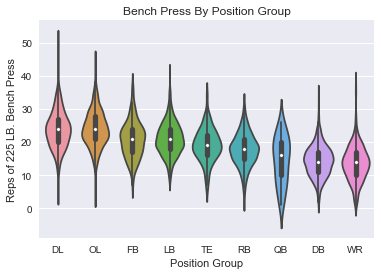

In [10]:
#Create a violinplot for bench press (number of reps at 225 lbs), grouped by position
bench_press_df_pos = df_joined[['Pos', 'Bench_Press']].dropna()

sns.set()
_ = sns.violinplot('Pos', 'Bench_Press', data = bench_press_df_pos, order = ['DL', 'OL', 'FB', 'LB', 'TE', 'RB', 'QB', 'DB', 'WR'])
_ = plt.xlabel('Position Group')
_ = plt.ylabel('Reps of 225 LB. Bench Press')
_ = plt.title('Bench Press By Position Group')
_ = plt.show()


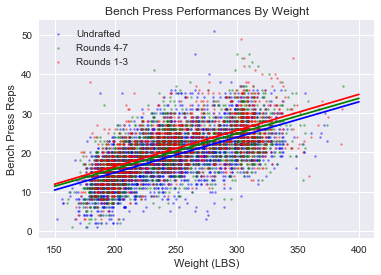

Regression for Undrafted: y=0.0899360549844x + -3.10493388251, R-Squared = 0.368435401251
Regression for Rounds 4-7: y=0.0895764305704x + -2.07433536099, R-Squared = 0.392296803165
Regression for Rounds 1-3: y=0.0915735835247x + -1.85734939372, R-Squared = 0.427482067251


In [11]:
#Create a scatterplot of bench press reps against weight, split by Round dimension (Undrafted, Rounds 4-7, Rounds 1-3)

bench_press_df_weight_13 = df_joined[['Weight', 'Bench_Press', 'Rnd']].dropna()
bench_press_df_weight_13 = bench_press_df_weight_13[bench_press_df_weight_13['Rnd'] == '1-3']

bench_press_df_weight_47 = df_joined[['Weight', 'Bench_Press', 'Rnd']].dropna()
bench_press_df_weight_47 = bench_press_df_weight_47[bench_press_df_weight_47['Rnd'] == '4-7']

bench_press_df_weight_Undrafted = df_joined[['Weight', 'Bench_Press', 'Rnd']].dropna()
bench_press_df_weight_Undrafted = bench_press_df_weight_Undrafted[bench_press_df_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,400])
m_Undrafted, b_Undrafted = np.polyfit(bench_press_df_weight_Undrafted['Weight'], bench_press_df_weight_Undrafted['Bench_Press'], deg=1)
m_47, b_47 = np.polyfit(bench_press_df_weight_47['Weight'], bench_press_df_weight_47['Bench_Press'], deg=1)
m_13, b_13 = np.polyfit(bench_press_df_weight_13['Weight'], bench_press_df_weight_13['Bench_Press'], deg=1)


#calculate R squared of each group
def rsquared(x, y):

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

bench_press_rsquared_Undrafted = rsquared(bench_press_df_weight_Undrafted['Weight'], bench_press_df_weight_Undrafted['Bench_Press'])
bench_press_rsquared_47 = rsquared(bench_press_df_weight_47['Weight'], bench_press_df_weight_47['Bench_Press'])
bench_press_rsquared_13 = rsquared(bench_press_df_weight_13['Weight'], bench_press_df_weight_13['Bench_Press'])


#plotting regression lines
_ = plt.plot(x, m_Undrafted*x + b_Undrafted, color = 'blue')
_ = plt.plot(x, m_47*x + b_47, color = 'green')
_ = plt.plot(x, m_13*x + b_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Bench_Press', data = bench_press_df_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Bench_Press', data = bench_press_df_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Bench_Press', data = bench_press_df_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Bench Press Reps')
_ = plt.title('Bench Press Performances By Weight')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_Undrafted) + 'x + ' + str(b_Undrafted) + ', R-Squared = ' + str(bench_press_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_47) + 'x + ' + str(b_47) + ', R-Squared = ' + str(bench_press_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_13) + 'x + ' + str(b_13) + ', R-Squared = ' + str(bench_press_rsquared_13))

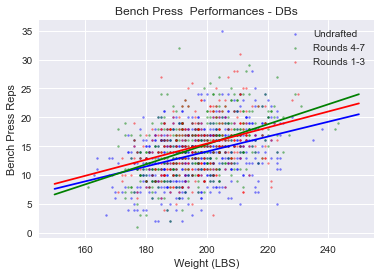

Regression for Undrafted: y=0.129339197986x + -11.8096402201, R-Squared = 0.136524076464
Regression for Rounds 4-7: y=0.173743382803x + -19.442187587, R-Squared = 0.22132812764
Regression for Rounds 1-3: y=0.139464290253x + -12.4652228626, R-Squared = 0.120059211393
Mean Value for Undrafted: 13.6026165305
Mean Value for Rounds 4-7: 14.6944973565
Mean Value for Rounds 1-3: 14.9363878373
Mean Weight: 196.47761194029852 LBS


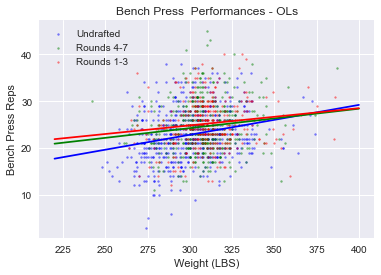

Regression for Undrafted: y=0.0638191749034x + 3.68601403915, R-Squared = 0.0576505482914
Regression for Rounds 4-7: y=0.0415209476902x + 11.7935499853, R-Squared = 0.0175079582774
Regression for Rounds 1-3: y=0.036767238056x + 13.8056945931, R-Squared = 0.018076238169
Mean Value for Undrafted: 23.2103108906
Mean Value for Rounds 4-7: 24.4961164081
Mean Value for Rounds 1-3: 25.0539514265
Mean Weight: 305.93151479976785 LBS


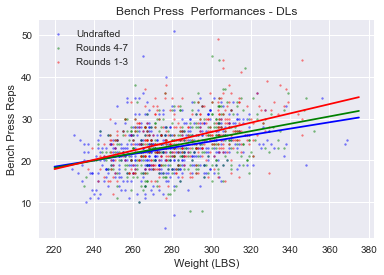

Regression for Undrafted: y=0.0756465650812x + 1.87928601251, R-Squared = 0.102194235135
Regression for Rounds 4-7: y=0.0877089064366x + -1.06735788902, R-Squared = 0.117487336389
Regression for Rounds 1-3: y=0.110763416244x + -6.42654100787, R-Squared = 0.188310924631
Mean Value for Undrafted: 23.2078200477
Mean Value for Rounds 4-7: 23.6621509012
Mean Value for Rounds 1-3: 24.8031822544
Mean Weight: 281.94980184940556 LBS


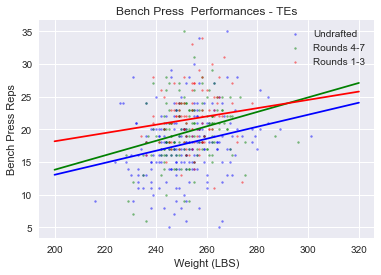

Regression for Undrafted: y=0.0918593107361x + -5.32750455473, R-Squared = 0.0548511704598
Regression for Rounds 4-7: y=0.110624223886x + -8.31289286905, R-Squared = 0.0661989288332
Regression for Rounds 1-3: y=0.0633476379029x + 5.49535690259, R-Squared = 0.0152346381746
Mean Value for Undrafted: 17.8071671674
Mean Value for Rounds 4-7: 19.5477026831
Mean Value for Rounds 1-3: 21.4493935213
Mean Weight: 251.84895833333334 LBS


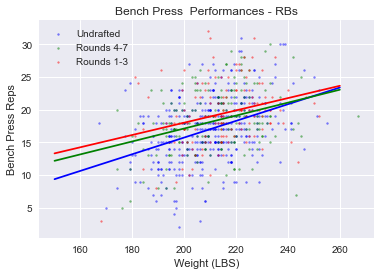

Regression for Undrafted: y=0.127270013692x + -9.71975751109, R-Squared = 0.149031659872
Regression for Rounds 4-7: y=0.0987690678667x + -2.63902915191, R-Squared = 0.10553958723
Regression for Rounds 1-3: y=0.0938769477283x + -0.770541113294, R-Squared = 0.0816744352319
Mean Value for Undrafted: 17.118998311
Mean Value for Rounds 4-7: 18.1894348229
Mean Value for Rounds 1-3: 19.0262704397
Mean Weight: 210.8804347826087 LBS


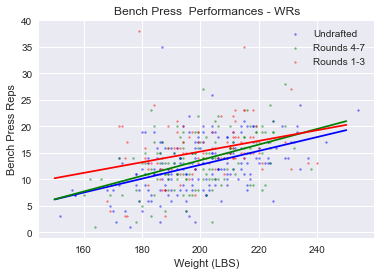

Regression for Undrafted: y=0.130920321942x + -13.4431317136, R-Squared = 0.206878635909
Regression for Rounds 4-7: y=0.147614246971x + -15.9173396017, R-Squared = 0.207599390921
Regression for Rounds 1-3: y=0.100737068325x + -4.90553268957, R-Squared = 0.083320551303
Mean Value for Undrafted: 12.1588773752
Mean Value for Rounds 4-7: 12.9492354001
Mean Value for Rounds 1-3: 14.7940166284
Mean Weight: 195.55412566237698 LBS


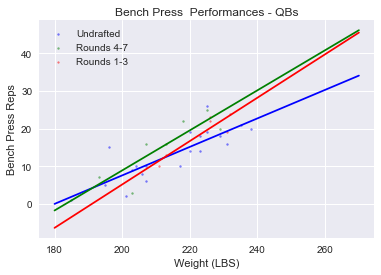

Regression for Undrafted: y=0.378698948398x + -68.1809244314, R-Squared = 0.677975977333
Regression for Rounds 4-7: y=0.532152426317x + -97.5489729086, R-Squared = 0.71199286081
Regression for Rounds 1-3: y=0.576403113478x + -110.133961491, R-Squared = 0.816716194022
Mean Value for Undrafted: 14.4446568169
Mean Value for Rounds 4-7: 18.557511472
Mean Value for Rounds 1-3: 15.627259885
Mean Weight: 218.18275862068967 LBS


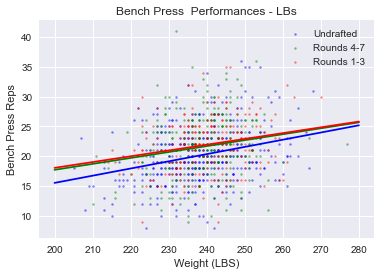

Regression for Undrafted: y=0.120832281685x + -8.66644642487, R-Squared = 0.0786691814848
Regression for Rounds 4-7: y=0.0996430409502x + -2.23559685918, R-Squared = 0.0306134052986
Regression for Rounds 1-3: y=0.0971729430749x + -1.40857692083, R-Squared = 0.0445568829401
Mean Value for Undrafted: 20.1438256634
Mean Value for Rounds 4-7: 21.5224840233
Mean Value for Rounds 1-3: 21.7605537996
Mean Weight: 238.43191311612364 LBS


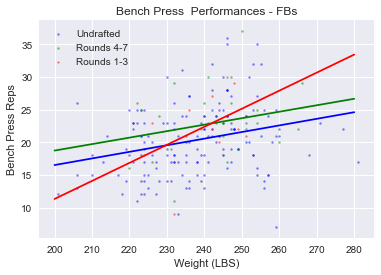

Regression for Undrafted: y=0.101082912411x + -3.71150771204, R-Squared = 0.0723916503372
Regression for Rounds 4-7: y=0.0990759293041x + -1.09460510183, R-Squared = 0.0548618675889
Regression for Rounds 1-3: y=0.276223776224x + -43.9300699301, R-Squared = 0.194520633337
Mean Value for Undrafted: 20.387392273
Mean Value for Rounds 4-7: 22.5258155438
Mean Value for Rounds 1-3: 21.9236831717
Mean Weight: 238.40725806451613 LBS


In [12]:
#Scatterplot for DB Group - Bench_Press
Bench_Press_db_weight_13 = df_DB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_db_weight_13 = Bench_Press_db_weight_13[Bench_Press_db_weight_13['Rnd'] == '1-3']

Bench_Press_db_weight_47 = df_DB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_db_weight_47 = Bench_Press_db_weight_47[Bench_Press_db_weight_47['Rnd'] == '4-7']

Bench_Press_db_weight_Undrafted = df_DB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_db_weight_Undrafted = Bench_Press_db_weight_Undrafted[Bench_Press_db_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,250])
m_db_Undrafted, b_db_Undrafted = np.polyfit(Bench_Press_db_weight_Undrafted['Weight'], Bench_Press_db_weight_Undrafted['Bench_Press'], deg=1)
m_db_47, b_db_47 = np.polyfit(Bench_Press_db_weight_47['Weight'], Bench_Press_db_weight_47['Bench_Press'], deg=1)
m_db_13, b_db_13 = np.polyfit(Bench_Press_db_weight_13['Weight'], Bench_Press_db_weight_13['Bench_Press'], deg=1)

Bench_Press_db_rsquared_Undrafted = rsquared(Bench_Press_db_weight_Undrafted['Weight'], Bench_Press_db_weight_Undrafted['Bench_Press'])
Bench_Press_db_rsquared_47 = rsquared(Bench_Press_db_weight_47['Weight'], Bench_Press_db_weight_47['Bench_Press'])
Bench_Press_db_rsquared_13 = rsquared(Bench_Press_db_weight_13['Weight'], Bench_Press_db_weight_13['Bench_Press'])


#plotting regression lines
_ = plt.plot(x, m_db_Undrafted*x + b_db_Undrafted, color = 'blue')
_ = plt.plot(x, m_db_47*x + b_db_47, color = 'green')
_ = plt.plot(x, m_db_13*x + b_db_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_db_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_db_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_db_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Bench Press Reps')
_ = plt.title('Bench Press  Performances - DBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_db_Undrafted) + 'x + ' + str(b_db_Undrafted) + ', R-Squared = ' + str(Bench_Press_db_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_db_47) + 'x + ' + str(b_db_47) + ', R-Squared = ' + str(Bench_Press_db_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_db_13) + 'x + ' + str(b_db_13) + ', R-Squared = ' + str(Bench_Press_db_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_db_Undrafted*mean_weight_DB+b_db_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_db_47*mean_weight_DB+b_db_47))
print('Mean Value for Rounds 1-3: ' + str(m_db_13*mean_weight_DB+b_db_13))
print('Mean Weight: ' + str(mean_weight_DB) + ' LBS')

#Scatterplot for OL Group
Bench_Press_OL_weight_13 = df_OL[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_OL_weight_13 = Bench_Press_OL_weight_13[Bench_Press_OL_weight_13['Rnd'] == '1-3']

Bench_Press_OL_weight_47 = df_OL[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_OL_weight_47 = Bench_Press_OL_weight_47[Bench_Press_OL_weight_47['Rnd'] == '4-7']

Bench_Press_OL_weight_Undrafted = df_OL[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_OL_weight_Undrafted = Bench_Press_OL_weight_Undrafted[Bench_Press_OL_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([220,400])
m_OL_Undrafted, b_OL_Undrafted = np.polyfit(Bench_Press_OL_weight_Undrafted['Weight'], Bench_Press_OL_weight_Undrafted['Bench_Press'], deg=1)
m_OL_47, b_OL_47 = np.polyfit(Bench_Press_OL_weight_47['Weight'], Bench_Press_OL_weight_47['Bench_Press'], deg=1)
m_OL_13, b_OL_13 = np.polyfit(Bench_Press_OL_weight_13['Weight'], Bench_Press_OL_weight_13['Bench_Press'], deg=1)

Bench_Press_OL_rsquared_Undrafted = rsquared(Bench_Press_OL_weight_Undrafted['Weight'], Bench_Press_OL_weight_Undrafted['Bench_Press'])
Bench_Press_OL_rsquared_47 = rsquared(Bench_Press_OL_weight_47['Weight'], Bench_Press_OL_weight_47['Bench_Press'])
Bench_Press_OL_rsquared_13 = rsquared(Bench_Press_OL_weight_13['Weight'], Bench_Press_OL_weight_13['Bench_Press'])


#plotting regression lines
_ = plt.plot(x, m_OL_Undrafted*x + b_OL_Undrafted, color = 'blue')
_ = plt.plot(x, m_OL_47*x + b_OL_47, color = 'green')
_ = plt.plot(x, m_OL_13*x + b_OL_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_OL_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_OL_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_OL_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Bench Press Reps')
_ = plt.title('Bench Press  Performances - OLs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_OL_Undrafted) + 'x + ' + str(b_OL_Undrafted) + ', R-Squared = ' + str(Bench_Press_OL_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_OL_47) + 'x + ' + str(b_OL_47) + ', R-Squared = ' + str(Bench_Press_OL_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_OL_13) + 'x + ' + str(b_OL_13) + ', R-Squared = ' + str(Bench_Press_OL_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_OL_Undrafted*mean_weight_OL+b_OL_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_OL_47*mean_weight_OL+b_OL_47))
print('Mean Value for Rounds 1-3: ' + str(m_OL_13*mean_weight_OL+b_OL_13))
print('Mean Weight: ' + str(mean_weight_OL) + ' LBS')

#scatterplot for Bench_Press for DL Group
Bench_Press_DL_weight_13 = df_DL[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_DL_weight_13 = Bench_Press_DL_weight_13[Bench_Press_DL_weight_13['Rnd'] == '1-3']

Bench_Press_DL_weight_47 = df_DL[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_DL_weight_47 = Bench_Press_DL_weight_47[Bench_Press_DL_weight_47['Rnd'] == '4-7']

Bench_Press_DL_weight_Undrafted = df_DL[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_DL_weight_Undrafted = Bench_Press_DL_weight_Undrafted[Bench_Press_DL_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([220,375])
m_DL_Undrafted, b_DL_Undrafted = np.polyfit(Bench_Press_DL_weight_Undrafted['Weight'], Bench_Press_DL_weight_Undrafted['Bench_Press'], deg=1)
m_DL_47, b_DL_47 = np.polyfit(Bench_Press_DL_weight_47['Weight'], Bench_Press_DL_weight_47['Bench_Press'], deg=1)
m_DL_13, b_DL_13 = np.polyfit(Bench_Press_DL_weight_13['Weight'], Bench_Press_DL_weight_13['Bench_Press'], deg=1)

Bench_Press_DL_rsquared_Undrafted = rsquared(Bench_Press_DL_weight_Undrafted['Weight'], Bench_Press_DL_weight_Undrafted['Bench_Press'])
Bench_Press_DL_rsquared_47 = rsquared(Bench_Press_DL_weight_47['Weight'], Bench_Press_DL_weight_47['Bench_Press'])
Bench_Press_DL_rsquared_13 = rsquared(Bench_Press_DL_weight_13['Weight'], Bench_Press_DL_weight_13['Bench_Press'])


#plotting regression lines
_ = plt.plot(x, m_DL_Undrafted*x + b_DL_Undrafted, color = 'blue')
_ = plt.plot(x, m_DL_47*x + b_DL_47, color = 'green')
_ = plt.plot(x, m_DL_13*x + b_DL_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_DL_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_DL_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_DL_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Bench Press Reps')
_ = plt.title('Bench Press  Performances - DLs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_DL_Undrafted) + 'x + ' + str(b_DL_Undrafted) + ', R-Squared = ' + str(Bench_Press_DL_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_DL_47) + 'x + ' + str(b_DL_47) + ', R-Squared = ' + str(Bench_Press_DL_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_DL_13) + 'x + ' + str(b_DL_13) + ', R-Squared = ' + str(Bench_Press_DL_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_DL_Undrafted*mean_weight_DL+b_DL_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_DL_47*mean_weight_DL+b_DL_47))
print('Mean Value for Rounds 1-3: ' + str(m_DL_13*mean_weight_DL+b_DL_13))
print('Mean Weight: ' + str(mean_weight_DL) + ' LBS')

#scatterplot for Bench_Press for TE Group
Bench_Press_TE_weight_13 = df_TE[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_TE_weight_13 = Bench_Press_TE_weight_13[Bench_Press_TE_weight_13['Rnd'] == '1-3']

Bench_Press_TE_weight_47 = df_TE[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_TE_weight_47 = Bench_Press_TE_weight_47[Bench_Press_TE_weight_47['Rnd'] == '4-7']

Bench_Press_TE_weight_Undrafted = df_TE[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_TE_weight_Undrafted = Bench_Press_TE_weight_Undrafted[Bench_Press_TE_weight_Undrafted['Rnd'] == 'Undrafted']
Bench_Press_TE_weight_Undrafted = Bench_Press_TE_weight_Undrafted[Bench_Press_TE_weight_Undrafted['Weight'] > 180]
Bench_Press_TE_weight_Undrafted = Bench_Press_TE_weight_Undrafted[Bench_Press_TE_weight_Undrafted['Weight'] < 320]


#calculate regression lines for all 3 groups
x = np.array([200,320])
m_TE_Undrafted, b_TE_Undrafted = np. polyfit (Bench_Press_TE_weight_Undrafted['Weight'], Bench_Press_TE_weight_Undrafted['Bench_Press'], deg=1)
m_TE_47, b_TE_47 = np.polyfit(Bench_Press_TE_weight_47['Weight'], Bench_Press_TE_weight_47['Bench_Press'], deg=1)
m_TE_13, b_TE_13 = np. polyfit (Bench_Press_TE_weight_13['Weight'], Bench_Press_TE_weight_13['Bench_Press'], deg=1)

Bench_Press_TE_rsquared_Undrafted = rsquared(Bench_Press_TE_weight_Undrafted['Weight'], Bench_Press_TE_weight_Undrafted['Bench_Press'])
Bench_Press_TE_rsquared_47 = rsquared(Bench_Press_TE_weight_47['Weight'], Bench_Press_TE_weight_47['Bench_Press'])
Bench_Press_TE_rsquared_13 = rsquared(Bench_Press_TE_weight_13['Weight'], Bench_Press_TE_weight_13['Bench_Press'])


#plotting regression lines
_ = plt.plot(x, m_TE_Undrafted*x + b_TE_Undrafted, color = 'blue')
_ = plt.plot(x, m_TE_47*x + b_TE_47, color = 'green')
_ = plt.plot(x, m_TE_13*x + b_TE_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_TE_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_TE_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_TE_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Bench Press Reps')
_ = plt.title('Bench Press  Performances - TEs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_TE_Undrafted) + 'x + ' + str(b_TE_Undrafted) + ', R-Squared = ' + str(Bench_Press_TE_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_TE_47) + 'x + ' + str(b_TE_47) + ', R-Squared = ' + str(Bench_Press_TE_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_TE_13) + 'x + ' + str(b_TE_13) + ', R-Squared = ' + str(Bench_Press_TE_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_TE_Undrafted*mean_weight_TE+b_TE_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_TE_47*mean_weight_TE+b_TE_47))
print('Mean Value for Rounds 1-3: ' + str(m_TE_13*mean_weight_TE+b_TE_13))
print('Mean Weight: ' + str(mean_weight_TE) + ' LBS')

#scatterplot for Bench_Press for RB Group
Bench_Press_RB_weight_13 = df_RB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_RB_weight_13 = Bench_Press_RB_weight_13[Bench_Press_RB_weight_13['Rnd'] == '1-3']

Bench_Press_RB_weight_47 = df_RB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_RB_weight_47 = Bench_Press_RB_weight_47[Bench_Press_RB_weight_47['Rnd'] == '4-7']

Bench_Press_RB_weight_Undrafted = df_RB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_RB_weight_Undrafted = Bench_Press_RB_weight_Undrafted[Bench_Press_RB_weight_Undrafted ['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,260])
m_RB_Undrafted, b_RB_Undrafted = np. polyfit (Bench_Press_RB_weight_Undrafted ['Weight'], Bench_Press_RB_weight_Undrafted ['Bench_Press'], deg=1)
m_RB_47, b_RB_47 = np.polyfit(Bench_Press_RB_weight_47['Weight'], Bench_Press_RB_weight_47['Bench_Press'], deg=1)
m_RB_13, b_RB_13 = np. polyfit (Bench_Press_RB_weight_13['Weight'], Bench_Press_RB_weight_13['Bench_Press'], deg=1)

Bench_Press_RB_rsquared_Undrafted = rsquared(Bench_Press_RB_weight_Undrafted['Weight'], Bench_Press_RB_weight_Undrafted['Bench_Press'])
Bench_Press_RB_rsquared_47 = rsquared(Bench_Press_RB_weight_47['Weight'], Bench_Press_RB_weight_47['Bench_Press'])
Bench_Press_RB_rsquared_13 = rsquared(Bench_Press_RB_weight_13['Weight'], Bench_Press_RB_weight_13['Bench_Press'])


#plotting regression lines
_ = plt.plot(x, m_RB_Undrafted*x + b_RB_Undrafted, color = 'blue')
_ = plt.plot(x, m_RB_47*x + b_RB_47, color = 'green')
_ = plt.plot(x, m_RB_13*x + b_RB_13, color = 'red')


#scatRBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_RB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_RB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_RB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Bench Press Reps')
_ = plt.title('Bench Press  Performances - RBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_RB_Undrafted) + 'x + ' + str(b_RB_Undrafted) + ', R-Squared = ' + str(Bench_Press_RB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_RB_47) + 'x + ' + str(b_RB_47) + ', R-Squared = ' + str(Bench_Press_RB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_RB_13) + 'x + ' + str(b_RB_13) + ', R-Squared = ' + str(Bench_Press_RB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_RB_Undrafted*mean_weight_RB+b_RB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_RB_47*mean_weight_RB+b_RB_47))
print('Mean Value for Rounds 1-3: ' + str(m_RB_13*mean_weight_RB+b_RB_13))
print('Mean Weight: ' + str(mean_weight_RB) + ' LBS')

#scatterplot for Bench_Press for WR Group
Bench_Press_WR_weight_13 = df_WR[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_WR_weight_13 = Bench_Press_WR_weight_13[Bench_Press_WR_weight_13['Rnd'] == '1-3']

Bench_Press_WR_weight_47 = df_WR[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_WR_weight_47 = Bench_Press_WR_weight_47[Bench_Press_WR_weight_47['Rnd'] == '4-7']

Bench_Press_WR_weight_Undrafted = df_WR[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_WR_weight_Undrafted = Bench_Press_WR_weight_Undrafted[Bench_Press_WR_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,250])
m_WR_Undrafted, b_WR_Undrafted = np. polyfit (Bench_Press_WR_weight_Undrafted ['Weight'], Bench_Press_WR_weight_Undrafted ['Bench_Press'], deg=1)
m_WR_47, b_WR_47 = np.polyfit(Bench_Press_WR_weight_47['Weight'], Bench_Press_WR_weight_47['Bench_Press'], deg=1)
m_WR_13, b_WR_13 = np. polyfit (Bench_Press_WR_weight_13['Weight'], Bench_Press_WR_weight_13['Bench_Press'], deg=1)

Bench_Press_WR_rsquared_Undrafted = rsquared(Bench_Press_WR_weight_Undrafted['Weight'], Bench_Press_WR_weight_Undrafted['Bench_Press'])
Bench_Press_WR_rsquared_47 = rsquared(Bench_Press_WR_weight_47['Weight'], Bench_Press_WR_weight_47['Bench_Press'])
Bench_Press_WR_rsquared_13 = rsquared(Bench_Press_WR_weight_13['Weight'], Bench_Press_WR_weight_13['Bench_Press'])


#plotting regression lines
_ = plt.plot(x, m_WR_Undrafted*x + b_WR_Undrafted, color = 'blue')
_ = plt.plot(x, m_WR_47*x + b_WR_47, color = 'green')
_ = plt.plot(x, m_WR_13*x + b_WR_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_WR_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_WR_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_WR_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Bench Press Reps')
_ = plt.title('Bench Press  Performances - WRs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_WR_Undrafted) + 'x + ' + str(b_WR_Undrafted) + ', R-Squared = ' + str(Bench_Press_WR_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_WR_47) + 'x + ' + str(b_WR_47) + ', R-Squared = ' + str(Bench_Press_WR_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_WR_13) + 'x + ' + str(b_WR_13) + ', R-Squared = ' + str(Bench_Press_WR_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_WR_Undrafted*mean_weight_WR+b_WR_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_WR_47*mean_weight_WR+b_WR_47))
print('Mean Value for Rounds 1-3: ' + str(m_WR_13*mean_weight_WR+b_WR_13))
print('Mean Weight: ' + str(mean_weight_WR) + ' LBS')

#scatterplot for Bench_Press for QB Group
Bench_Press_QB_weight_13 = df_QB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_QB_weight_13 = Bench_Press_QB_weight_13[Bench_Press_QB_weight_13['Rnd'] == '1-3']

Bench_Press_QB_weight_47 = df_QB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_QB_weight_47 = Bench_Press_QB_weight_47[Bench_Press_QB_weight_47['Rnd'] == '4-7']

Bench_Press_QB_weight_Undrafted = df_QB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_QB_weight_Undrafted = Bench_Press_QB_weight_Undrafted[Bench_Press_QB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([180,270])
m_QB_Undrafted, b_QB_Undrafted = np. polyfit (Bench_Press_QB_weight_Undrafted ['Weight'], Bench_Press_QB_weight_Undrafted ['Bench_Press'], deg=1)
m_QB_47, b_QB_47 = np.polyfit(Bench_Press_QB_weight_47['Weight'], Bench_Press_QB_weight_47['Bench_Press'], deg=1)
m_QB_13, b_QB_13 = np. polyfit (Bench_Press_QB_weight_13['Weight'], Bench_Press_QB_weight_13['Bench_Press'], deg=1)

Bench_Press_QB_rsquared_Undrafted = rsquared(Bench_Press_QB_weight_Undrafted['Weight'], Bench_Press_QB_weight_Undrafted['Bench_Press'])
Bench_Press_QB_rsquared_47 = rsquared(Bench_Press_QB_weight_47['Weight'], Bench_Press_QB_weight_47['Bench_Press'])
Bench_Press_QB_rsquared_13 = rsquared(Bench_Press_QB_weight_13['Weight'], Bench_Press_QB_weight_13['Bench_Press'])


#plotting regression lines
_ = plt.plot(x, m_QB_Undrafted*x + b_QB_Undrafted, color = 'blue')
_ = plt.plot(x, m_QB_47*x + b_QB_47, color = 'green')
_ = plt.plot(x, m_QB_13*x + b_QB_13, color = 'red')


#scatQBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_QB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_QB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_QB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Bench Press Reps')
_ = plt.title('Bench Press  Performances - QBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_QB_Undrafted) + 'x + ' + str(b_QB_Undrafted) + ', R-Squared = ' + str(Bench_Press_QB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_QB_47) + 'x + ' + str(b_QB_47) + ', R-Squared = ' + str(Bench_Press_QB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_QB_13) + 'x + ' + str(b_QB_13) + ', R-Squared = ' + str(Bench_Press_QB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_QB_Undrafted*mean_weight_QB+b_QB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_QB_47*mean_weight_QB+b_QB_47))
print('Mean Value for Rounds 1-3: ' + str(m_QB_13*mean_weight_QB+b_QB_13))
print('Mean Weight: ' + str(mean_weight_QB) + ' LBS')

#scatterplot for Bench_Press for LB Group
Bench_Press_LB_weight_13 = df_LB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_LB_weight_13 = Bench_Press_LB_weight_13[Bench_Press_LB_weight_13['Rnd'] == '1-3']

Bench_Press_LB_weight_47 = df_LB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_LB_weight_47 = Bench_Press_LB_weight_47[Bench_Press_LB_weight_47['Rnd'] == '4-7']

Bench_Press_LB_weight_Undrafted = df_LB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_LB_weight_Undrafted = Bench_Press_LB_weight_Undrafted[Bench_Press_LB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([200,280])
m_LB_Undrafted, b_LB_Undrafted = np. polyfit (Bench_Press_LB_weight_Undrafted ['Weight'], Bench_Press_LB_weight_Undrafted ['Bench_Press'], deg=1)
m_LB_47, b_LB_47 = np.polyfit(Bench_Press_LB_weight_47['Weight'], Bench_Press_LB_weight_47['Bench_Press'], deg=1)
m_LB_13, b_LB_13 = np. polyfit (Bench_Press_LB_weight_13['Weight'], Bench_Press_LB_weight_13['Bench_Press'], deg=1)

Bench_Press_LB_rsquared_Undrafted = rsquared(Bench_Press_LB_weight_Undrafted['Weight'], Bench_Press_LB_weight_Undrafted['Bench_Press'])
Bench_Press_LB_rsquared_47 = rsquared(Bench_Press_LB_weight_47['Weight'], Bench_Press_LB_weight_47['Bench_Press'])
Bench_Press_LB_rsquared_13 = rsquared(Bench_Press_LB_weight_13['Weight'], Bench_Press_LB_weight_13['Bench_Press'])


#plotting regression lines
_ = plt.plot(x, m_LB_Undrafted*x + b_LB_Undrafted, color = 'blue')
_ = plt.plot(x, m_LB_47*x + b_LB_47, color = 'green')
_ = plt.plot(x, m_LB_13*x + b_LB_13, color = 'red')


#scatLBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_LB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_LB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_LB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Bench Press Reps')
_ = plt.title('Bench Press  Performances - LBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_LB_Undrafted) + 'x + ' + str(b_LB_Undrafted) + ', R-Squared = ' + str(Bench_Press_LB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_LB_47) + 'x + ' + str(b_LB_47) + ', R-Squared = ' + str(Bench_Press_LB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_LB_13) + 'x + ' + str(b_LB_13) + ', R-Squared = ' + str(Bench_Press_LB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_LB_Undrafted*mean_weight_LB+b_LB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_LB_47*mean_weight_LB+b_LB_47))
print('Mean Value for Rounds 1-3: ' + str(m_LB_13*mean_weight_LB+b_LB_13))
print('Mean Weight: ' + str(mean_weight_LB) + ' LBS')

#scatterplot for Bench_Press for FB Group
Bench_Press_FB_weight_13 = df_FB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_FB_weight_13 = Bench_Press_FB_weight_13[Bench_Press_FB_weight_13['Rnd'] == '1-3']

Bench_Press_FB_weight_47 = df_FB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_FB_weight_47 = Bench_Press_FB_weight_47[Bench_Press_FB_weight_47['Rnd'] == '4-7']

Bench_Press_FB_weight_Undrafted = df_FB[['Weight', 'Bench_Press', 'Rnd']].dropna()
Bench_Press_FB_weight_Undrafted = Bench_Press_FB_weight_Undrafted[Bench_Press_FB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([200,280])
m_FB_Undrafted, b_FB_Undrafted = np. polyfit (Bench_Press_FB_weight_Undrafted ['Weight'], Bench_Press_FB_weight_Undrafted ['Bench_Press'], deg=1)
m_FB_47, b_FB_47 = np.polyfit(Bench_Press_FB_weight_47['Weight'], Bench_Press_FB_weight_47['Bench_Press'], deg=1)
m_FB_13, b_FB_13 = np. polyfit (Bench_Press_FB_weight_13['Weight'], Bench_Press_FB_weight_13['Bench_Press'], deg=1)

Bench_Press_FB_rsquared_Undrafted = rsquared(Bench_Press_FB_weight_Undrafted['Weight'], Bench_Press_FB_weight_Undrafted['Bench_Press'])
Bench_Press_FB_rsquared_47 = rsquared(Bench_Press_FB_weight_47['Weight'], Bench_Press_FB_weight_47['Bench_Press'])
Bench_Press_FB_rsquared_13 = rsquared(Bench_Press_FB_weight_13['Weight'], Bench_Press_FB_weight_13['Bench_Press'])


#plotting regression lines
_ = plt.plot(x, m_FB_Undrafted*x + b_FB_Undrafted, color = 'blue')
_ = plt.plot(x, m_FB_47*x + b_FB_47, color = 'green')
_ = plt.plot(x, m_FB_13*x + b_FB_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_FB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_FB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Bench_Press', data = Bench_Press_FB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Bench Press Reps')
_ = plt.title('Bench Press  Performances - FBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_FB_Undrafted) + 'x + ' + str(b_FB_Undrafted) + ', R-Squared = ' + str(Bench_Press_FB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_FB_47) + 'x + ' + str(b_FB_47) + ', R-Squared = ' + str(Bench_Press_FB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_FB_13) + 'x + ' + str(b_FB_13) + ', R-Squared = ' + str(Bench_Press_FB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_FB_Undrafted*mean_weight_FB+b_FB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_FB_47*mean_weight_FB+b_FB_47))
print('Mean Value for Rounds 1-3: ' + str(m_FB_13*mean_weight_FB+b_FB_13))
print('Mean Weight: ' + str(mean_weight_FB) + ' LBS')

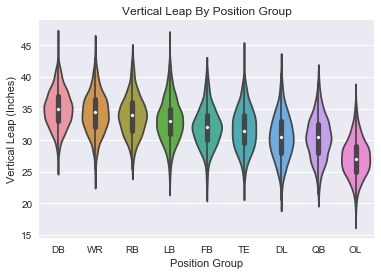

In [13]:
#Create a violinplot for vertical leap, grouped by position
VL_df_pos = df_joined[['Pos', 'Vert_Leap']].dropna()

sns.set()
_ = sns.violinplot('Pos', 'Vert_Leap', data = VL_df_pos, order = ['DB', 'WR', 'RB', 'LB', 'FB', 'TE', 'DL', 'QB', 'OL'])
_ = plt.xlabel('Position Group')
_ = plt.ylabel('Vertical Leap (Inches)')
_ = plt.title('Vertical Leap By Position Group')
_ = plt.show()

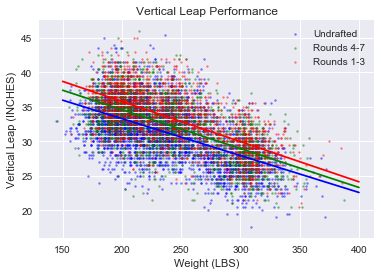

Regression for Undrafted: y=-0.0536168537776x + 44.012608899, R-Squared = 0.322149683799
Regression for Rounds 4-7: y=-0.0564814405621x + 45.8849808328, R-Squared = 0.387494438936
Regression for Rounds 1-3: y=-0.0583316306363x + 47.4489584839, R-Squared = 0.413745200669


In [14]:
#Create a scatterplot of vertical leap against weight, split by Round dimension (Undrafted, Rounds 4-7, Rounds 1-3)

VL_13 = df_joined[['Weight', 'Vert_Leap', 'Rnd']].dropna()
VL_13 = VL_13[VL_13['Rnd'] == '1-3']

VL_47 = df_joined[['Weight', 'Vert_Leap', 'Rnd']].dropna()
VL_47 = VL_47[VL_47['Rnd'] == '4-7']

VL_Undrafted = df_joined[['Weight', 'Vert_Leap', 'Rnd']].dropna()
VL_Undrafted = VL_Undrafted[VL_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,400])
m_VL_Undrafted, b_VL_Undrafted = np.polyfit(VL_Undrafted['Weight'], VL_Undrafted['Vert_Leap'], deg=1)
m_VL_47, b_VL_47 = np.polyfit(VL_47['Weight'], VL_47['Vert_Leap'], deg=1)
m_VL_13, b_VL_13 = np.polyfit(VL_13['Weight'], VL_13['Vert_Leap'], deg=1)


#calculate R squared of each group
VL_rsquared_Undrafted = rsquared(VL_Undrafted['Weight'], VL_Undrafted['Vert_Leap'])
VL_rsquared_47 = rsquared(VL_47['Weight'], VL_47['Vert_Leap'])
VL_rsquared_13 = rsquared(VL_13['Weight'], VL_13['Vert_Leap'])


#plotting regression lines
_ = plt.plot(x, m_VL_Undrafted*x + b_VL_Undrafted, color = 'blue')
_ = plt.plot(x, m_VL_47*x + b_VL_47, color = 'green')
_ = plt.plot(x, m_VL_13*x + b_VL_13, color = 'red')

#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Vert_Leap', data = VL_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Vert_Leap', data = VL_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Vert_Leap', data = VL_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Vertical Leap (INCHES)')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])
plt.title('Vertical Leap Performance')
plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_VL_Undrafted) + 'x + ' + str(b_VL_Undrafted)  + ', R-Squared = ' + str(VL_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_VL_47) + 'x + ' + str(b_VL_47) + ', R-Squared = ' + str(VL_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_VL_13) + 'x + ' + str(b_VL_13) + ', R-Squared = ' + str(VL_rsquared_13))

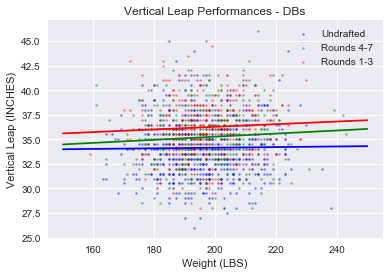

Regression for Undrafted: y=0.00310840605837x + 33.5192898972, R-Squared = 0.00019844577731
Regression for Rounds 4-7: y=0.0157548879109x + 32.1101183431, R-Squared = 0.0050422795161
Regression for Rounds 1-3: y=0.0134239535837x + 33.5812722096, R-Squared = 0.00294892890301
Mean Value for Undrafted: 34.1300220965
Mean Value for Rounds 4-7: 35.2056010963
Mean Value for Rounds 1-3: 36.2187785525
Mean Weight: 196.47761194029852 LBS


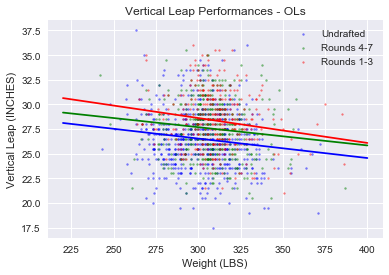

Regression for Undrafted: y=-0.0197627691514x + 32.4628352436, R-Squared = 0.0184931504755
Regression for Rounds 4-7: y=-0.0185255504427x + 33.2463405414, R-Squared = 0.0122426876905
Regression for Rounds 1-3: y=-0.025278363642x + 36.2006982069, R-Squared = 0.0252049675267
Mean Value for Undrafted: 26.4167813405
Mean Value for Rounds 4-7: 27.578790832
Mean Value for Rounds 1-3: 28.4672501262
Mean Weight: 305.93151479976785 LBS


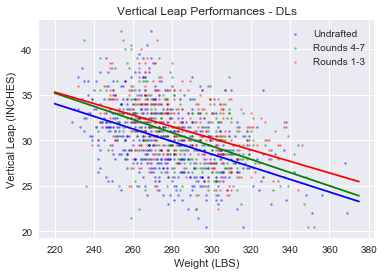

Regression for Undrafted: y=-0.0692870520241x + 49.2748421198, R-Squared = 0.202170804999
Regression for Rounds 4-7: y=-0.072789599525x + 51.2142183185, R-Squared = 0.214685159476
Regression for Rounds 1-3: y=-0.0634714187017x + 49.2778416757, R-Squared = 0.18956972092
Mean Value for Undrafted: 29.7393715309
Mean Value for Rounds 4-7: 30.6912051557
Mean Value for Rounds 1-3: 31.3820877497
Mean Weight: 281.94980184940556 LBS


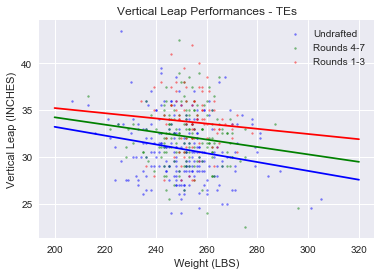

Regression for Undrafted: y=-0.0471429103823x + 42.636432126, R-Squared = 0.0416999716617
Regression for Rounds 4-7: y=-0.0396930577299x + 42.1661071438, R-Squared = 0.0224394592473
Regression for Rounds 1-3: y=-0.0277537148196x + 40.7659157322, R-Squared = 0.00558380236101
Mean Value for Undrafted: 30.7635392534
Mean Value for Rounds 4-7: 32.1694519014
Mean Value for Rounds 1-3: 33.776171565
Mean Weight: 251.84895833333334 LBS


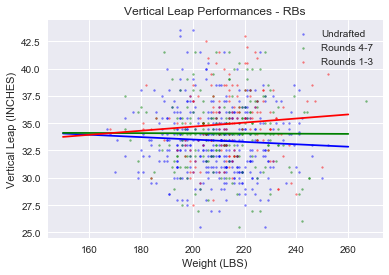

Regression for Undrafted: y=-0.0109874954295x + 35.7017013682, R-Squared = 0.00290327631648
Regression for Rounds 4-7: y=-0.000859253131428x + 34.2411014206, R-Squared = 1.75092520419e-05
Regression for Rounds 1-3: y=0.0186727141918x + 30.944700247, R-Squared = 0.00720592488209
Mean Value for Undrafted: 33.3846535549
Mean Value for Rounds 4-7: 34.0599017467
Mean Value for Rounds 1-3: 34.8824103343
Mean Weight: 210.8804347826087 LBS


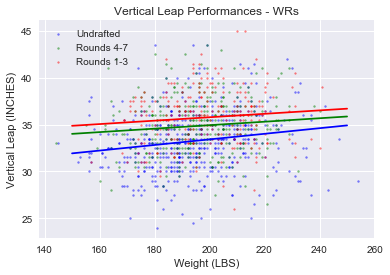

Regression for Undrafted: y=0.0298699563428x + 27.4535030626, R-Squared = 0.0282138672647
Regression for Rounds 4-7: y=0.0185319129348x + 31.2378417008, R-Squared = 0.010110607135
Regression for Rounds 1-3: y=0.0182831414291x + 32.1364437664, R-Squared = 0.00920324996706
Mean Value for Undrafted: 33.2946962588
Mean Value for Rounds 4-7: 34.8618337316
Mean Value for Rounds 1-3: 35.711787503
Mean Weight: 195.55412566237698 LBS


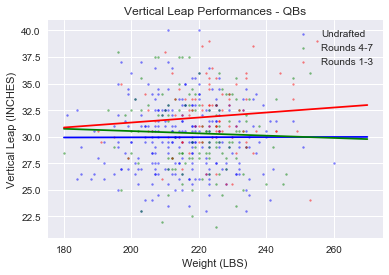

Regression for Undrafted: y=0.000595002283236x + 29.8148944295, R-Squared = 5.93623713181e-06
Regression for Rounds 4-7: y=-0.0107787299729x + 32.6804473581, R-Squared = 0.00136185605049
Regression for Rounds 1-3: y=0.0234863134309x + 26.6314995188, R-Squared = 0.00918461625492
Mean Value for Undrafted: 29.944713669
Mean Value for Rounds 4-7: 30.3287143182
Mean Value for Rounds 1-3: 31.755808173
Mean Weight: 218.18275862068967 LBS


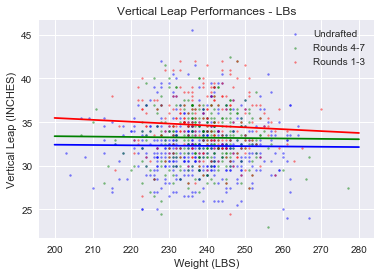

Regression for Undrafted: y=-0.00338387745569x + 33.0893896564, R-Squared = 0.000136993952984
Regression for Rounds 4-7: y=-0.00436273099485x + 34.2590396925, R-Squared = 0.000173680033219
Regression for Rounds 1-3: y=-0.021468824919x + 39.7675297651, R-Squared = 0.00401106071624
Mean Value for Undrafted: 32.2825652809
Mean Value for Rounds 4-7: 33.218825395
Mean Value for Rounds 1-3: 34.6486767673
Mean Weight: 238.43191311612364 LBS


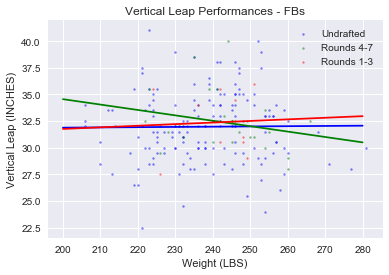

Regression for Undrafted: y=0.00230023008133x + 31.4190123843, R-Squared = 0.000102643225288
Regression for Rounds 4-7: y=-0.0506605820781x + 44.6826972173, R-Squared = 0.0555795950581
Regression for Rounds 1-3: y=0.0149748743719x + 28.7642211055, R-Squared = 0.00241347353316
Mean Value for Undrafted: 31.9674039309
Mean Value for Rounds 4-7: 32.6048467521
Mean Value for Rounds 1-3: 32.3343398444
Mean Weight: 238.40725806451613 LBS


In [15]:
#Scatterplot for DB Group - Vert_Leap
Vert_Leap_db_weight_13 = df_DB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_db_weight_13 = Vert_Leap_db_weight_13[Vert_Leap_db_weight_13['Rnd'] == '1-3']

Vert_Leap_db_weight_47 = df_DB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_db_weight_47 = Vert_Leap_db_weight_47[Vert_Leap_db_weight_47['Rnd'] == '4-7']

Vert_Leap_db_weight_Undrafted = df_DB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_db_weight_Undrafted = Vert_Leap_db_weight_Undrafted[Vert_Leap_db_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,250])
m_db_Undrafted, b_db_Undrafted = np.polyfit(Vert_Leap_db_weight_Undrafted['Weight'], Vert_Leap_db_weight_Undrafted['Vert_Leap'], deg=1)
m_db_47, b_db_47 = np.polyfit(Vert_Leap_db_weight_47['Weight'], Vert_Leap_db_weight_47['Vert_Leap'], deg=1)
m_db_13, b_db_13 = np.polyfit(Vert_Leap_db_weight_13['Weight'], Vert_Leap_db_weight_13['Vert_Leap'], deg=1)

Vert_Leap_db_rsquared_Undrafted = rsquared(Vert_Leap_db_weight_Undrafted['Weight'], Vert_Leap_db_weight_Undrafted['Vert_Leap'])
Vert_Leap_db_rsquared_47 = rsquared(Vert_Leap_db_weight_47['Weight'], Vert_Leap_db_weight_47['Vert_Leap'])
Vert_Leap_db_rsquared_13 = rsquared(Vert_Leap_db_weight_13['Weight'], Vert_Leap_db_weight_13['Vert_Leap'])


#plotting regression lines
_ = plt.plot(x, m_db_Undrafted*x + b_db_Undrafted, color = 'blue')
_ = plt.plot(x, m_db_47*x + b_db_47, color = 'green')
_ = plt.plot(x, m_db_13*x + b_db_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_db_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_db_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_db_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Vertical Leap (INCHES)')
_ = plt.title('Vertical Leap Performances - DBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_db_Undrafted) + 'x + ' + str(b_db_Undrafted) + ', R-Squared = ' + str(Vert_Leap_db_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_db_47) + 'x + ' + str(b_db_47) + ', R-Squared = ' + str(Vert_Leap_db_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_db_13) + 'x + ' + str(b_db_13) + ', R-Squared = ' + str(Vert_Leap_db_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_db_Undrafted*mean_weight_DB+b_db_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_db_47*mean_weight_DB+b_db_47))
print('Mean Value for Rounds 1-3: ' + str(m_db_13*mean_weight_DB+b_db_13))
print('Mean Weight: ' + str(mean_weight_DB) + ' LBS')

#Scatterplot for OL Group
Vert_Leap_OL_weight_13 = df_OL[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_OL_weight_13 = Vert_Leap_OL_weight_13[Vert_Leap_OL_weight_13['Rnd'] == '1-3']

Vert_Leap_OL_weight_47 = df_OL[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_OL_weight_47 = Vert_Leap_OL_weight_47[Vert_Leap_OL_weight_47['Rnd'] == '4-7']

Vert_Leap_OL_weight_Undrafted = df_OL[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_OL_weight_Undrafted = Vert_Leap_OL_weight_Undrafted[Vert_Leap_OL_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([220,400])
m_OL_Undrafted, b_OL_Undrafted = np.polyfit(Vert_Leap_OL_weight_Undrafted['Weight'], Vert_Leap_OL_weight_Undrafted['Vert_Leap'], deg=1)
m_OL_47, b_OL_47 = np.polyfit(Vert_Leap_OL_weight_47['Weight'], Vert_Leap_OL_weight_47['Vert_Leap'], deg=1)
m_OL_13, b_OL_13 = np.polyfit(Vert_Leap_OL_weight_13['Weight'], Vert_Leap_OL_weight_13['Vert_Leap'], deg=1)

Vert_Leap_OL_rsquared_Undrafted = rsquared(Vert_Leap_OL_weight_Undrafted['Weight'], Vert_Leap_OL_weight_Undrafted['Vert_Leap'])
Vert_Leap_OL_rsquared_47 = rsquared(Vert_Leap_OL_weight_47['Weight'], Vert_Leap_OL_weight_47['Vert_Leap'])
Vert_Leap_OL_rsquared_13 = rsquared(Vert_Leap_OL_weight_13['Weight'], Vert_Leap_OL_weight_13['Vert_Leap'])


#plotting regression lines
_ = plt.plot(x, m_OL_Undrafted*x + b_OL_Undrafted, color = 'blue')
_ = plt.plot(x, m_OL_47*x + b_OL_47, color = 'green')
_ = plt.plot(x, m_OL_13*x + b_OL_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_OL_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_OL_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_OL_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Vertical Leap (INCHES)')
_ = plt.title('Vertical Leap Performances - OLs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_OL_Undrafted) + 'x + ' + str(b_OL_Undrafted) + ', R-Squared = ' + str(Vert_Leap_OL_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_OL_47) + 'x + ' + str(b_OL_47) + ', R-Squared = ' + str(Vert_Leap_OL_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_OL_13) + 'x + ' + str(b_OL_13) + ', R-Squared = ' + str(Vert_Leap_OL_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_OL_Undrafted*mean_weight_OL+b_OL_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_OL_47*mean_weight_OL+b_OL_47))
print('Mean Value for Rounds 1-3: ' + str(m_OL_13*mean_weight_OL+b_OL_13))
print('Mean Weight: ' + str(mean_weight_OL) + ' LBS')

#scatterplot for Vert_Leap for DL Group
Vert_Leap_DL_weight_13 = df_DL[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_DL_weight_13 = Vert_Leap_DL_weight_13[Vert_Leap_DL_weight_13['Rnd'] == '1-3']

Vert_Leap_DL_weight_47 = df_DL[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_DL_weight_47 = Vert_Leap_DL_weight_47[Vert_Leap_DL_weight_47['Rnd'] == '4-7']

Vert_Leap_DL_weight_Undrafted = df_DL[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_DL_weight_Undrafted = Vert_Leap_DL_weight_Undrafted[Vert_Leap_DL_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([220,375])
m_DL_Undrafted, b_DL_Undrafted = np.polyfit(Vert_Leap_DL_weight_Undrafted['Weight'], Vert_Leap_DL_weight_Undrafted['Vert_Leap'], deg=1)
m_DL_47, b_DL_47 = np.polyfit(Vert_Leap_DL_weight_47['Weight'], Vert_Leap_DL_weight_47['Vert_Leap'], deg=1)
m_DL_13, b_DL_13 = np.polyfit(Vert_Leap_DL_weight_13['Weight'], Vert_Leap_DL_weight_13['Vert_Leap'], deg=1)

Vert_Leap_DL_rsquared_Undrafted = rsquared(Vert_Leap_DL_weight_Undrafted['Weight'], Vert_Leap_DL_weight_Undrafted['Vert_Leap'])
Vert_Leap_DL_rsquared_47 = rsquared(Vert_Leap_DL_weight_47['Weight'], Vert_Leap_DL_weight_47['Vert_Leap'])
Vert_Leap_DL_rsquared_13 = rsquared(Vert_Leap_DL_weight_13['Weight'], Vert_Leap_DL_weight_13['Vert_Leap'])


#plotting regression lines
_ = plt.plot(x, m_DL_Undrafted*x + b_DL_Undrafted, color = 'blue')
_ = plt.plot(x, m_DL_47*x + b_DL_47, color = 'green')
_ = plt.plot(x, m_DL_13*x + b_DL_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_DL_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_DL_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_DL_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Vertical Leap (INCHES)')
_ = plt.title('Vertical Leap Performances - DLs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_DL_Undrafted) + 'x + ' + str(b_DL_Undrafted) + ', R-Squared = ' + str(Vert_Leap_DL_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_DL_47) + 'x + ' + str(b_DL_47) + ', R-Squared = ' + str(Vert_Leap_DL_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_DL_13) + 'x + ' + str(b_DL_13) + ', R-Squared = ' + str(Vert_Leap_DL_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_DL_Undrafted*mean_weight_DL+b_DL_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_DL_47*mean_weight_DL+b_DL_47))
print('Mean Value for Rounds 1-3: ' + str(m_DL_13*mean_weight_DL+b_DL_13))
print('Mean Weight: ' + str(mean_weight_DL) + ' LBS')

#scatterplot for Vert_Leap for TE Group
Vert_Leap_TE_weight_13 = df_TE[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_TE_weight_13 = Vert_Leap_TE_weight_13[Vert_Leap_TE_weight_13['Rnd'] == '1-3']

Vert_Leap_TE_weight_47 = df_TE[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_TE_weight_47 = Vert_Leap_TE_weight_47[Vert_Leap_TE_weight_47['Rnd'] == '4-7']

Vert_Leap_TE_weight_Undrafted = df_TE[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_TE_weight_Undrafted = Vert_Leap_TE_weight_Undrafted[Vert_Leap_TE_weight_Undrafted['Rnd'] == 'Undrafted']
Vert_Leap_TE_weight_Undrafted = Vert_Leap_TE_weight_Undrafted[Vert_Leap_TE_weight_Undrafted['Weight'] > 180]
Vert_Leap_TE_weight_Undrafted = Vert_Leap_TE_weight_Undrafted[Vert_Leap_TE_weight_Undrafted['Weight'] < 320]


#calculate regression lines for all 3 groups
x = np.array([200,320])
m_TE_Undrafted, b_TE_Undrafted = np. polyfit (Vert_Leap_TE_weight_Undrafted['Weight'], Vert_Leap_TE_weight_Undrafted['Vert_Leap'], deg=1)
m_TE_47, b_TE_47 = np.polyfit(Vert_Leap_TE_weight_47['Weight'], Vert_Leap_TE_weight_47['Vert_Leap'], deg=1)
m_TE_13, b_TE_13 = np. polyfit (Vert_Leap_TE_weight_13['Weight'], Vert_Leap_TE_weight_13['Vert_Leap'], deg=1)

Vert_Leap_TE_rsquared_Undrafted = rsquared(Vert_Leap_TE_weight_Undrafted['Weight'], Vert_Leap_TE_weight_Undrafted['Vert_Leap'])
Vert_Leap_TE_rsquared_47 = rsquared(Vert_Leap_TE_weight_47['Weight'], Vert_Leap_TE_weight_47['Vert_Leap'])
Vert_Leap_TE_rsquared_13 = rsquared(Vert_Leap_TE_weight_13['Weight'], Vert_Leap_TE_weight_13['Vert_Leap'])


#plotting regression lines
_ = plt.plot(x, m_TE_Undrafted*x + b_TE_Undrafted, color = 'blue')
_ = plt.plot(x, m_TE_47*x + b_TE_47, color = 'green')
_ = plt.plot(x, m_TE_13*x + b_TE_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_TE_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_TE_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_TE_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Vertical Leap (INCHES)')
_ = plt.title('Vertical Leap Performances - TEs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_TE_Undrafted) + 'x + ' + str(b_TE_Undrafted) + ', R-Squared = ' + str(Vert_Leap_TE_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_TE_47) + 'x + ' + str(b_TE_47) + ', R-Squared = ' + str(Vert_Leap_TE_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_TE_13) + 'x + ' + str(b_TE_13) + ', R-Squared = ' + str(Vert_Leap_TE_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_TE_Undrafted*mean_weight_TE+b_TE_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_TE_47*mean_weight_TE+b_TE_47))
print('Mean Value for Rounds 1-3: ' + str(m_TE_13*mean_weight_TE+b_TE_13))
print('Mean Weight: ' + str(mean_weight_TE) + ' LBS')

#scatterplot for Vert_Leap for RB Group
Vert_Leap_RB_weight_13 = df_RB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_RB_weight_13 = Vert_Leap_RB_weight_13[Vert_Leap_RB_weight_13['Rnd'] == '1-3']

Vert_Leap_RB_weight_47 = df_RB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_RB_weight_47 = Vert_Leap_RB_weight_47[Vert_Leap_RB_weight_47['Rnd'] == '4-7']

Vert_Leap_RB_weight_Undrafted = df_RB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_RB_weight_Undrafted = Vert_Leap_RB_weight_Undrafted[Vert_Leap_RB_weight_Undrafted ['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,260])
m_RB_Undrafted, b_RB_Undrafted = np. polyfit (Vert_Leap_RB_weight_Undrafted ['Weight'], Vert_Leap_RB_weight_Undrafted ['Vert_Leap'], deg=1)
m_RB_47, b_RB_47 = np.polyfit(Vert_Leap_RB_weight_47['Weight'], Vert_Leap_RB_weight_47['Vert_Leap'], deg=1)
m_RB_13, b_RB_13 = np. polyfit (Vert_Leap_RB_weight_13['Weight'], Vert_Leap_RB_weight_13['Vert_Leap'], deg=1)

Vert_Leap_RB_rsquared_Undrafted = rsquared(Vert_Leap_RB_weight_Undrafted['Weight'], Vert_Leap_RB_weight_Undrafted['Vert_Leap'])
Vert_Leap_RB_rsquared_47 = rsquared(Vert_Leap_RB_weight_47['Weight'], Vert_Leap_RB_weight_47['Vert_Leap'])
Vert_Leap_RB_rsquared_13 = rsquared(Vert_Leap_RB_weight_13['Weight'], Vert_Leap_RB_weight_13['Vert_Leap'])


#plotting regression lines
_ = plt.plot(x, m_RB_Undrafted*x + b_RB_Undrafted, color = 'blue')
_ = plt.plot(x, m_RB_47*x + b_RB_47, color = 'green')
_ = plt.plot(x, m_RB_13*x + b_RB_13, color = 'red')


#scatRBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_RB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_RB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_RB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Vertical Leap (INCHES)')
_ = plt.title('Vertical Leap Performances - RBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_RB_Undrafted) + 'x + ' + str(b_RB_Undrafted) + ', R-Squared = ' + str(Vert_Leap_RB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_RB_47) + 'x + ' + str(b_RB_47) + ', R-Squared = ' + str(Vert_Leap_RB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_RB_13) + 'x + ' + str(b_RB_13) + ', R-Squared = ' + str(Vert_Leap_RB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_RB_Undrafted*mean_weight_RB+b_RB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_RB_47*mean_weight_RB+b_RB_47))
print('Mean Value for Rounds 1-3: ' + str(m_RB_13*mean_weight_RB+b_RB_13))
print('Mean Weight: ' + str(mean_weight_RB) + ' LBS')

#scatterplot for Vert_Leap for WR Group
Vert_Leap_WR_weight_13 = df_WR[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_WR_weight_13 = Vert_Leap_WR_weight_13[Vert_Leap_WR_weight_13['Rnd'] == '1-3']

Vert_Leap_WR_weight_47 = df_WR[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_WR_weight_47 = Vert_Leap_WR_weight_47[Vert_Leap_WR_weight_47['Rnd'] == '4-7']

Vert_Leap_WR_weight_Undrafted = df_WR[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_WR_weight_Undrafted = Vert_Leap_WR_weight_Undrafted[Vert_Leap_WR_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,250])
m_WR_Undrafted, b_WR_Undrafted = np. polyfit (Vert_Leap_WR_weight_Undrafted ['Weight'], Vert_Leap_WR_weight_Undrafted ['Vert_Leap'], deg=1)
m_WR_47, b_WR_47 = np.polyfit(Vert_Leap_WR_weight_47['Weight'], Vert_Leap_WR_weight_47['Vert_Leap'], deg=1)
m_WR_13, b_WR_13 = np. polyfit (Vert_Leap_WR_weight_13['Weight'], Vert_Leap_WR_weight_13['Vert_Leap'], deg=1)

Vert_Leap_WR_rsquared_Undrafted = rsquared(Vert_Leap_WR_weight_Undrafted['Weight'], Vert_Leap_WR_weight_Undrafted['Vert_Leap'])
Vert_Leap_WR_rsquared_47 = rsquared(Vert_Leap_WR_weight_47['Weight'], Vert_Leap_WR_weight_47['Vert_Leap'])
Vert_Leap_WR_rsquared_13 = rsquared(Vert_Leap_WR_weight_13['Weight'], Vert_Leap_WR_weight_13['Vert_Leap'])


#plotting regression lines
_ = plt.plot(x, m_WR_Undrafted*x + b_WR_Undrafted, color = 'blue')
_ = plt.plot(x, m_WR_47*x + b_WR_47, color = 'green')
_ = plt.plot(x, m_WR_13*x + b_WR_13, color = 'red')


#scatWRrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_WR_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_WR_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_WR_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Vertical Leap (INCHES)')
_ = plt.title('Vertical Leap Performances - WRs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_WR_Undrafted) + 'x + ' + str(b_WR_Undrafted) + ', R-Squared = ' + str(Vert_Leap_WR_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_WR_47) + 'x + ' + str(b_WR_47) + ', R-Squared = ' + str(Vert_Leap_WR_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_WR_13) + 'x + ' + str(b_WR_13) + ', R-Squared = ' + str(Vert_Leap_WR_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_WR_Undrafted*mean_weight_WR+b_WR_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_WR_47*mean_weight_WR+b_WR_47))
print('Mean Value for Rounds 1-3: ' + str(m_WR_13*mean_weight_WR+b_WR_13))
print('Mean Weight: ' + str(mean_weight_WR) + ' LBS')

#scatterplot for Vert_Leap for QB Group
Vert_Leap_QB_weight_13 = df_QB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_QB_weight_13 = Vert_Leap_QB_weight_13[Vert_Leap_QB_weight_13['Rnd'] == '1-3']

Vert_Leap_QB_weight_47 = df_QB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_QB_weight_47 = Vert_Leap_QB_weight_47[Vert_Leap_QB_weight_47['Rnd'] == '4-7']

Vert_Leap_QB_weight_Undrafted = df_QB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_QB_weight_Undrafted = Vert_Leap_QB_weight_Undrafted[Vert_Leap_QB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([180,270])
m_QB_Undrafted, b_QB_Undrafted = np. polyfit (Vert_Leap_QB_weight_Undrafted ['Weight'], Vert_Leap_QB_weight_Undrafted ['Vert_Leap'], deg=1)
m_QB_47, b_QB_47 = np.polyfit(Vert_Leap_QB_weight_47['Weight'], Vert_Leap_QB_weight_47['Vert_Leap'], deg=1)
m_QB_13, b_QB_13 = np. polyfit (Vert_Leap_QB_weight_13['Weight'], Vert_Leap_QB_weight_13['Vert_Leap'], deg=1)

Vert_Leap_QB_rsquared_Undrafted = rsquared(Vert_Leap_QB_weight_Undrafted['Weight'], Vert_Leap_QB_weight_Undrafted['Vert_Leap'])
Vert_Leap_QB_rsquared_47 = rsquared(Vert_Leap_QB_weight_47['Weight'], Vert_Leap_QB_weight_47['Vert_Leap'])
Vert_Leap_QB_rsquared_13 = rsquared(Vert_Leap_QB_weight_13['Weight'], Vert_Leap_QB_weight_13['Vert_Leap'])


#plotting regression lines
_ = plt.plot(x, m_QB_Undrafted*x + b_QB_Undrafted, color = 'blue')
_ = plt.plot(x, m_QB_47*x + b_QB_47, color = 'green')
_ = plt.plot(x, m_QB_13*x + b_QB_13, color = 'red')


#scatQBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_QB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_QB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_QB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Vertical Leap (INCHES)')
_ = plt.title('Vertical Leap Performances - QBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_QB_Undrafted) + 'x + ' + str(b_QB_Undrafted) + ', R-Squared = ' + str(Vert_Leap_QB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_QB_47) + 'x + ' + str(b_QB_47) + ', R-Squared = ' + str(Vert_Leap_QB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_QB_13) + 'x + ' + str(b_QB_13) + ', R-Squared = ' + str(Vert_Leap_QB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_QB_Undrafted*mean_weight_QB+b_QB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_QB_47*mean_weight_QB+b_QB_47))
print('Mean Value for Rounds 1-3: ' + str(m_QB_13*mean_weight_QB+b_QB_13))
print('Mean Weight: ' + str(mean_weight_QB) + ' LBS')

#scatterplot for Vert_Leap for LB Group
Vert_Leap_LB_weight_13 = df_LB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_LB_weight_13 = Vert_Leap_LB_weight_13[Vert_Leap_LB_weight_13['Rnd'] == '1-3']

Vert_Leap_LB_weight_47 = df_LB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_LB_weight_47 = Vert_Leap_LB_weight_47[Vert_Leap_LB_weight_47['Rnd'] == '4-7']

Vert_Leap_LB_weight_Undrafted = df_LB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_LB_weight_Undrafted = Vert_Leap_LB_weight_Undrafted[Vert_Leap_LB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([200,280])
m_LB_Undrafted, b_LB_Undrafted = np. polyfit (Vert_Leap_LB_weight_Undrafted ['Weight'], Vert_Leap_LB_weight_Undrafted ['Vert_Leap'], deg=1)
m_LB_47, b_LB_47 = np.polyfit(Vert_Leap_LB_weight_47['Weight'], Vert_Leap_LB_weight_47['Vert_Leap'], deg=1)
m_LB_13, b_LB_13 = np. polyfit (Vert_Leap_LB_weight_13['Weight'], Vert_Leap_LB_weight_13['Vert_Leap'], deg=1)

Vert_Leap_LB_rsquared_Undrafted = rsquared(Vert_Leap_LB_weight_Undrafted['Weight'], Vert_Leap_LB_weight_Undrafted['Vert_Leap'])
Vert_Leap_LB_rsquared_47 = rsquared(Vert_Leap_LB_weight_47['Weight'], Vert_Leap_LB_weight_47['Vert_Leap'])
Vert_Leap_LB_rsquared_13 = rsquared(Vert_Leap_LB_weight_13['Weight'], Vert_Leap_LB_weight_13['Vert_Leap'])


#plotting regression lines
_ = plt.plot(x, m_LB_Undrafted*x + b_LB_Undrafted, color = 'blue')
_ = plt.plot(x, m_LB_47*x + b_LB_47, color = 'green')
_ = plt.plot(x, m_LB_13*x + b_LB_13, color = 'red')


#scatLBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_LB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_LB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_LB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Vertical Leap (INCHES)')
_ = plt.title('Vertical Leap Performances - LBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_LB_Undrafted) + 'x + ' + str(b_LB_Undrafted) + ', R-Squared = ' + str(Vert_Leap_LB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_LB_47) + 'x + ' + str(b_LB_47) + ', R-Squared = ' + str(Vert_Leap_LB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_LB_13) + 'x + ' + str(b_LB_13) + ', R-Squared = ' + str(Vert_Leap_LB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_LB_Undrafted*mean_weight_LB+b_LB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_LB_47*mean_weight_LB+b_LB_47))
print('Mean Value for Rounds 1-3: ' + str(m_LB_13*mean_weight_LB+b_LB_13))
print('Mean Weight: ' + str(mean_weight_LB) + ' LBS')

#scatterplot for Vert_Leap for FB Group
Vert_Leap_FB_weight_13 = df_FB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_FB_weight_13 = Vert_Leap_FB_weight_13[Vert_Leap_FB_weight_13['Rnd'] == '1-3']

Vert_Leap_FB_weight_47 = df_FB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_FB_weight_47 = Vert_Leap_FB_weight_47[Vert_Leap_FB_weight_47['Rnd'] == '4-7']

Vert_Leap_FB_weight_Undrafted = df_FB[['Weight', 'Vert_Leap', 'Rnd']].dropna()
Vert_Leap_FB_weight_Undrafted = Vert_Leap_FB_weight_Undrafted[Vert_Leap_FB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([200,280])
m_FB_Undrafted, b_FB_Undrafted = np. polyfit (Vert_Leap_FB_weight_Undrafted ['Weight'], Vert_Leap_FB_weight_Undrafted ['Vert_Leap'], deg=1)
m_FB_47, b_FB_47 = np.polyfit(Vert_Leap_FB_weight_47['Weight'], Vert_Leap_FB_weight_47['Vert_Leap'], deg=1)
m_FB_13, b_FB_13 = np. polyfit (Vert_Leap_FB_weight_13['Weight'], Vert_Leap_FB_weight_13['Vert_Leap'], deg=1)

Vert_Leap_FB_rsquared_Undrafted = rsquared(Vert_Leap_FB_weight_Undrafted['Weight'], Vert_Leap_FB_weight_Undrafted['Vert_Leap'])
Vert_Leap_FB_rsquared_47 = rsquared(Vert_Leap_FB_weight_47['Weight'], Vert_Leap_FB_weight_47['Vert_Leap'])
Vert_Leap_FB_rsquared_13 = rsquared(Vert_Leap_FB_weight_13['Weight'], Vert_Leap_FB_weight_13['Vert_Leap'])


#plotting regression lines
_ = plt.plot(x, m_FB_Undrafted*x + b_FB_Undrafted, color = 'blue')
_ = plt.plot(x, m_FB_47*x + b_FB_47, color = 'green')
_ = plt.plot(x, m_FB_13*x + b_FB_13, color = 'red')


#scatFBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_FB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_FB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Vert_Leap', data = Vert_Leap_FB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Vertical Leap (INCHES)')
_ = plt.title('Vertical Leap Performances - FBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_FB_Undrafted) + 'x + ' + str(b_FB_Undrafted) + ', R-Squared = ' + str(Vert_Leap_FB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_FB_47) + 'x + ' + str(b_FB_47) + ', R-Squared = ' + str(Vert_Leap_FB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_FB_13) + 'x + ' + str(b_FB_13) + ', R-Squared = ' + str(Vert_Leap_FB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_FB_Undrafted*mean_weight_FB+b_FB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_FB_47*mean_weight_FB+b_FB_47))
print('Mean Value for Rounds 1-3: ' + str(m_FB_13*mean_weight_FB+b_FB_13))
print('Mean Weight: ' + str(mean_weight_FB) + ' LBS')

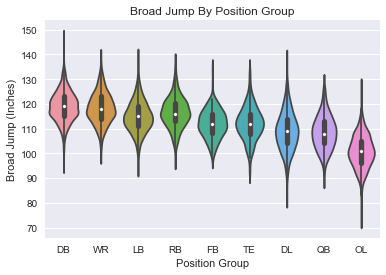

In [16]:
#Create a violinplot for broad jump, grouped by position
BJ_df_pos = df_joined[['Pos', 'Broad_Jump']].dropna()

#Eliminate outliers of 7 and 8 inch broad jumps, which make no intuitive sense
BJ_df_pos = BJ_df_pos[BJ_df_pos['Broad_Jump'] != 7]
BJ_df_pos = BJ_df_pos[BJ_df_pos['Broad_Jump'] != 8]

sns.set()
_ = sns.violinplot('Pos', 'Broad_Jump', data = BJ_df_pos, order = ['DB', 'WR', 'LB', 'RB', 'FB', 'TE', 'DL', 'QB', 'OL'])
_ = plt.xlabel('Position Group')
_ = plt.ylabel('Broad Jump (Inches)')
_ = plt.title('Broad Jump By Position Group')
_ = plt.show()


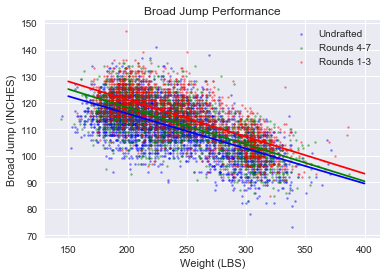

Regression for Undrafted: y=-0.131648514237x + 142.187736379, R-Squared = 0.406508999602
Regression for Rounds 4-7: y=-0.138916859363x + 145.950052982, R-Squared = 0.480538398554
Regression for Rounds 1-3: y=-0.1390566185x + 148.871806318, R-Squared = 0.48479637544


In [17]:
#Create a scatterplot of Broad Jump against weight, split by Round dimension (Undrafted, Rounds 4-7, Rounds 1-3)

BJ_13 = df_joined[['Weight', 'Broad_Jump', 'Rnd']].dropna()
BJ_13 = BJ_13[BJ_13['Rnd'] == '1-3']

BJ_47 = df_joined[['Weight', 'Broad_Jump', 'Rnd']].dropna()
BJ_47 = BJ_47[BJ_47['Rnd'] == '4-7']
BJ_47 = BJ_47[BJ_47['Broad_Jump'] >= 20]

BJ_Undrafted = df_joined[['Weight', 'Broad_Jump', 'Rnd']].dropna()
BJ_Undrafted = BJ_Undrafted[BJ_Undrafted['Rnd'] == 'Undrafted']
BJ_Undrafted = BJ_Undrafted[BJ_Undrafted['Broad_Jump'] >= 20]


#calculate regression lines for all 3 groups
x = np.array([150,400])
m_BJ_Undrafted, b_BJ_Undrafted = np.polyfit(BJ_Undrafted['Weight'], BJ_Undrafted['Broad_Jump'], deg=1)
m_BJ_47, b_BJ_47 = np.polyfit(BJ_47['Weight'], BJ_47['Broad_Jump'], deg=1)
m_BJ_13, b_BJ_13 = np.polyfit(BJ_13['Weight'], BJ_13['Broad_Jump'], deg=1)


#calculate R squared of each group
BJ_rsquared_Undrafted = rsquared(BJ_Undrafted['Weight'], BJ_Undrafted['Broad_Jump'])
BJ_rsquared_47 = rsquared(BJ_47['Weight'], BJ_47['Broad_Jump'])
BJ_rsquared_13 = rsquared(BJ_13['Weight'], BJ_13['Broad_Jump'])


#plotting regression lines
_ = plt.plot(x, m_BJ_Undrafted*x + b_BJ_Undrafted, color = 'blue')
_ = plt.plot(x, m_BJ_47*x + b_BJ_47, color = 'green')
_ = plt.plot(x, m_BJ_13*x + b_BJ_13, color = 'red')

#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Broad_Jump', data = BJ_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Broad_Jump', data = BJ_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Broad_Jump', data = BJ_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Broad Jump (INCHES)')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])
plt.title('Broad Jump Performance')
plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_BJ_Undrafted) + 'x + ' + str(b_BJ_Undrafted)  + ', R-Squared = ' + str(BJ_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_BJ_47) + 'x + ' + str(b_BJ_47) + ', R-Squared = ' + str(BJ_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_BJ_13) + 'x + ' + str(b_BJ_13) + ', R-Squared = ' + str(BJ_rsquared_13))


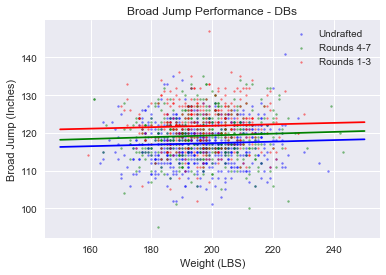

Regression for Undrafted: y=0.0201884051063x + 113.229459836, R-Squared = 0.00237690114587
Regression for Rounds 4-7: y=0.0232283451359x + 114.674023086, R-Squared = 0.00264242581656
Regression for Rounds 1-3: y=0.0190135088153x + 118.074984214, R-Squared = 0.00143028692172
Mean Value for Undrafted: 117.19602946
Mean Value for Rounds 4-7: 119.237872867
Mean Value for Rounds 1-3: 121.81071302
Mean Weight: 196.47761194029852 LBS


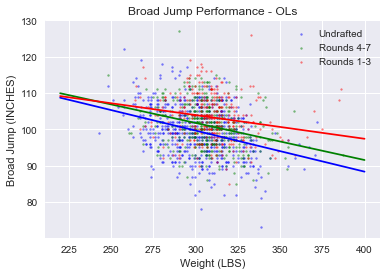

Regression for Undrafted: y=-0.112943245978x + 133.529864049, R-Squared = 0.107949968861
Regression for Rounds 4-7: y=-0.101984663984x + 132.34499794, R-Squared = 0.0779678536812
Regression for Rounds 1-3: y=-0.0651580786227x + 123.455395803, R-Squared = 0.0350538582401
Mean Value for Undrafted: 98.9769657207
Mean Value for Rounds 4-7: 101.144675201
Mean Value for Rounds 1-3: 103.521486109
Mean Weight: 305.93151479976785 LBS


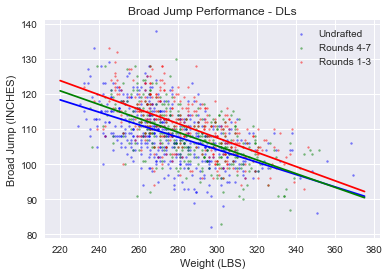

Regression for Undrafted: y=-0.177135039891x + 157.280181299, R-Squared = 0.282930395272
Regression for Rounds 4-7: y=-0.196412580414x + 164.096049479, R-Squared = 0.349873720343
Regression for Rounds 1-3: y=-0.203892690147x + 168.655016059, R-Squared = 0.359690124837
Mean Value for Undrafted: 107.336991901
Mean Value for Rounds 4-7: 108.717561351
Mean Value for Rounds 1-3: 111.167512473
Mean Weight: 281.94980184940556 LBS


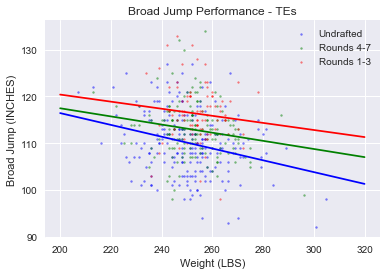

Regression for Undrafted: y=-0.126128560016x + 141.670995895, R-Squared = 0.0735040303494
Regression for Rounds 4-7: y=-0.087037403557x + 134.886710313, R-Squared = 0.0319623390041
Regression for Rounds 1-3: y=-0.0757321650014x + 135.555696984, R-Squared = 0.0111059101416
Mean Value for Undrafted: 109.905649439
Mean Value for Rounds 4-7: 112.966430892
Mean Value for Rounds 1-3: 116.482630116
Mean Weight: 251.84895833333334 LBS


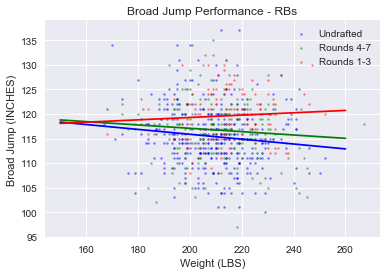

Regression for Undrafted: y=-0.0495640971645x + 125.77696177, R-Squared = 0.0140821332041
Regression for Rounds 4-7: y=-0.0340336599208x + 123.885042139, R-Squared = 0.0077724808358
Regression for Rounds 1-3: y=0.0239164594237x + 114.494981833, R-Squared = 0.00374923086608
Mean Value for Undrafted: 115.32486341
Mean Value for Rounds 4-7: 116.708009137
Mean Value for Rounds 1-3: 119.538495194
Mean Weight: 210.8804347826087 LBS


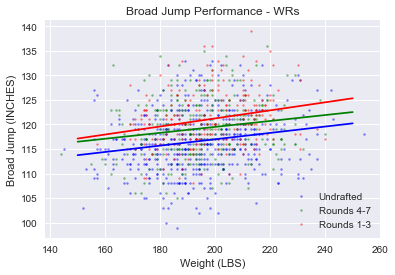

Regression for Undrafted: y=0.0646619607075x + 104.041565697, R-Squared = 0.0346268120991
Regression for Rounds 4-7: y=0.0602611657866x + 107.439115612, R-Squared = 0.0276665564521
Regression for Rounds 1-3: y=0.081941620845x + 104.827377396, R-Squared = 0.0519327397482
Mean Value for Undrafted: 116.686478887
Mean Value for Rounds 4-7: 119.223435199
Mean Value for Rounds 1-3: 120.851399416
Mean Weight: 195.55412566237698 LBS


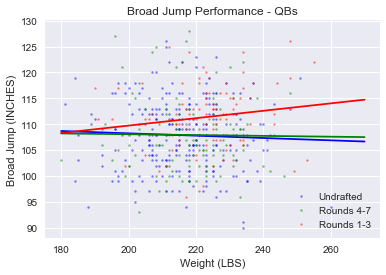

Regression for Undrafted: y=-0.022576329495x + 112.750871996, R-Squared = 0.00204126595816
Regression for Rounds 4-7: y=-0.00787015114393x + 109.634824898, R-Squared = 0.000185266514352
Regression for Rounds 1-3: y=0.0715774442486x + 95.420198092, R-Squared = 0.0199452725032
Mean Value for Undrafted: 107.825106147
Mean Value for Rounds 4-7: 107.917693611
Mean Value for Rounds 1-3: 111.037162333
Mean Weight: 218.18275862068967 LBS


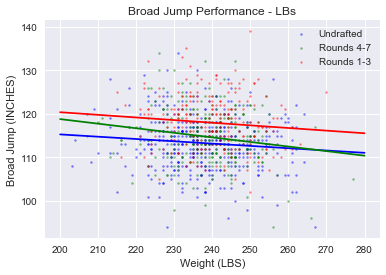

Regression for Undrafted: y=-0.05284911105x + 125.831095444, R-Squared = 0.0100566665883
Regression for Rounds 4-7: y=-0.104926275889x + 139.755438383, R-Squared = 0.0268745649817
Regression for Rounds 1-3: y=-0.0603738803852x + 132.428928353, R-Squared = 0.00872960771811
Mean Value for Undrafted: 113.23018079
Mean Value for Rounds 4-7: 114.737665686
Mean Value for Rounds 1-3: 118.03386855
Mean Weight: 238.43191311612364 LBS


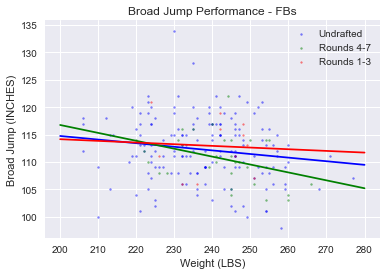

Regression for Undrafted: y=-0.0658900717984x + 127.908509361, R-Squared = 0.0240714625034
Regression for Rounds 4-7: y=-0.1445222747x + 145.64323781, R-Squared = 0.135916364147
Regression for Rounds 1-3: y=-0.0305527638191x + 120.252864322, R-Squared = 0.00311679201376
Mean Value for Undrafted: 112.19983801
Mean Value for Rounds 4-7: 111.188078569
Mean Value for Rounds 1-3: 112.968863673
Mean Weight: 238.40725806451613 LBS


In [18]:
#Scatterplot for DB Group - Broad_Jump
Broad_Jump_db_weight_13 = df_DB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_db_weight_13 = Broad_Jump_db_weight_13[Broad_Jump_db_weight_13['Rnd'] == '1-3']

Broad_Jump_db_weight_47 = df_DB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_db_weight_47 = Broad_Jump_db_weight_47[Broad_Jump_db_weight_47['Rnd'] == '4-7']

Broad_Jump_db_weight_Undrafted = df_DB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_db_weight_Undrafted = Broad_Jump_db_weight_Undrafted[Broad_Jump_db_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,250])
m_db_Undrafted, b_db_Undrafted = np.polyfit(Broad_Jump_db_weight_Undrafted['Weight'], Broad_Jump_db_weight_Undrafted['Broad_Jump'], deg=1)
m_db_47, b_db_47 = np.polyfit(Broad_Jump_db_weight_47['Weight'], Broad_Jump_db_weight_47['Broad_Jump'], deg=1)
m_db_13, b_db_13 = np.polyfit(Broad_Jump_db_weight_13['Weight'], Broad_Jump_db_weight_13['Broad_Jump'], deg=1)

Broad_Jump_db_rsquared_Undrafted = rsquared(Broad_Jump_db_weight_Undrafted['Weight'], Broad_Jump_db_weight_Undrafted['Broad_Jump'])
Broad_Jump_db_rsquared_47 = rsquared(Broad_Jump_db_weight_47['Weight'], Broad_Jump_db_weight_47['Broad_Jump'])
Broad_Jump_db_rsquared_13 = rsquared(Broad_Jump_db_weight_13['Weight'], Broad_Jump_db_weight_13['Broad_Jump'])


#plotting regression lines
_ = plt.plot(x, m_db_Undrafted*x + b_db_Undrafted, color = 'blue')
_ = plt.plot(x, m_db_47*x + b_db_47, color = 'green')
_ = plt.plot(x, m_db_13*x + b_db_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_db_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_db_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_db_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Broad Jump (Inches)')
_ = plt.title('Broad Jump Performance - DBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_db_Undrafted) + 'x + ' + str(b_db_Undrafted) + ', R-Squared = ' + str(Broad_Jump_db_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_db_47) + 'x + ' + str(b_db_47) + ', R-Squared = ' + str(Broad_Jump_db_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_db_13) + 'x + ' + str(b_db_13) + ', R-Squared = ' + str(Broad_Jump_db_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_db_Undrafted*mean_weight_DB+b_db_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_db_47*mean_weight_DB+b_db_47))
print('Mean Value for Rounds 1-3: ' + str(m_db_13*mean_weight_DB+b_db_13))
print('Mean Weight: ' + str(mean_weight_DB) + ' LBS')

#Scatterplot for OL Group
Broad_Jump_OL_weight_13 = df_OL[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_OL_weight_13 = Broad_Jump_OL_weight_13[Broad_Jump_OL_weight_13['Rnd'] == '1-3']

Broad_Jump_OL_weight_47 = df_OL[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_OL_weight_47 = Broad_Jump_OL_weight_47[Broad_Jump_OL_weight_47['Rnd'] == '4-7']
Broad_Jump_OL_weight_47 = Broad_Jump_OL_weight_47[Broad_Jump_OL_weight_47['Broad_Jump'] > 30]

Broad_Jump_OL_weight_Undrafted = df_OL[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_OL_weight_Undrafted = Broad_Jump_OL_weight_Undrafted[Broad_Jump_OL_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([220,400])
m_OL_Undrafted, b_OL_Undrafted = np.polyfit(Broad_Jump_OL_weight_Undrafted['Weight'], Broad_Jump_OL_weight_Undrafted['Broad_Jump'], deg=1)
m_OL_47, b_OL_47 = np.polyfit(Broad_Jump_OL_weight_47['Weight'], Broad_Jump_OL_weight_47['Broad_Jump'], deg=1)
m_OL_13, b_OL_13 = np.polyfit(Broad_Jump_OL_weight_13['Weight'], Broad_Jump_OL_weight_13['Broad_Jump'], deg=1)

Broad_Jump_OL_rsquared_Undrafted = rsquared(Broad_Jump_OL_weight_Undrafted['Weight'], Broad_Jump_OL_weight_Undrafted['Broad_Jump'])
Broad_Jump_OL_rsquared_47 = rsquared(Broad_Jump_OL_weight_47['Weight'], Broad_Jump_OL_weight_47['Broad_Jump'])
Broad_Jump_OL_rsquared_13 = rsquared(Broad_Jump_OL_weight_13['Weight'], Broad_Jump_OL_weight_13['Broad_Jump'])


#plotting regression lines
_ = plt.plot(x, m_OL_Undrafted*x + b_OL_Undrafted, color = 'blue')
_ = plt.plot(x, m_OL_47*x + b_OL_47, color = 'green')
_ = plt.plot(x, m_OL_13*x + b_OL_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_OL_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_OL_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_OL_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Broad Jump (INCHES)')
_ = plt.title('Broad Jump Performance - OLs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_OL_Undrafted) + 'x + ' + str(b_OL_Undrafted) + ', R-Squared = ' + str(Broad_Jump_OL_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_OL_47) + 'x + ' + str(b_OL_47) + ', R-Squared = ' + str(Broad_Jump_OL_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_OL_13) + 'x + ' + str(b_OL_13) + ', R-Squared = ' + str(Broad_Jump_OL_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_OL_Undrafted*mean_weight_OL+b_OL_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_OL_47*mean_weight_OL+b_OL_47))
print('Mean Value for Rounds 1-3: ' + str(m_OL_13*mean_weight_OL+b_OL_13))
print('Mean Weight: ' + str(mean_weight_OL) + ' LBS')

#scatterplot for Broad_Jump for DL Group
Broad_Jump_DL_weight_13 = df_DL[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_DL_weight_13 = Broad_Jump_DL_weight_13[Broad_Jump_DL_weight_13['Rnd'] == '1-3']

Broad_Jump_DL_weight_47 = df_DL[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_DL_weight_47 = Broad_Jump_DL_weight_47[Broad_Jump_DL_weight_47['Rnd'] == '4-7']

Broad_Jump_DL_weight_Undrafted = df_DL[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_DL_weight_Undrafted = Broad_Jump_DL_weight_Undrafted[Broad_Jump_DL_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([220,375])
m_DL_Undrafted, b_DL_Undrafted = np.polyfit(Broad_Jump_DL_weight_Undrafted['Weight'], Broad_Jump_DL_weight_Undrafted['Broad_Jump'], deg=1)
m_DL_47, b_DL_47 = np.polyfit(Broad_Jump_DL_weight_47['Weight'], Broad_Jump_DL_weight_47['Broad_Jump'], deg=1)
m_DL_13, b_DL_13 = np.polyfit(Broad_Jump_DL_weight_13['Weight'], Broad_Jump_DL_weight_13['Broad_Jump'], deg=1)

Broad_Jump_DL_rsquared_Undrafted = rsquared(Broad_Jump_DL_weight_Undrafted['Weight'], Broad_Jump_DL_weight_Undrafted['Broad_Jump'])
Broad_Jump_DL_rsquared_47 = rsquared(Broad_Jump_DL_weight_47['Weight'], Broad_Jump_DL_weight_47['Broad_Jump'])
Broad_Jump_DL_rsquared_13 = rsquared(Broad_Jump_DL_weight_13['Weight'], Broad_Jump_DL_weight_13['Broad_Jump'])


#plotting regression lines
_ = plt.plot(x, m_DL_Undrafted*x + b_DL_Undrafted, color = 'blue')
_ = plt.plot(x, m_DL_47*x + b_DL_47, color = 'green')
_ = plt.plot(x, m_DL_13*x + b_DL_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_DL_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_DL_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_DL_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Broad Jump (INCHES)')
_ = plt.title('Broad Jump Performance - DLs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_DL_Undrafted) + 'x + ' + str(b_DL_Undrafted) + ', R-Squared = ' + str(Broad_Jump_DL_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_DL_47) + 'x + ' + str(b_DL_47) + ', R-Squared = ' + str(Broad_Jump_DL_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_DL_13) + 'x + ' + str(b_DL_13) + ', R-Squared = ' + str(Broad_Jump_DL_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_DL_Undrafted*mean_weight_DL+b_DL_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_DL_47*mean_weight_DL+b_DL_47))
print('Mean Value for Rounds 1-3: ' + str(m_DL_13*mean_weight_DL+b_DL_13))
print('Mean Weight: ' + str(mean_weight_DL) + ' LBS')

#scatterplot for Broad_Jump for TE Group
Broad_Jump_TE_weight_13 = df_TE[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_TE_weight_13 = Broad_Jump_TE_weight_13[Broad_Jump_TE_weight_13['Rnd'] == '1-3']

Broad_Jump_TE_weight_47 = df_TE[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_TE_weight_47 = Broad_Jump_TE_weight_47[Broad_Jump_TE_weight_47['Rnd'] == '4-7']

Broad_Jump_TE_weight_Undrafted = df_TE[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_TE_weight_Undrafted = Broad_Jump_TE_weight_Undrafted[Broad_Jump_TE_weight_Undrafted['Rnd'] == 'Undrafted']
Broad_Jump_TE_weight_Undrafted = Broad_Jump_TE_weight_Undrafted[Broad_Jump_TE_weight_Undrafted['Weight'] > 180]
Broad_Jump_TE_weight_Undrafted = Broad_Jump_TE_weight_Undrafted[Broad_Jump_TE_weight_Undrafted['Weight'] < 320]


#calculate regression lines for all 3 groups
x = np.array([200,320])
m_TE_Undrafted, b_TE_Undrafted = np.polyfit(Broad_Jump_TE_weight_Undrafted['Weight'], Broad_Jump_TE_weight_Undrafted['Broad_Jump'], deg=1)
m_TE_47, b_TE_47 = np.polyfit(Broad_Jump_TE_weight_47['Weight'], Broad_Jump_TE_weight_47['Broad_Jump'], deg=1)
m_TE_13, b_TE_13 = np.polyfit (Broad_Jump_TE_weight_13['Weight'], Broad_Jump_TE_weight_13['Broad_Jump'], deg=1)

Broad_Jump_TE_rsquared_Undrafted = rsquared(Broad_Jump_TE_weight_Undrafted['Weight'], Broad_Jump_TE_weight_Undrafted['Broad_Jump'])
Broad_Jump_TE_rsquared_47 = rsquared(Broad_Jump_TE_weight_47['Weight'], Broad_Jump_TE_weight_47['Broad_Jump'])
Broad_Jump_TE_rsquared_13 = rsquared(Broad_Jump_TE_weight_13['Weight'], Broad_Jump_TE_weight_13['Broad_Jump'])


#plotting regression lines
_ = plt.plot(x, m_TE_Undrafted*x + b_TE_Undrafted, color = 'blue')
_ = plt.plot(x, m_TE_47*x + b_TE_47, color = 'green')
_ = plt.plot(x, m_TE_13*x + b_TE_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_TE_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_TE_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_TE_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Broad Jump (INCHES)')
_ = plt.title('Broad Jump Performance - TEs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_TE_Undrafted) + 'x + ' + str(b_TE_Undrafted) + ', R-Squared = ' + str(Broad_Jump_TE_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_TE_47) + 'x + ' + str(b_TE_47) + ', R-Squared = ' + str(Broad_Jump_TE_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_TE_13) + 'x + ' + str(b_TE_13) + ', R-Squared = ' + str(Broad_Jump_TE_rsquared_13))


#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_TE_Undrafted*mean_weight_TE+b_TE_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_TE_47*mean_weight_TE+b_TE_47))
print('Mean Value for Rounds 1-3: ' + str(m_TE_13*mean_weight_TE+b_TE_13))
print('Mean Weight: ' + str(mean_weight_TE) + ' LBS')

#scatterplot for Broad_Jump for RB Group
Broad_Jump_RB_weight_13 = df_RB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_RB_weight_13 = Broad_Jump_RB_weight_13[Broad_Jump_RB_weight_13['Rnd'] == '1-3']

Broad_Jump_RB_weight_47 = df_RB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_RB_weight_47 = Broad_Jump_RB_weight_47[Broad_Jump_RB_weight_47['Rnd'] == '4-7']

Broad_Jump_RB_weight_Undrafted = df_RB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_RB_weight_Undrafted = Broad_Jump_RB_weight_Undrafted[Broad_Jump_RB_weight_Undrafted ['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,260])
m_RB_Undrafted, b_RB_Undrafted = np.polyfit(Broad_Jump_RB_weight_Undrafted['Weight'], Broad_Jump_RB_weight_Undrafted['Broad_Jump'], deg=1)
m_RB_47, b_RB_47 = np.polyfit(Broad_Jump_RB_weight_47['Weight'], Broad_Jump_RB_weight_47['Broad_Jump'], deg=1)
m_RB_13, b_RB_13 = np.polyfit (Broad_Jump_RB_weight_13['Weight'], Broad_Jump_RB_weight_13['Broad_Jump'], deg=1)

Broad_Jump_RB_rsquared_Undrafted = rsquared(Broad_Jump_RB_weight_Undrafted['Weight'], Broad_Jump_RB_weight_Undrafted['Broad_Jump'])
Broad_Jump_RB_rsquared_47 = rsquared(Broad_Jump_RB_weight_47['Weight'], Broad_Jump_RB_weight_47['Broad_Jump'])
Broad_Jump_RB_rsquared_13 = rsquared(Broad_Jump_RB_weight_13['Weight'], Broad_Jump_RB_weight_13['Broad_Jump'])


#plotting regression lines
_ = plt.plot(x, m_RB_Undrafted*x + b_RB_Undrafted, color = 'blue')
_ = plt.plot(x, m_RB_47*x + b_RB_47, color = 'green')
_ = plt.plot(x, m_RB_13*x + b_RB_13, color = 'red')


#scatRBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_RB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_RB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_RB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Broad Jump (INCHES)')
_ = plt.title('Broad Jump Performance - RBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_RB_Undrafted) + 'x + ' + str(b_RB_Undrafted) + ', R-Squared = ' + str(Broad_Jump_RB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_RB_47) + 'x + ' + str(b_RB_47) + ', R-Squared = ' + str(Broad_Jump_RB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_RB_13) + 'x + ' + str(b_RB_13) + ', R-Squared = ' + str(Broad_Jump_RB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_RB_Undrafted*mean_weight_RB+b_RB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_RB_47*mean_weight_RB+b_RB_47))
print('Mean Value for Rounds 1-3: ' + str(m_RB_13*mean_weight_RB+b_RB_13))
print('Mean Weight: ' + str(mean_weight_RB) + ' LBS')

#scatterplot for Broad_Jump for WR Group
Broad_Jump_WR_weight_13 = df_WR[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_WR_weight_13 = Broad_Jump_WR_weight_13[Broad_Jump_WR_weight_13['Rnd'] == '1-3']

Broad_Jump_WR_weight_47 = df_WR[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_WR_weight_47 = Broad_Jump_WR_weight_47[Broad_Jump_WR_weight_47['Rnd'] == '4-7']

Broad_Jump_WR_weight_Undrafted = df_WR[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_WR_weight_Undrafted = Broad_Jump_WR_weight_Undrafted[Broad_Jump_WR_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,250])
m_WR_Undrafted, b_WR_Undrafted = np. polyfit (Broad_Jump_WR_weight_Undrafted ['Weight'], Broad_Jump_WR_weight_Undrafted ['Broad_Jump'], deg=1)
m_WR_47, b_WR_47 = np.polyfit(Broad_Jump_WR_weight_47['Weight'], Broad_Jump_WR_weight_47['Broad_Jump'], deg=1)
m_WR_13, b_WR_13 = np. polyfit (Broad_Jump_WR_weight_13['Weight'], Broad_Jump_WR_weight_13['Broad_Jump'], deg=1)

Broad_Jump_WR_rsquared_Undrafted = rsquared(Broad_Jump_WR_weight_Undrafted['Weight'], Broad_Jump_WR_weight_Undrafted['Broad_Jump'])
Broad_Jump_WR_rsquared_47 = rsquared(Broad_Jump_WR_weight_47['Weight'], Broad_Jump_WR_weight_47['Broad_Jump'])
Broad_Jump_WR_rsquared_13 = rsquared(Broad_Jump_WR_weight_13['Weight'], Broad_Jump_WR_weight_13['Broad_Jump'])


#plotting regression lines
_ = plt.plot(x, m_WR_Undrafted*x + b_WR_Undrafted, color = 'blue')
_ = plt.plot(x, m_WR_47*x + b_WR_47, color = 'green')
_ = plt.plot(x, m_WR_13*x + b_WR_13, color = 'red')


#scatWRrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_WR_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_WR_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_WR_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Broad Jump (INCHES)')
_ = plt.title('Broad Jump Performance - WRs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_WR_Undrafted) + 'x + ' + str(b_WR_Undrafted) + ', R-Squared = ' + str(Broad_Jump_WR_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_WR_47) + 'x + ' + str(b_WR_47) + ', R-Squared = ' + str(Broad_Jump_WR_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_WR_13) + 'x + ' + str(b_WR_13) + ', R-Squared = ' + str(Broad_Jump_WR_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_WR_Undrafted*mean_weight_WR+b_WR_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_WR_47*mean_weight_WR+b_WR_47))
print('Mean Value for Rounds 1-3: ' + str(m_WR_13*mean_weight_WR+b_WR_13))
print('Mean Weight: ' + str(mean_weight_WR) + ' LBS')

#scatterplot for Broad_Jump for QB Group
Broad_Jump_QB_weight_13 = df_QB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_QB_weight_13 = Broad_Jump_QB_weight_13[Broad_Jump_QB_weight_13['Rnd'] == '1-3']

Broad_Jump_QB_weight_47 = df_QB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_QB_weight_47 = Broad_Jump_QB_weight_47[Broad_Jump_QB_weight_47['Rnd'] == '4-7']

Broad_Jump_QB_weight_Undrafted = df_QB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_QB_weight_Undrafted = Broad_Jump_QB_weight_Undrafted[Broad_Jump_QB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([180,270])
m_QB_Undrafted, b_QB_Undrafted = np.polyfit(Broad_Jump_QB_weight_Undrafted['Weight'], Broad_Jump_QB_weight_Undrafted['Broad_Jump'], deg=1)
m_QB_47, b_QB_47 = np.polyfit(Broad_Jump_QB_weight_47['Weight'], Broad_Jump_QB_weight_47['Broad_Jump'], deg=1)
m_QB_13, b_QB_13 = np.polyfit(Broad_Jump_QB_weight_13['Weight'], Broad_Jump_QB_weight_13['Broad_Jump'], deg=1)

Broad_Jump_QB_rsquared_Undrafted = rsquared(Broad_Jump_QB_weight_Undrafted['Weight'], Broad_Jump_QB_weight_Undrafted['Broad_Jump'])
Broad_Jump_QB_rsquared_47 = rsquared(Broad_Jump_QB_weight_47['Weight'], Broad_Jump_QB_weight_47['Broad_Jump'])
Broad_Jump_QB_rsquared_13 = rsquared(Broad_Jump_QB_weight_13['Weight'], Broad_Jump_QB_weight_13['Broad_Jump'])


#plotting regression lines
_ = plt.plot(x, m_QB_Undrafted*x + b_QB_Undrafted, color = 'blue')
_ = plt.plot(x, m_QB_47*x + b_QB_47, color = 'green')
_ = plt.plot(x, m_QB_13*x + b_QB_13, color = 'red')


#scatQBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_QB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_QB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_QB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Broad Jump (INCHES)')
_ = plt.title('Broad Jump Performance - QBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_QB_Undrafted) + 'x + ' + str(b_QB_Undrafted) + ', R-Squared = ' + str(Broad_Jump_QB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_QB_47) + 'x + ' + str(b_QB_47) + ', R-Squared = ' + str(Broad_Jump_QB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_QB_13) + 'x + ' + str(b_QB_13) + ', R-Squared = ' + str(Broad_Jump_QB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_QB_Undrafted*mean_weight_QB+b_QB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_QB_47*mean_weight_QB+b_QB_47))
print('Mean Value for Rounds 1-3: ' + str(m_QB_13*mean_weight_QB+b_QB_13))
print('Mean Weight: ' + str(mean_weight_QB) + ' LBS')

#scatterplot for Broad_Jump for LB Group
Broad_Jump_LB_weight_13 = df_LB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_LB_weight_13 = Broad_Jump_LB_weight_13[Broad_Jump_LB_weight_13['Rnd'] == '1-3']

Broad_Jump_LB_weight_47 = df_LB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_LB_weight_47 = Broad_Jump_LB_weight_47[Broad_Jump_LB_weight_47['Rnd'] == '4-7']

Broad_Jump_LB_weight_Undrafted = df_LB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_LB_weight_Undrafted = Broad_Jump_LB_weight_Undrafted[Broad_Jump_LB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([200,280])
m_LB_Undrafted, b_LB_Undrafted = np.polyfit(Broad_Jump_LB_weight_Undrafted['Weight'], Broad_Jump_LB_weight_Undrafted['Broad_Jump'], deg=1)
m_LB_47, b_LB_47 = np.polyfit(Broad_Jump_LB_weight_47['Weight'], Broad_Jump_LB_weight_47['Broad_Jump'], deg=1)
m_LB_13, b_LB_13 = np.polyfit(Broad_Jump_LB_weight_13['Weight'], Broad_Jump_LB_weight_13['Broad_Jump'], deg=1)

Broad_Jump_LB_rsquared_Undrafted = rsquared(Broad_Jump_LB_weight_Undrafted['Weight'], Broad_Jump_LB_weight_Undrafted['Broad_Jump'])
Broad_Jump_LB_rsquared_47 = rsquared(Broad_Jump_LB_weight_47['Weight'], Broad_Jump_LB_weight_47['Broad_Jump'])
Broad_Jump_LB_rsquared_13 = rsquared(Broad_Jump_LB_weight_13['Weight'], Broad_Jump_LB_weight_13['Broad_Jump'])


#plotting regression lines
_ = plt.plot(x, m_LB_Undrafted*x + b_LB_Undrafted, color = 'blue')
_ = plt.plot(x, m_LB_47*x + b_LB_47, color = 'green')
_ = plt.plot(x, m_LB_13*x + b_LB_13, color = 'red')


#scatLBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_LB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_LB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_LB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Broad Jump (INCHES)')
_ = plt.title('Broad Jump Performance - LBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_LB_Undrafted) + 'x + ' + str(b_LB_Undrafted) + ', R-Squared = ' + str(Broad_Jump_LB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_LB_47) + 'x + ' + str(b_LB_47) + ', R-Squared = ' + str(Broad_Jump_LB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_LB_13) + 'x + ' + str(b_LB_13) + ', R-Squared = ' + str(Broad_Jump_LB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_LB_Undrafted*mean_weight_LB+b_LB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_LB_47*mean_weight_LB+b_LB_47))
print('Mean Value for Rounds 1-3: ' + str(m_LB_13*mean_weight_LB+b_LB_13))
print('Mean Weight: ' + str(mean_weight_LB) + ' LBS')

#scatterplot for Broad_Jump for FB Group
Broad_Jump_FB_weight_13 = df_FB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_FB_weight_13 = Broad_Jump_FB_weight_13[Broad_Jump_FB_weight_13['Rnd'] == '1-3']

Broad_Jump_FB_weight_47 = df_FB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_FB_weight_47 = Broad_Jump_FB_weight_47[Broad_Jump_FB_weight_47['Rnd'] == '4-7']

Broad_Jump_FB_weight_Undrafted = df_FB[['Weight', 'Broad_Jump', 'Rnd']].dropna()
Broad_Jump_FB_weight_Undrafted = Broad_Jump_FB_weight_Undrafted[Broad_Jump_FB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([200,280])
m_FB_Undrafted, b_FB_Undrafted = np.polyfit(Broad_Jump_FB_weight_Undrafted['Weight'], Broad_Jump_FB_weight_Undrafted['Broad_Jump'], deg=1)
m_FB_47, b_FB_47 = np.polyfit(Broad_Jump_FB_weight_47['Weight'], Broad_Jump_FB_weight_47['Broad_Jump'], deg=1)
m_FB_13, b_FB_13 = np.polyfit(Broad_Jump_FB_weight_13['Weight'], Broad_Jump_FB_weight_13['Broad_Jump'], deg=1)

Broad_Jump_FB_rsquared_Undrafted = rsquared(Broad_Jump_FB_weight_Undrafted['Weight'], Broad_Jump_FB_weight_Undrafted['Broad_Jump'])
Broad_Jump_FB_rsquared_47 = rsquared(Broad_Jump_FB_weight_47['Weight'], Broad_Jump_FB_weight_47['Broad_Jump'])
Broad_Jump_FB_rsquared_13 = rsquared(Broad_Jump_FB_weight_13['Weight'], Broad_Jump_FB_weight_13['Broad_Jump'])


#plotting regression lines
_ = plt.plot(x, m_FB_Undrafted*x + b_FB_Undrafted, color = 'blue')
_ = plt.plot(x, m_FB_47*x + b_FB_47, color = 'green')
_ = plt.plot(x, m_FB_13*x + b_FB_13, color = 'red')


#scatFBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_FB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_FB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Broad_Jump', data = Broad_Jump_FB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Broad Jump (INCHES)')
_ = plt.title('Broad Jump Performance - FBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_FB_Undrafted) + 'x + ' + str(b_FB_Undrafted) + ', R-Squared = ' + str(Broad_Jump_FB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_FB_47) + 'x + ' + str(b_FB_47) + ', R-Squared = ' + str(Broad_Jump_FB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_FB_13) + 'x + ' + str(b_FB_13) + ', R-Squared = ' + str(Broad_Jump_FB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_FB_Undrafted*mean_weight_FB+b_FB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_FB_47*mean_weight_FB+b_FB_47))
print('Mean Value for Rounds 1-3: ' + str(m_FB_13*mean_weight_FB+b_FB_13))
print('Mean Weight: ' + str(mean_weight_FB) + ' LBS')

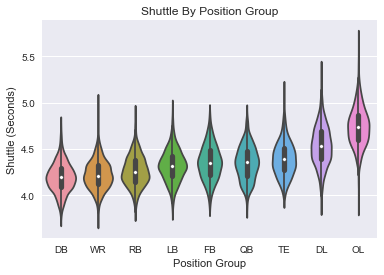

In [19]:
#Create a violinplot for Shuttle, grouped by position
Shuttle_df_pos = df_joined[['Pos', 'Shuttle']].dropna()

sns.set()
_ = sns.violinplot('Pos', 'Shuttle', data = Shuttle_df_pos, order = ['DB', 'WR', 'RB', 'LB', 'FB', 'QB', 'TE', 'DL', 'OL'])
_ = plt.xlabel('Position Group')
_ = plt.ylabel('Shuttle (Seconds)')
_ = plt.title('Shuttle By Position Group')
_ = plt.show()

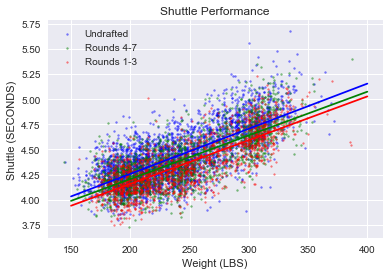

Regression for Undrafted: y=0.00448538963172x + 3.36067635371, R-Squared = 0.525759297723
Regression for Rounds 4-7: y=0.00434141153401x + 3.33806255836, R-Squared = 0.560587634565
Regression for Rounds 1-3: y=0.00434701351767x + 3.28884329144, R-Squared = 0.594110613151


In [20]:
#Create a scatterplot of Shuttle against weight, split by Round dimension (Undrafted, Rounds 4-7, Rounds 1-3)

Shuttle_13 = df_joined[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_13 = Shuttle_13[Shuttle_13['Rnd'] == '1-3']

Shuttle_47 = df_joined[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_47 = Shuttle_47[Shuttle_47['Rnd'] == '4-7']

Shuttle_Undrafted = df_joined[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_Undrafted = Shuttle_Undrafted[Shuttle_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,400])
m_Shuttle_Undrafted, b_Shuttle_Undrafted = np.polyfit(Shuttle_Undrafted['Weight'], Shuttle_Undrafted['Shuttle'], deg=1)
m_Shuttle_47, b_Shuttle_47 = np.polyfit(Shuttle_47['Weight'], Shuttle_47['Shuttle'], deg=1)
m_Shuttle_13, b_Shuttle_13 = np.polyfit(Shuttle_13['Weight'], Shuttle_13['Shuttle'], deg=1)


#calculate R squared of each group
Shuttle_rsquared_Undrafted = rsquared(Shuttle_Undrafted['Weight'], Shuttle_Undrafted['Shuttle'])
Shuttle_rsquared_47 = rsquared(Shuttle_47['Weight'], Shuttle_47['Shuttle'])
Shuttle_rsquared_13 = rsquared(Shuttle_13['Weight'], Shuttle_13['Shuttle'])


#plotting regression lines
_ = plt.plot(x, m_Shuttle_Undrafted*x + b_Shuttle_Undrafted, color = 'blue')
_ = plt.plot(x, m_Shuttle_47*x + b_Shuttle_47, color = 'green')
_ = plt.plot(x, m_Shuttle_13*x + b_Shuttle_13, color = 'red')

#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Shuttle', data = Shuttle_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Shuttle', data = Shuttle_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Shuttle', data = Shuttle_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Shuttle (SECONDS)')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])
plt.title('Shuttle Performance')
plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_Shuttle_Undrafted) + 'x + ' + str(b_Shuttle_Undrafted)  + ', R-Squared = ' + str(Shuttle_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_Shuttle_47) + 'x + ' + str(b_Shuttle_47) + ', R-Squared = ' + str(Shuttle_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_Shuttle_13) + 'x + ' + str(b_Shuttle_13) + ', R-Squared = ' + str(Shuttle_rsquared_13))

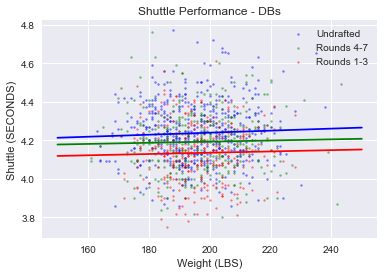

Regression for Undrafted: y=0.000526311435529x + 4.13398149374, R-Squared = 0.00198760438966
Regression for Rounds 4-7: y=0.000297819661813x + 4.13318403278, R-Squared = 0.000687067368613
Regression for Rounds 1-3: y=0.000334697393855x + 4.06833223932, R-Squared = 0.000607127799958
Mean Value for Undrafted: 4.23738990773
Mean Value for Rounds 4-7: 4.19169892872
Mean Value for Rounds 1-3: 4.13409278399
Mean Weight: 196.47761194029852 LBS


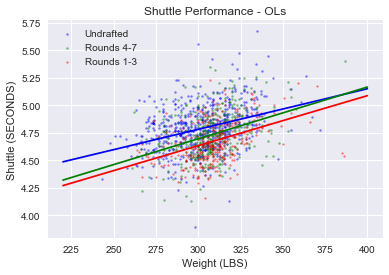

Regression for Undrafted: y=0.00369517310959x + 3.6737305751, R-Squared = 0.118827818818
Regression for Rounds 4-7: y=0.00470417130157x + 3.28540318177, R-Squared = 0.139577663607
Regression for Rounds 1-3: y=0.00454525247286x + 3.27047660505, R-Squared = 0.174671997258
Mean Value for Undrafted: 4.80420048196
Mean Value for Rounds 4-7: 4.72455743394
Mean Value for Rounds 1-3: 4.66101257922
Mean Weight: 305.93151479976785 LBS


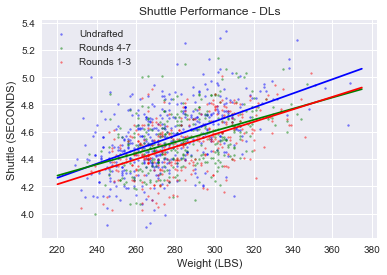

Regression for Undrafted: y=0.00515480566556x + 3.12865263051, R-Squared = 0.280127160837
Regression for Rounds 4-7: y=0.00408549119983x + 3.38013999009, R-Squared = 0.202960101378
Regression for Rounds 1-3: y=0.00457167190581x + 3.20962419122, R-Squared = 0.276494833576
Mean Value for Undrafted: 4.58204906648
Mean Value for Rounds 4-7: 4.53204342434
Mean Value for Rounds 1-3: 4.49860617918
Mean Weight: 281.94980184940556 LBS


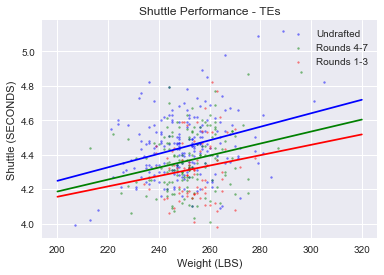

Regression for Undrafted: y=0.00392109769475x + 3.46400666131, R-Squared = 0.0951106698483
Regression for Rounds 4-7: y=0.00348109167168x + 3.48982125059, R-Squared = 0.0563638680889
Regression for Rounds 1-3: y=0.00301540351755x + 3.55252644991, R-Squared = 0.0210991066942
Mean Value for Undrafted: 4.45153103125
Mean Value for Rounds 4-7: 4.36653056196
Mean Value for Rounds 1-3: 4.31195268476
Mean Weight: 251.84895833333334 LBS


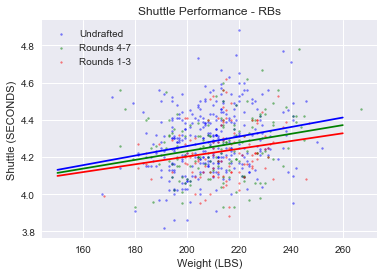

Regression for Undrafted: y=0.00255753155777x + 3.7468976711, R-Squared = 0.0474720281697
Regression for Rounds 4-7: y=0.00233524055414x + 3.76382529684, R-Squared = 0.0562869893422
Regression for Rounds 1-3: y=0.00208339046849x + 3.78542290868, R-Squared = 0.0369083420555
Mean Value for Undrafted: 4.28623103798
Mean Value for Rounds 4-7: 4.25628184021
Mean Value for Rounds 1-3: 4.2247691965
Mean Weight: 210.8804347826087 LBS


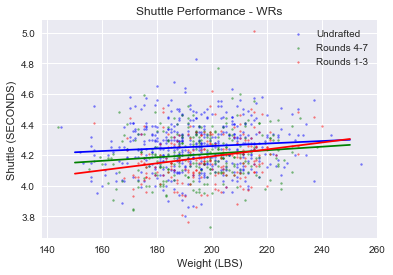

Regression for Undrafted: y=0.000816248615475x + 4.09594696399, R-Squared = 0.00829592908326
Regression for Rounds 4-7: y=0.00115352056826x + 3.97813358141, R-Squared = 0.0161959373365
Regression for Rounds 1-3: y=0.00226470760886x + 3.73906647745, R-Squared = 0.0499536388795
Mean Value for Undrafted: 4.25556774831
Mean Value for Rounds 4-7: 4.20370928757
Mean Value for Rounds 1-3: 4.18193939378
Mean Weight: 195.55412566237698 LBS


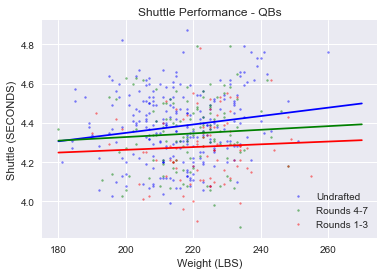

Regression for Undrafted: y=0.00213800301764x + 3.92128664671, R-Squared = 0.0255860767845
Regression for Rounds 4-7: y=0.000922295218625x + 4.14330258222, R-Squared = 0.00386100681162
Regression for Rounds 1-3: y=0.000699758275817x + 4.12281522967, R-Squared = 0.00260700232953
Mean Value for Undrafted: 4.38776204304
Mean Value for Rounds 4-7: 4.34453149728
Mean Value for Rounds 1-3: 4.27549042066
Mean Weight: 218.18275862068967 LBS


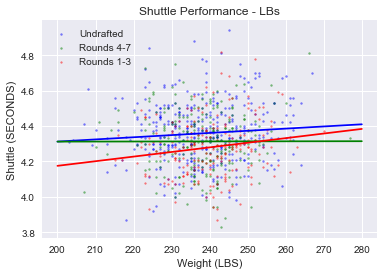

Regression for Undrafted: y=0.00121960789142x + 4.06819180086, R-Squared = 0.00675359098339
Regression for Rounds 4-7: y=2.81055539776e-05x + 4.30633309019, R-Squared = 2.62519290249e-06
Regression for Rounds 1-3: y=0.00260561914672x + 3.6540110107, R-Squared = 0.0250189791837
Mean Value for Undrafted: 4.35898524367
Mean Value for Rounds 4-7: 4.31303435119
Mean Value for Rounds 1-3: 4.2752737687
Mean Weight: 238.43191311612364 LBS


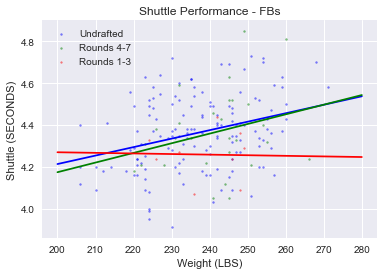

Regression for Undrafted: y=0.00405226966407x + 3.40314798475, R-Squared = 0.0959871706446
Regression for Rounds 4-7: y=0.00461510733739x + 3.25149551426, R-Squared = 0.071963898683
Regression for Rounds 1-3: y=-0.000284974093264x + 4.32699769718, R-Squared = 0.00054952152772
Mean Value for Undrafted: 4.3692384843
Mean Value for Rounds 4-7: 4.35177060024
Mean Value for Rounds 1-3: 4.25905780498
Mean Weight: 238.40725806451613 LBS


In [21]:
#Scatterplot for DB Group - Shuttle
Shuttle_db_weight_13 = df_DB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_db_weight_13 = Shuttle_db_weight_13[Shuttle_db_weight_13['Rnd'] == '1-3']

Shuttle_db_weight_47 = df_DB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_db_weight_47 = Shuttle_db_weight_47[Shuttle_db_weight_47['Rnd'] == '4-7']

Shuttle_db_weight_Undrafted = df_DB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_db_weight_Undrafted = Shuttle_db_weight_Undrafted[Shuttle_db_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,250])
m_db_Undrafted, b_db_Undrafted = np.polyfit(Shuttle_db_weight_Undrafted['Weight'], Shuttle_db_weight_Undrafted['Shuttle'], deg=1)
m_db_47, b_db_47 = np.polyfit(Shuttle_db_weight_47['Weight'], Shuttle_db_weight_47['Shuttle'], deg=1)
m_db_13, b_db_13 = np.polyfit(Shuttle_db_weight_13['Weight'], Shuttle_db_weight_13['Shuttle'], deg=1)

Shuttle_db_rsquared_Undrafted = rsquared(Shuttle_db_weight_Undrafted['Weight'], Shuttle_db_weight_Undrafted['Shuttle'])
Shuttle_db_rsquared_47 = rsquared(Shuttle_db_weight_47['Weight'], Shuttle_db_weight_47['Shuttle'])
Shuttle_db_rsquared_13 = rsquared(Shuttle_db_weight_13['Weight'], Shuttle_db_weight_13['Shuttle'])


#plotting regression lines
_ = plt.plot(x, m_db_Undrafted*x + b_db_Undrafted, color = 'blue')
_ = plt.plot(x, m_db_47*x + b_db_47, color = 'green')
_ = plt.plot(x, m_db_13*x + b_db_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Shuttle', data = Shuttle_db_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Shuttle', data = Shuttle_db_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Shuttle', data = Shuttle_db_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Shuttle (SECONDS)')
_ = plt.title('Shuttle Performance - DBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_db_Undrafted) + 'x + ' + str(b_db_Undrafted) + ', R-Squared = ' + str(Shuttle_db_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_db_47) + 'x + ' + str(b_db_47) + ', R-Squared = ' + str(Shuttle_db_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_db_13) + 'x + ' + str(b_db_13) + ', R-Squared = ' + str(Shuttle_db_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_db_Undrafted*mean_weight_DB+b_db_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_db_47*mean_weight_DB+b_db_47))
print('Mean Value for Rounds 1-3: ' + str(m_db_13*mean_weight_DB+b_db_13))
print('Mean Weight: ' + str(mean_weight_DB) + ' LBS')

#Scatterplot for OL Group
Shuttle_OL_weight_13 = df_OL[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_OL_weight_13 = Shuttle_OL_weight_13[Shuttle_OL_weight_13['Rnd'] == '1-3']

Shuttle_OL_weight_47 = df_OL[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_OL_weight_47 = Shuttle_OL_weight_47[Shuttle_OL_weight_47['Rnd'] == '4-7']

Shuttle_OL_weight_Undrafted = df_OL[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_OL_weight_Undrafted = Shuttle_OL_weight_Undrafted[Shuttle_OL_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([220,400])
m_OL_Undrafted, b_OL_Undrafted = np.polyfit(Shuttle_OL_weight_Undrafted['Weight'], Shuttle_OL_weight_Undrafted['Shuttle'], deg=1)
m_OL_47, b_OL_47 = np.polyfit(Shuttle_OL_weight_47['Weight'], Shuttle_OL_weight_47['Shuttle'], deg=1)
m_OL_13, b_OL_13 = np.polyfit(Shuttle_OL_weight_13['Weight'], Shuttle_OL_weight_13['Shuttle'], deg=1)

Shuttle_OL_rsquared_Undrafted = rsquared(Shuttle_OL_weight_Undrafted['Weight'], Shuttle_OL_weight_Undrafted['Shuttle'])
Shuttle_OL_rsquared_47 = rsquared(Shuttle_OL_weight_47['Weight'], Shuttle_OL_weight_47['Shuttle'])
Shuttle_OL_rsquared_13 = rsquared(Shuttle_OL_weight_13['Weight'], Shuttle_OL_weight_13['Shuttle'])


#plotting regression lines
_ = plt.plot(x, m_OL_Undrafted*x + b_OL_Undrafted, color = 'blue')
_ = plt.plot(x, m_OL_47*x + b_OL_47, color = 'green')
_ = plt.plot(x, m_OL_13*x + b_OL_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Shuttle', data = Shuttle_OL_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Shuttle', data = Shuttle_OL_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Shuttle', data = Shuttle_OL_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Shuttle (SECONDS)')
_ = plt.title('Shuttle Performance - OLs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_OL_Undrafted) + 'x + ' + str(b_OL_Undrafted) + ', R-Squared = ' + str(Shuttle_OL_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_OL_47) + 'x + ' + str(b_OL_47) + ', R-Squared = ' + str(Shuttle_OL_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_OL_13) + 'x + ' + str(b_OL_13) + ', R-Squared = ' + str(Shuttle_OL_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_OL_Undrafted*mean_weight_OL+b_OL_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_OL_47*mean_weight_OL+b_OL_47))
print('Mean Value for Rounds 1-3: ' + str(m_OL_13*mean_weight_OL+b_OL_13))
print('Mean Weight: ' + str(mean_weight_OL) + ' LBS')

#scatterplot for Shuttle for DL Group
Shuttle_DL_weight_13 = df_DL[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_DL_weight_13 = Shuttle_DL_weight_13[Shuttle_DL_weight_13['Rnd'] == '1-3']

Shuttle_DL_weight_47 = df_DL[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_DL_weight_47 = Shuttle_DL_weight_47[Shuttle_DL_weight_47['Rnd'] == '4-7']

Shuttle_DL_weight_Undrafted = df_DL[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_DL_weight_Undrafted = Shuttle_DL_weight_Undrafted[Shuttle_DL_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([220,375])
m_DL_Undrafted, b_DL_Undrafted = np.polyfit(Shuttle_DL_weight_Undrafted['Weight'], Shuttle_DL_weight_Undrafted['Shuttle'], deg=1)
m_DL_47, b_DL_47 = np.polyfit(Shuttle_DL_weight_47['Weight'], Shuttle_DL_weight_47['Shuttle'], deg=1)
m_DL_13, b_DL_13 = np.polyfit(Shuttle_DL_weight_13['Weight'], Shuttle_DL_weight_13['Shuttle'], deg=1)

Shuttle_DL_rsquared_Undrafted = rsquared(Shuttle_DL_weight_Undrafted['Weight'], Shuttle_DL_weight_Undrafted['Shuttle'])
Shuttle_DL_rsquared_47 = rsquared(Shuttle_DL_weight_47['Weight'], Shuttle_DL_weight_47['Shuttle'])
Shuttle_DL_rsquared_13 = rsquared(Shuttle_DL_weight_13['Weight'], Shuttle_DL_weight_13['Shuttle'])


#plotting regression lines
_ = plt.plot(x, m_DL_Undrafted*x + b_DL_Undrafted, color = 'blue')
_ = plt.plot(x, m_DL_47*x + b_DL_47, color = 'green')
_ = plt.plot(x, m_DL_13*x + b_DL_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Shuttle', data = Shuttle_DL_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Shuttle', data = Shuttle_DL_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Shuttle', data = Shuttle_DL_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Shuttle (SECONDS)')
_ = plt.title('Shuttle Performance - DLs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_DL_Undrafted) + 'x + ' + str(b_DL_Undrafted) + ', R-Squared = ' + str(Shuttle_DL_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_DL_47) + 'x + ' + str(b_DL_47) + ', R-Squared = ' + str(Shuttle_DL_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_DL_13) + 'x + ' + str(b_DL_13) + ', R-Squared = ' + str(Shuttle_DL_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_DL_Undrafted*mean_weight_DL+b_DL_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_DL_47*mean_weight_DL+b_DL_47))
print('Mean Value for Rounds 1-3: ' + str(m_DL_13*mean_weight_DL+b_DL_13))
print('Mean Weight: ' + str(mean_weight_DL) + ' LBS')

#scatterplot for Shuttle for TE Group
Shuttle_TE_weight_13 = df_TE[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_TE_weight_13 = Shuttle_TE_weight_13[Shuttle_TE_weight_13['Rnd'] == '1-3']

Shuttle_TE_weight_47 = df_TE[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_TE_weight_47 = Shuttle_TE_weight_47[Shuttle_TE_weight_47['Rnd'] == '4-7']

Shuttle_TE_weight_Undrafted = df_TE[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_TE_weight_Undrafted = Shuttle_TE_weight_Undrafted[Shuttle_TE_weight_Undrafted['Rnd'] == 'Undrafted']
Shuttle_TE_weight_Undrafted = Shuttle_TE_weight_Undrafted[Shuttle_TE_weight_Undrafted['Weight'] > 180]
Shuttle_TE_weight_Undrafted = Shuttle_TE_weight_Undrafted[Shuttle_TE_weight_Undrafted['Weight'] < 320]


#calculate regression lines for all 3 groups
x = np.array([200,320])
m_TE_Undrafted, b_TE_Undrafted = np.polyfit (Shuttle_TE_weight_Undrafted['Weight'], Shuttle_TE_weight_Undrafted['Shuttle'], deg=1)
m_TE_47, b_TE_47 = np.polyfit(Shuttle_TE_weight_47['Weight'], Shuttle_TE_weight_47['Shuttle'], deg=1)
m_TE_13, b_TE_13 = np.polyfit(Shuttle_TE_weight_13['Weight'], Shuttle_TE_weight_13['Shuttle'], deg=1)

Shuttle_TE_rsquared_Undrafted = rsquared(Shuttle_TE_weight_Undrafted['Weight'], Shuttle_TE_weight_Undrafted['Shuttle'])
Shuttle_TE_rsquared_47 = rsquared(Shuttle_TE_weight_47['Weight'], Shuttle_TE_weight_47['Shuttle'])
Shuttle_TE_rsquared_13 = rsquared(Shuttle_TE_weight_13['Weight'], Shuttle_TE_weight_13['Shuttle'])


#plotting regression lines
_ = plt.plot(x, m_TE_Undrafted*x + b_TE_Undrafted, color = 'blue')
_ = plt.plot(x, m_TE_47*x + b_TE_47, color = 'green')
_ = plt.plot(x, m_TE_13*x + b_TE_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', 'Shuttle', data = Shuttle_TE_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Shuttle', data = Shuttle_TE_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Shuttle', data = Shuttle_TE_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Shuttle (SECONDS)')
_ = plt.title('Shuttle Performance - TEs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_TE_Undrafted) + 'x + ' + str(b_TE_Undrafted) + ', R-Squared = ' + str(Shuttle_TE_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_TE_47) + 'x + ' + str(b_TE_47) + ', R-Squared = ' + str(Shuttle_TE_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_TE_13) + 'x + ' + str(b_TE_13) + ', R-Squared = ' + str(Shuttle_TE_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_TE_Undrafted*mean_weight_TE+b_TE_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_TE_47*mean_weight_TE+b_TE_47))
print('Mean Value for Rounds 1-3: ' + str(m_TE_13*mean_weight_TE+b_TE_13))
print('Mean Weight: ' + str(mean_weight_TE) + ' LBS')

#scatterplot for Shuttle for RB Group
Shuttle_RB_weight_13 = df_RB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_RB_weight_13 = Shuttle_RB_weight_13[Shuttle_RB_weight_13['Rnd'] == '1-3']

Shuttle_RB_weight_47 = df_RB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_RB_weight_47 = Shuttle_RB_weight_47[Shuttle_RB_weight_47['Rnd'] == '4-7']

Shuttle_RB_weight_Undrafted = df_RB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_RB_weight_Undrafted = Shuttle_RB_weight_Undrafted[Shuttle_RB_weight_Undrafted ['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,260])
m_RB_Undrafted, b_RB_Undrafted = np.polyfit(Shuttle_RB_weight_Undrafted['Weight'], Shuttle_RB_weight_Undrafted['Shuttle'], deg=1)
m_RB_47, b_RB_47 = np.polyfit(Shuttle_RB_weight_47['Weight'], Shuttle_RB_weight_47['Shuttle'], deg=1)
m_RB_13, b_RB_13 = np.polyfit(Shuttle_RB_weight_13['Weight'], Shuttle_RB_weight_13['Shuttle'], deg=1)

Shuttle_RB_rsquared_Undrafted = rsquared(Shuttle_RB_weight_Undrafted['Weight'], Shuttle_RB_weight_Undrafted['Shuttle'])
Shuttle_RB_rsquared_47 = rsquared(Shuttle_RB_weight_47['Weight'], Shuttle_RB_weight_47['Shuttle'])
Shuttle_RB_rsquared_13 = rsquared(Shuttle_RB_weight_13['Weight'], Shuttle_RB_weight_13['Shuttle'])


#plotting regression lines
_ = plt.plot(x, m_RB_Undrafted*x + b_RB_Undrafted, color = 'blue')
_ = plt.plot(x, m_RB_47*x + b_RB_47, color = 'green')
_ = plt.plot(x, m_RB_13*x + b_RB_13, color = 'red')


#scatRBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Shuttle', data = Shuttle_RB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Shuttle', data = Shuttle_RB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Shuttle', data = Shuttle_RB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Shuttle (SECONDS)')
_ = plt.title('Shuttle Performance - RBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_RB_Undrafted) + 'x + ' + str(b_RB_Undrafted) + ', R-Squared = ' + str(Shuttle_RB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_RB_47) + 'x + ' + str(b_RB_47) + ', R-Squared = ' + str(Shuttle_RB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_RB_13) + 'x + ' + str(b_RB_13) + ', R-Squared = ' + str(Shuttle_RB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_RB_Undrafted*mean_weight_RB+b_RB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_RB_47*mean_weight_RB+b_RB_47))
print('Mean Value for Rounds 1-3: ' + str(m_RB_13*mean_weight_RB+b_RB_13))
print('Mean Weight: ' + str(mean_weight_RB) + ' LBS')

#scatterplot for Shuttle for WR Group
Shuttle_WR_weight_13 = df_WR[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_WR_weight_13 = Shuttle_WR_weight_13[Shuttle_WR_weight_13['Rnd'] == '1-3']

Shuttle_WR_weight_47 = df_WR[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_WR_weight_47 = Shuttle_WR_weight_47[Shuttle_WR_weight_47['Rnd'] == '4-7']

Shuttle_WR_weight_Undrafted = df_WR[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_WR_weight_Undrafted = Shuttle_WR_weight_Undrafted[Shuttle_WR_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,250])
m_WR_Undrafted, b_WR_Undrafted = np.polyfit(Shuttle_WR_weight_Undrafted['Weight'], Shuttle_WR_weight_Undrafted['Shuttle'], deg=1)
m_WR_47, b_WR_47 = np.polyfit(Shuttle_WR_weight_47['Weight'], Shuttle_WR_weight_47['Shuttle'], deg=1)
m_WR_13, b_WR_13 = np.polyfit(Shuttle_WR_weight_13['Weight'], Shuttle_WR_weight_13['Shuttle'], deg=1)

Shuttle_WR_rsquared_Undrafted = rsquared(Shuttle_WR_weight_Undrafted['Weight'], Shuttle_WR_weight_Undrafted['Shuttle'])
Shuttle_WR_rsquared_47 = rsquared(Shuttle_WR_weight_47['Weight'], Shuttle_WR_weight_47['Shuttle'])
Shuttle_WR_rsquared_13 = rsquared(Shuttle_WR_weight_13['Weight'], Shuttle_WR_weight_13['Shuttle'])


#plotting regression lines
_ = plt.plot(x, m_WR_Undrafted*x + b_WR_Undrafted, color = 'blue')
_ = plt.plot(x, m_WR_47*x + b_WR_47, color = 'green')
_ = plt.plot(x, m_WR_13*x + b_WR_13, color = 'red')


#scatWRrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Shuttle', data = Shuttle_WR_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Shuttle', data = Shuttle_WR_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Shuttle', data = Shuttle_WR_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Shuttle (SECONDS)')
_ = plt.title('Shuttle Performance - WRs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_WR_Undrafted) + 'x + ' + str(b_WR_Undrafted) + ', R-Squared = ' + str(Shuttle_WR_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_WR_47) + 'x + ' + str(b_WR_47) + ', R-Squared = ' + str(Shuttle_WR_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_WR_13) + 'x + ' + str(b_WR_13) + ', R-Squared = ' + str(Shuttle_WR_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_WR_Undrafted*mean_weight_WR+b_WR_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_WR_47*mean_weight_WR+b_WR_47))
print('Mean Value for Rounds 1-3: ' + str(m_WR_13*mean_weight_WR+b_WR_13))
print('Mean Weight: ' + str(mean_weight_WR) + ' LBS')

#scatterplot for Shuttle for QB Group
Shuttle_QB_weight_13 = df_QB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_QB_weight_13 = Shuttle_QB_weight_13[Shuttle_QB_weight_13['Rnd'] == '1-3']

Shuttle_QB_weight_47 = df_QB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_QB_weight_47 = Shuttle_QB_weight_47[Shuttle_QB_weight_47['Rnd'] == '4-7']

Shuttle_QB_weight_Undrafted = df_QB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_QB_weight_Undrafted = Shuttle_QB_weight_Undrafted[Shuttle_QB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([180,270])
m_QB_Undrafted, b_QB_Undrafted = np.polyfit(Shuttle_QB_weight_Undrafted['Weight'], Shuttle_QB_weight_Undrafted['Shuttle'], deg=1)
m_QB_47, b_QB_47 = np.polyfit(Shuttle_QB_weight_47['Weight'], Shuttle_QB_weight_47['Shuttle'], deg=1)
m_QB_13, b_QB_13 = np. polyfit(Shuttle_QB_weight_13['Weight'], Shuttle_QB_weight_13['Shuttle'], deg=1)

Shuttle_QB_rsquared_Undrafted = rsquared(Shuttle_QB_weight_Undrafted['Weight'], Shuttle_QB_weight_Undrafted['Shuttle'])
Shuttle_QB_rsquared_47 = rsquared(Shuttle_QB_weight_47['Weight'], Shuttle_QB_weight_47['Shuttle'])
Shuttle_QB_rsquared_13 = rsquared(Shuttle_QB_weight_13['Weight'], Shuttle_QB_weight_13['Shuttle'])


#plotting regression lines
_ = plt.plot(x, m_QB_Undrafted*x + b_QB_Undrafted, color = 'blue')
_ = plt.plot(x, m_QB_47*x + b_QB_47, color = 'green')
_ = plt.plot(x, m_QB_13*x + b_QB_13, color = 'red')


#scatQBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Shuttle', data = Shuttle_QB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Shuttle', data = Shuttle_QB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Shuttle', data = Shuttle_QB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Shuttle (SECONDS)')
_ = plt.title('Shuttle Performance - QBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_QB_Undrafted) + 'x + ' + str(b_QB_Undrafted) + ', R-Squared = ' + str(Shuttle_QB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_QB_47) + 'x + ' + str(b_QB_47) + ', R-Squared = ' + str(Shuttle_QB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_QB_13) + 'x + ' + str(b_QB_13) + ', R-Squared = ' + str(Shuttle_QB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_QB_Undrafted*mean_weight_QB+b_QB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_QB_47*mean_weight_QB+b_QB_47))
print('Mean Value for Rounds 1-3: ' + str(m_QB_13*mean_weight_QB+b_QB_13))
print('Mean Weight: ' + str(mean_weight_QB) + ' LBS')

#scatterplot for Shuttle for LB Group
Shuttle_LB_weight_13 = df_LB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_LB_weight_13 = Shuttle_LB_weight_13[Shuttle_LB_weight_13['Rnd'] == '1-3']

Shuttle_LB_weight_47 = df_LB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_LB_weight_47 = Shuttle_LB_weight_47[Shuttle_LB_weight_47['Rnd'] == '4-7']

Shuttle_LB_weight_Undrafted = df_LB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_LB_weight_Undrafted = Shuttle_LB_weight_Undrafted[Shuttle_LB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([200,280])
m_LB_Undrafted, b_LB_Undrafted = np.polyfit(Shuttle_LB_weight_Undrafted ['Weight'], Shuttle_LB_weight_Undrafted ['Shuttle'], deg=1)
m_LB_47, b_LB_47 = np.polyfit(Shuttle_LB_weight_47['Weight'], Shuttle_LB_weight_47['Shuttle'], deg=1)
m_LB_13, b_LB_13 = np.polyfit(Shuttle_LB_weight_13['Weight'], Shuttle_LB_weight_13['Shuttle'], deg=1)

Shuttle_LB_rsquared_Undrafted = rsquared(Shuttle_LB_weight_Undrafted['Weight'], Shuttle_LB_weight_Undrafted['Shuttle'])
Shuttle_LB_rsquared_47 = rsquared(Shuttle_LB_weight_47['Weight'], Shuttle_LB_weight_47['Shuttle'])
Shuttle_LB_rsquared_13 = rsquared(Shuttle_LB_weight_13['Weight'], Shuttle_LB_weight_13['Shuttle'])


#plotting regression lines
_ = plt.plot(x, m_LB_Undrafted*x + b_LB_Undrafted, color = 'blue')
_ = plt.plot(x, m_LB_47*x + b_LB_47, color = 'green')
_ = plt.plot(x, m_LB_13*x + b_LB_13, color = 'red')


#scatLBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Shuttle', data = Shuttle_LB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Shuttle', data = Shuttle_LB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Shuttle', data = Shuttle_LB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Shuttle (SECONDS)')
_ = plt.title('Shuttle Performance - LBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_LB_Undrafted) + 'x + ' + str(b_LB_Undrafted) + ', R-Squared = ' + str(Shuttle_LB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_LB_47) + 'x + ' + str(b_LB_47) + ', R-Squared = ' + str(Shuttle_LB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_LB_13) + 'x + ' + str(b_LB_13) + ', R-Squared = ' + str(Shuttle_LB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_LB_Undrafted*mean_weight_LB+b_LB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_LB_47*mean_weight_LB+b_LB_47))
print('Mean Value for Rounds 1-3: ' + str(m_LB_13*mean_weight_LB+b_LB_13))
print('Mean Weight: ' + str(mean_weight_LB) + ' LBS')

#scatterplot for Shuttle for FB Group
Shuttle_FB_weight_13 = df_FB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_FB_weight_13 = Shuttle_FB_weight_13[Shuttle_FB_weight_13['Rnd'] == '1-3']

Shuttle_FB_weight_47 = df_FB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_FB_weight_47 = Shuttle_FB_weight_47[Shuttle_FB_weight_47['Rnd'] == '4-7']

Shuttle_FB_weight_Undrafted = df_FB[['Weight', 'Shuttle', 'Rnd']].dropna()
Shuttle_FB_weight_Undrafted = Shuttle_FB_weight_Undrafted[Shuttle_FB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([200,280])
m_FB_Undrafted, b_FB_Undrafted = np. polyfit (Shuttle_FB_weight_Undrafted ['Weight'], Shuttle_FB_weight_Undrafted ['Shuttle'], deg=1)
m_FB_47, b_FB_47 = np.polyfit(Shuttle_FB_weight_47['Weight'], Shuttle_FB_weight_47['Shuttle'], deg=1)
m_FB_13, b_FB_13 = np. polyfit (Shuttle_FB_weight_13['Weight'], Shuttle_FB_weight_13['Shuttle'], deg=1)

Shuttle_FB_rsquared_Undrafted = rsquared(Shuttle_FB_weight_Undrafted['Weight'], Shuttle_FB_weight_Undrafted['Shuttle'])
Shuttle_FB_rsquared_47 = rsquared(Shuttle_FB_weight_47['Weight'], Shuttle_FB_weight_47['Shuttle'])
Shuttle_FB_rsquared_13 = rsquared(Shuttle_FB_weight_13['Weight'], Shuttle_FB_weight_13['Shuttle'])


#plotting regression lines
_ = plt.plot(x, m_FB_Undrafted*x + b_FB_Undrafted, color = 'blue')
_ = plt.plot(x, m_FB_47*x + b_FB_47, color = 'green')
_ = plt.plot(x, m_FB_13*x + b_FB_13, color = 'red')


#scatFBrplots in different colors for different round groups
blue = plt.scatter('Weight', 'Shuttle', data = Shuttle_FB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', 'Shuttle', data = Shuttle_FB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', 'Shuttle', data = Shuttle_FB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Shuttle (SECONDS)')
_ = plt.title('Shuttle Performance - FBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_FB_Undrafted) + 'x + ' + str(b_FB_Undrafted) + ', R-Squared = ' + str(Shuttle_FB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_FB_47) + 'x + ' + str(b_FB_47) + ', R-Squared = ' + str(Shuttle_FB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_FB_13) + 'x + ' + str(b_FB_13) + ', R-Squared = ' + str(Shuttle_FB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_FB_Undrafted*mean_weight_FB+b_FB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_FB_47*mean_weight_FB+b_FB_47))
print('Mean Value for Rounds 1-3: ' + str(m_FB_13*mean_weight_FB+b_FB_13))
print('Mean Weight: ' + str(mean_weight_FB) + ' LBS')

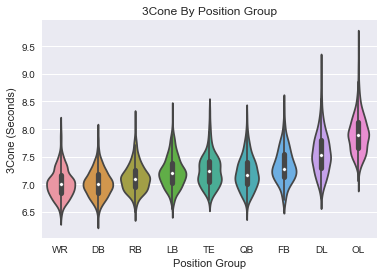

In [22]:
#Create a violinplot for 3Cone, grouped by position
Cone_df_pos = df_joined[['Pos', '3Cone']].dropna()

sns.set()
_ = sns.violinplot('Pos', '3Cone', data = Cone_df_pos, order = ['WR', 'DB', 'RB', 'LB', 'TE', 'QB', 'FB', 'DL', 'OL'])
_ = plt.xlabel('Position Group')
_ = plt.ylabel('3Cone (Seconds)')
_ = plt.title('3Cone By Position Group')
_ = plt.show()

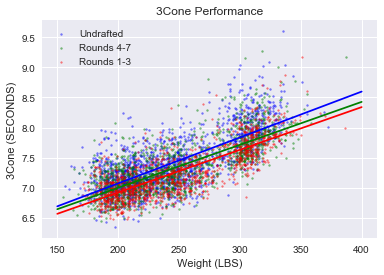

Regression for Undrafted: y=0.00763966305157x + 5.54251956634, R-Squared = 0.531317360952
Regression for Rounds 4-7: y=0.0071446762807x + 5.56915282945, R-Squared = 0.572192936004
Regression for Rounds 1-3: y=0.00710389494165x + 5.49842531016, R-Squared = 0.612567208368


In [23]:
#Create a scatterplot of 3Cone against weight, split by Round dimension (Undrafted, Rounds 4-7, Rounds 1-3)

Cone_13 = df_joined[['Weight', '3Cone', 'Rnd']].dropna()
Cone_13 = Cone_13[Cone_13['Rnd'] == '1-3']

Cone_47 = df_joined[['Weight', '3Cone', 'Rnd']].dropna()
Cone_47 = Cone_47[Cone_47['Rnd'] == '4-7']

Cone_Undrafted = df_joined[['Weight', '3Cone', 'Rnd']].dropna()
Cone_Undrafted = Cone_Undrafted[Cone_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,400])
m_Cone_Undrafted, b_Cone_Undrafted = np.polyfit(Cone_Undrafted['Weight'], Cone_Undrafted['3Cone'], deg=1)
m_Cone_47, b_Cone_47 = np.polyfit(Cone_47['Weight'], Cone_47['3Cone'], deg=1)
m_Cone_13, b_Cone_13 = np.polyfit(Cone_13['Weight'], Cone_13['3Cone'], deg=1)


#calculate R squared of each group
Cone_rsquared_Undrafted = rsquared(Cone_Undrafted['Weight'], Cone_Undrafted['3Cone'])
Cone_rsquared_47 = rsquared(Cone_47['Weight'], Cone_47['3Cone'])
Cone_rsquared_13 = rsquared(Cone_13['Weight'], Cone_13['3Cone'])


#plotting regression lines
_ = plt.plot(x, m_Cone_Undrafted*x + b_Cone_Undrafted, color = 'blue')
_ = plt.plot(x, m_Cone_47*x + b_Cone_47, color = 'green')
_ = plt.plot(x, m_Cone_13*x + b_Cone_13, color = 'red')

#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', '3Cone', data = Cone_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '3Cone', data = Cone_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '3Cone', data = Cone_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('3Cone (SECONDS)')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])
plt.title('3Cone Performance')
plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_Cone_Undrafted) + 'x + ' + str(b_Cone_Undrafted)  + ', R-Squared = ' + str(Cone_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_Cone_47) + 'x + ' + str(b_Cone_47) + ', R-Squared = ' + str(Cone_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_Cone_13) + 'x + ' + str(b_Cone_13) + ', R-Squared = ' + str(Cone_rsquared_13))

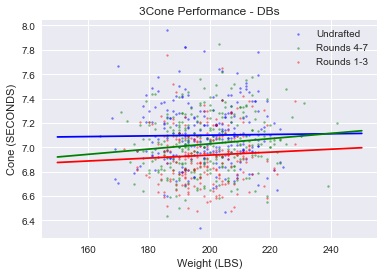

Regression for Undrafted: y=0.000289807608276x + 7.04172495481, R-Squared = 0.000204692346975
Regression for Rounds 4-7: y=0.00215312714742x + 6.59768299167, R-Squared = 0.0131370079856
Regression for Rounds 1-3: y=0.00121274268723x + 6.69345030131, R-Squared = 0.00321783596204
Mean Value for Undrafted: 7.0986656616
Mean Value for Rounds 4-7: 7.0207242718
Mean Value for Rounds 1-3: 6.93172708839
Mean Weight: 196.47761194029852 LBS


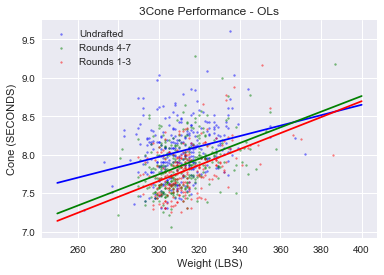

Regression for Undrafted: y=0.00677068817586x + 5.93992488316, R-Squared = 0.0731274311688
Regression for Rounds 4-7: y=0.0101801175816x + 4.68983066519, R-Squared = 0.170278388834
Regression for Rounds 1-3: y=0.0103745878172x + 4.54482570818, R-Squared = 0.213342099046
Mean Value for Undrafted: 8.01129177304
Mean Value for Rounds 4-7: 7.80424945777
Mean Value for Rounds 1-3: 7.71873907452
Mean Weight: 305.93151479976785 LBS


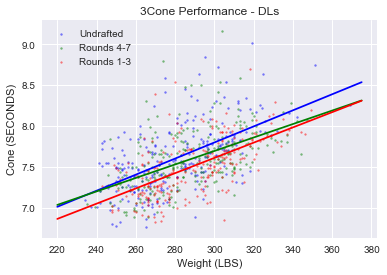

Regression for Undrafted: y=0.0098390977135x + 4.8451870337, R-Squared = 0.333434860165
Regression for Rounds 4-7: y=0.00824745686015x + 5.21857356691, R-Squared = 0.267828043227
Regression for Rounds 1-3: y=0.00933396738897x + 4.80791135031, R-Squared = 0.372429200889
Mean Value for Undrafted: 7.6193186844
Mean Value for Rounds 4-7: 7.54394239439
Mean Value for Rounds 1-3: 7.4396216061
Mean Weight: 281.94980184940556 LBS


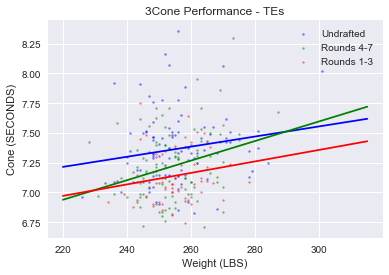

Regression for Undrafted: y=0.00425512597093x + 6.27884715978, R-Squared = 0.0296733251811
Regression for Rounds 4-7: y=0.00823435296979x + 5.12710374601, R-Squared = 0.0827228346238
Regression for Rounds 1-3: y=0.00483487589398x + 5.90741480858, R-Squared = 0.033512866379
Mean Value for Undrafted: 7.35049620313
Mean Value for Rounds 4-7: 7.20091696401
Mean Value for Rounds 1-3: 7.12507326615
Mean Weight: 251.84895833333334 LBS


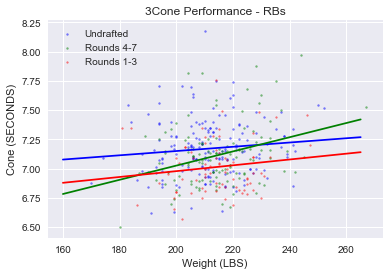

Regression for Undrafted: y=0.00182360395001x + 6.78481777268, R-Squared = 0.0112261182615
Regression for Rounds 4-7: y=0.00607405035227x + 5.81025200769, R-Squared = 0.0988710304704
Regression for Rounds 1-3: y=0.00249413260317x + 6.47872650819, R-Squared = 0.0183798931729
Mean Value for Undrafted: 7.16938016653
Mean Value for Rounds 4-7: 7.09115038686
Mean Value for Rounds 1-3: 7.00469027595
Mean Weight: 210.8804347826087 LBS


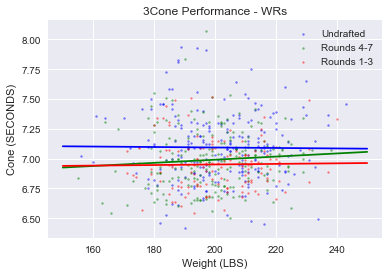

Regression for Undrafted: y=-0.000199956962214x + 7.13344499962, R-Squared = 0.000118759448625
Regression for Rounds 4-7: y=0.00131336959114x + 6.72821268779, R-Squared = 0.00606812488026
Regression for Rounds 1-3: y=0.000238586032452x + 6.90331891937, R-Squared = 0.000266365262386
Mean Value for Undrafted: 7.09434259071
Mean Value for Rounds 4-7: 6.98504752986
Mean Value for Rounds 1-3: 6.94997540234
Mean Weight: 195.55412566237698 LBS


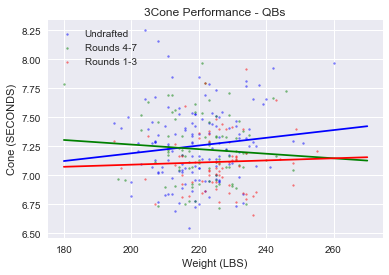

Regression for Undrafted: y=0.00333416523692x + 6.52407887409, R-Squared = 0.0140851747057
Regression for Rounds 4-7: y=-0.00197424614309x + 7.66111044153, R-Squared = 0.00605284203996
Regression for Rounds 1-3: y=0.000915651789245x + 6.90980051543, R-Squared = 0.00156653617435
Mean Value for Undrafted: 7.25153624318
Mean Value for Rounds 4-7: 7.23036397183
Mean Value for Rounds 1-3: 7.10957994874
Mean Weight: 218.18275862068967 LBS


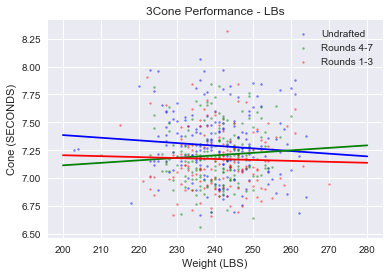

Regression for Undrafted: y=-0.0023865806378x + 7.86305304246, R-Squared = 0.00733546653468
Regression for Rounds 4-7: y=0.00224030059251x + 6.6663248326, R-Squared = 0.00482279809372
Regression for Rounds 1-3: y=-0.000848694556074x + 7.37477536422, R-Squared = 0.000828330455371


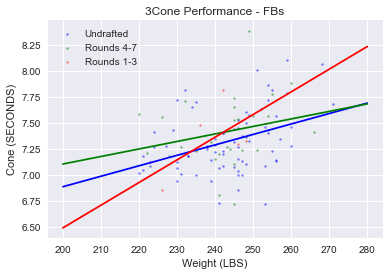

Regression for Undrafted: y=0.0100421130382x + 4.87668751189, R-Squared = 0.150795357502
Regression for Rounds 4-7: y=0.00722042524854x + 5.65897469438, R-Squared = 0.0544552952669
Regression for Rounds 1-3: y=0.0217766497462x + 2.13431472081, R-Squared = 0.310191175931
Mean Value for Undrafted: 7.2708001465
Mean Value for Rounds 4-7: 7.38037647995
Mean Value for Rounds 1-3: 7.32602607663
Mean Weight: 238.40725806451613 LBS


In [24]:
#Scatterplot for DB Group - Cone
Cone_db_weight_13 = df_DB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_db_weight_13 = Cone_db_weight_13[Cone_db_weight_13['Rnd'] == '1-3']

Cone_db_weight_47 = df_DB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_db_weight_47 = Cone_db_weight_47[Cone_db_weight_47['Rnd'] == '4-7']

Cone_db_weight_Undrafted = df_DB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_db_weight_Undrafted = Cone_db_weight_Undrafted[Cone_db_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,250])
m_db_Undrafted, b_db_Undrafted = np.polyfit(Cone_db_weight_Undrafted['Weight'], Cone_db_weight_Undrafted['3Cone'], deg=1)
m_db_47, b_db_47 = np.polyfit(Cone_db_weight_47['Weight'], Cone_db_weight_47['3Cone'], deg=1)
m_db_13, b_db_13 = np.polyfit(Cone_db_weight_13['Weight'], Cone_db_weight_13['3Cone'], deg=1)

Cone_db_rsquared_Undrafted = rsquared(Cone_db_weight_Undrafted['Weight'], Cone_db_weight_Undrafted['3Cone'])
Cone_db_rsquared_47 = rsquared(Cone_db_weight_47['Weight'], Cone_db_weight_47['3Cone'])
Cone_db_rsquared_13 = rsquared(Cone_db_weight_13['Weight'], Cone_db_weight_13['3Cone'])


#plotting regression lines
_ = plt.plot(x, m_db_Undrafted*x + b_db_Undrafted, color = 'blue')
_ = plt.plot(x, m_db_47*x + b_db_47, color = 'green')
_ = plt.plot(x, m_db_13*x + b_db_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', '3Cone', data = Cone_db_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '3Cone', data = Cone_db_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '3Cone', data = Cone_db_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Cone (SECONDS)')
_ = plt.title('3Cone Performance - DBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_db_Undrafted) + 'x + ' + str(b_db_Undrafted) + ', R-Squared = ' + str(Cone_db_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_db_47) + 'x + ' + str(b_db_47) + ', R-Squared = ' + str(Cone_db_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_db_13) + 'x + ' + str(b_db_13) + ', R-Squared = ' + str(Cone_db_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_db_Undrafted*mean_weight_DB+b_db_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_db_47*mean_weight_DB+b_db_47))
print('Mean Value for Rounds 1-3: ' + str(m_db_13*mean_weight_DB+b_db_13))
print('Mean Weight: ' + str(mean_weight_DB) + ' LBS')

#Scatterplot for OL Group
Cone_OL_weight_13 = df_OL[['Weight', '3Cone', 'Rnd']].dropna()
Cone_OL_weight_13 = Cone_OL_weight_13[Cone_OL_weight_13['Rnd'] == '1-3']

Cone_OL_weight_47 = df_OL[['Weight', '3Cone', 'Rnd']].dropna()
Cone_OL_weight_47 = Cone_OL_weight_47[Cone_OL_weight_47['Rnd'] == '4-7']

Cone_OL_weight_Undrafted = df_OL[['Weight', '3Cone', 'Rnd']].dropna()
Cone_OL_weight_Undrafted = Cone_OL_weight_Undrafted[Cone_OL_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([250,400])
m_OL_Undrafted, b_OL_Undrafted = np.polyfit(Cone_OL_weight_Undrafted['Weight'], Cone_OL_weight_Undrafted['3Cone'], deg=1)
m_OL_47, b_OL_47 = np.polyfit(Cone_OL_weight_47['Weight'], Cone_OL_weight_47['3Cone'], deg=1)
m_OL_13, b_OL_13 = np.polyfit(Cone_OL_weight_13['Weight'], Cone_OL_weight_13['3Cone'], deg=1)

Cone_OL_rsquared_Undrafted = rsquared(Cone_OL_weight_Undrafted['Weight'], Cone_OL_weight_Undrafted['3Cone'])
Cone_OL_rsquared_47 = rsquared(Cone_OL_weight_47['Weight'], Cone_OL_weight_47['3Cone'])
Cone_OL_rsquared_13 = rsquared(Cone_OL_weight_13['Weight'], Cone_OL_weight_13['3Cone'])


#plotting regression lines
_ = plt.plot(x, m_OL_Undrafted*x + b_OL_Undrafted, color = 'blue')
_ = plt.plot(x, m_OL_47*x + b_OL_47, color = 'green')
_ = plt.plot(x, m_OL_13*x + b_OL_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', '3Cone', data = Cone_OL_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '3Cone', data = Cone_OL_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '3Cone', data = Cone_OL_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Cone (SECONDS)')
_ = plt.title('3Cone Performance - OLs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_OL_Undrafted) + 'x + ' + str(b_OL_Undrafted) + ', R-Squared = ' + str(Cone_OL_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_OL_47) + 'x + ' + str(b_OL_47) + ', R-Squared = ' + str(Cone_OL_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_OL_13) + 'x + ' + str(b_OL_13) + ', R-Squared = ' + str(Cone_OL_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_OL_Undrafted*mean_weight_OL+b_OL_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_OL_47*mean_weight_OL+b_OL_47))
print('Mean Value for Rounds 1-3: ' + str(m_OL_13*mean_weight_OL+b_OL_13))
print('Mean Weight: ' + str(mean_weight_OL) + ' LBS')

#scatterplot for Cone for DL Group
Cone_DL_weight_13 = df_DL[['Weight', '3Cone', 'Rnd']].dropna()
Cone_DL_weight_13 = Cone_DL_weight_13[Cone_DL_weight_13['Rnd'] == '1-3']

Cone_DL_weight_47 = df_DL[['Weight', '3Cone', 'Rnd']].dropna()
Cone_DL_weight_47 = Cone_DL_weight_47[Cone_DL_weight_47['Rnd'] == '4-7']

Cone_DL_weight_Undrafted = df_DL[['Weight', '3Cone', 'Rnd']].dropna()
Cone_DL_weight_Undrafted = Cone_DL_weight_Undrafted[Cone_DL_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([220,375])
m_DL_Undrafted, b_DL_Undrafted = np.polyfit(Cone_DL_weight_Undrafted['Weight'], Cone_DL_weight_Undrafted['3Cone'], deg=1)
m_DL_47, b_DL_47 = np.polyfit(Cone_DL_weight_47['Weight'], Cone_DL_weight_47['3Cone'], deg=1)
m_DL_13, b_DL_13 = np.polyfit(Cone_DL_weight_13['Weight'], Cone_DL_weight_13['3Cone'], deg=1)

Cone_DL_rsquared_Undrafted = rsquared(Cone_DL_weight_Undrafted['Weight'], Cone_DL_weight_Undrafted['3Cone'])
Cone_DL_rsquared_47 = rsquared(Cone_DL_weight_47['Weight'], Cone_DL_weight_47['3Cone'])
Cone_DL_rsquared_13 = rsquared(Cone_DL_weight_13['Weight'], Cone_DL_weight_13['3Cone'])


#plotting regression lines
_ = plt.plot(x, m_DL_Undrafted*x + b_DL_Undrafted, color = 'blue')
_ = plt.plot(x, m_DL_47*x + b_DL_47, color = 'green')
_ = plt.plot(x, m_DL_13*x + b_DL_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', '3Cone', data = Cone_DL_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '3Cone', data = Cone_DL_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '3Cone', data = Cone_DL_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Cone (SECONDS)')
_ = plt.title('3Cone Performance - DLs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_DL_Undrafted) + 'x + ' + str(b_DL_Undrafted) + ', R-Squared = ' + str(Cone_DL_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_DL_47) + 'x + ' + str(b_DL_47) + ', R-Squared = ' + str(Cone_DL_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_DL_13) + 'x + ' + str(b_DL_13) + ', R-Squared = ' + str(Cone_DL_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_DL_Undrafted*mean_weight_DL+b_DL_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_DL_47*mean_weight_DL+b_DL_47))
print('Mean Value for Rounds 1-3: ' + str(m_DL_13*mean_weight_DL+b_DL_13))
print('Mean Weight: ' + str(mean_weight_DL) + ' LBS')

#scatterplot for Cone for TE Group
Cone_TE_weight_13 = df_TE[['Weight', '3Cone', 'Rnd']].dropna()
Cone_TE_weight_13 = Cone_TE_weight_13[Cone_TE_weight_13['Rnd'] == '1-3']

Cone_TE_weight_47 = df_TE[['Weight', '3Cone', 'Rnd']].dropna()
Cone_TE_weight_47 = Cone_TE_weight_47[Cone_TE_weight_47['Rnd'] == '4-7']

Cone_TE_weight_Undrafted = df_TE[['Weight', '3Cone', 'Rnd']].dropna()
Cone_TE_weight_Undrafted = Cone_TE_weight_Undrafted[Cone_TE_weight_Undrafted['Rnd'] == 'Undrafted']
Cone_TE_weight_Undrafted = Cone_TE_weight_Undrafted[Cone_TE_weight_Undrafted['Weight'] > 180]
Cone_TE_weight_Undrafted = Cone_TE_weight_Undrafted[Cone_TE_weight_Undrafted['Weight'] < 320]


#calculate regression lines for all 3 groups
x = np.array([220,315])
m_TE_Undrafted, b_TE_Undrafted = np. polyfit (Cone_TE_weight_Undrafted['Weight'], Cone_TE_weight_Undrafted['3Cone'], deg=1)
m_TE_47, b_TE_47 = np.polyfit(Cone_TE_weight_47['Weight'], Cone_TE_weight_47['3Cone'], deg=1)
m_TE_13, b_TE_13 = np. polyfit (Cone_TE_weight_13['Weight'], Cone_TE_weight_13['3Cone'], deg=1)

Cone_TE_rsquared_Undrafted = rsquared(Cone_TE_weight_Undrafted['Weight'], Cone_TE_weight_Undrafted['3Cone'])
Cone_TE_rsquared_47 = rsquared(Cone_TE_weight_47['Weight'], Cone_TE_weight_47['3Cone'])
Cone_TE_rsquared_13 = rsquared(Cone_TE_weight_13['Weight'], Cone_TE_weight_13['3Cone'])


#plotting regression lines
_ = plt.plot(x, m_TE_Undrafted*x + b_TE_Undrafted, color = 'blue')
_ = plt.plot(x, m_TE_47*x + b_TE_47, color = 'green')
_ = plt.plot(x, m_TE_13*x + b_TE_13, color = 'red')


#scatterplots in different colors for different round groups
blue = plt.scatter('Weight', '3Cone', data = Cone_TE_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '3Cone', data = Cone_TE_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '3Cone', data = Cone_TE_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Cone (SECONDS)')
_ = plt.title('3Cone Performance - TEs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_TE_Undrafted) + 'x + ' + str(b_TE_Undrafted) + ', R-Squared = ' + str(Cone_TE_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_TE_47) + 'x + ' + str(b_TE_47) + ', R-Squared = ' + str(Cone_TE_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_TE_13) + 'x + ' + str(b_TE_13) + ', R-Squared = ' + str(Cone_TE_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_TE_Undrafted*mean_weight_TE+b_TE_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_TE_47*mean_weight_TE+b_TE_47))
print('Mean Value for Rounds 1-3: ' + str(m_TE_13*mean_weight_TE+b_TE_13))
print('Mean Weight: ' + str(mean_weight_TE) + ' LBS')

#scatterplot for Cone for RB Group
Cone_RB_weight_13 = df_RB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_RB_weight_13 = Cone_RB_weight_13[Cone_RB_weight_13['Rnd'] == '1-3']

Cone_RB_weight_47 = df_RB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_RB_weight_47 = Cone_RB_weight_47[Cone_RB_weight_47['Rnd'] == '4-7']

Cone_RB_weight_Undrafted = df_RB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_RB_weight_Undrafted = Cone_RB_weight_Undrafted[Cone_RB_weight_Undrafted ['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([160,265])
m_RB_Undrafted, b_RB_Undrafted = np. polyfit (Cone_RB_weight_Undrafted ['Weight'], Cone_RB_weight_Undrafted ['3Cone'], deg=1)
m_RB_47, b_RB_47 = np.polyfit(Cone_RB_weight_47['Weight'], Cone_RB_weight_47['3Cone'], deg=1)
m_RB_13, b_RB_13 = np. polyfit (Cone_RB_weight_13['Weight'], Cone_RB_weight_13['3Cone'], deg=1)

Cone_RB_rsquared_Undrafted = rsquared(Cone_RB_weight_Undrafted['Weight'], Cone_RB_weight_Undrafted['3Cone'])
Cone_RB_rsquared_47 = rsquared(Cone_RB_weight_47['Weight'], Cone_RB_weight_47['3Cone'])
Cone_RB_rsquared_13 = rsquared(Cone_RB_weight_13['Weight'], Cone_RB_weight_13['3Cone'])


#plotting regression lines
_ = plt.plot(x, m_RB_Undrafted*x + b_RB_Undrafted, color = 'blue')
_ = plt.plot(x, m_RB_47*x + b_RB_47, color = 'green')
_ = plt.plot(x, m_RB_13*x + b_RB_13, color = 'red')


#scatRBrplots in different colors for different round groups
blue = plt.scatter('Weight', '3Cone', data = Cone_RB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '3Cone', data = Cone_RB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '3Cone', data = Cone_RB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Cone (SECONDS)')
_ = plt.title('3Cone Performance - RBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_RB_Undrafted) + 'x + ' + str(b_RB_Undrafted) + ', R-Squared = ' + str(Cone_RB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_RB_47) + 'x + ' + str(b_RB_47) + ', R-Squared = ' + str(Cone_RB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_RB_13) + 'x + ' + str(b_RB_13) + ', R-Squared = ' + str(Cone_RB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_RB_Undrafted*mean_weight_RB+b_RB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_RB_47*mean_weight_RB+b_RB_47))
print('Mean Value for Rounds 1-3: ' + str(m_RB_13*mean_weight_RB+b_RB_13))
print('Mean Weight: ' + str(mean_weight_RB) + ' LBS')

#scatterplot for Cone for WR Group
Cone_WR_weight_13 = df_WR[['Weight', '3Cone', 'Rnd']].dropna()
Cone_WR_weight_13 = Cone_WR_weight_13[Cone_WR_weight_13['Rnd'] == '1-3']

Cone_WR_weight_47 = df_WR[['Weight', '3Cone', 'Rnd']].dropna()
Cone_WR_weight_47 = Cone_WR_weight_47[Cone_WR_weight_47['Rnd'] == '4-7']

Cone_WR_weight_Undrafted = df_WR[['Weight', '3Cone', 'Rnd']].dropna()
Cone_WR_weight_Undrafted = Cone_WR_weight_Undrafted[Cone_WR_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([150,250])
m_WR_Undrafted, b_WR_Undrafted = np. polyfit (Cone_WR_weight_Undrafted ['Weight'], Cone_WR_weight_Undrafted ['3Cone'], deg=1)
m_WR_47, b_WR_47 = np.polyfit(Cone_WR_weight_47['Weight'], Cone_WR_weight_47['3Cone'], deg=1)
m_WR_13, b_WR_13 = np. polyfit (Cone_WR_weight_13['Weight'], Cone_WR_weight_13['3Cone'], deg=1)

Cone_WR_rsquared_Undrafted = rsquared(Cone_WR_weight_Undrafted['Weight'], Cone_WR_weight_Undrafted['3Cone'])
Cone_WR_rsquared_47 = rsquared(Cone_WR_weight_47['Weight'], Cone_WR_weight_47['3Cone'])
Cone_WR_rsquared_13 = rsquared(Cone_WR_weight_13['Weight'], Cone_WR_weight_13['3Cone'])


#plotting regression lines
_ = plt.plot(x, m_WR_Undrafted*x + b_WR_Undrafted, color = 'blue')
_ = plt.plot(x, m_WR_47*x + b_WR_47, color = 'green')
_ = plt.plot(x, m_WR_13*x + b_WR_13, color = 'red')


#scatWRrplots in different colors for different round groups
blue = plt.scatter('Weight', '3Cone', data = Cone_WR_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '3Cone', data = Cone_WR_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '3Cone', data = Cone_WR_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Cone (SECONDS)')
_ = plt.title('3Cone Performance - WRs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_WR_Undrafted) + 'x + ' + str(b_WR_Undrafted) + ', R-Squared = ' + str(Cone_WR_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_WR_47) + 'x + ' + str(b_WR_47) + ', R-Squared = ' + str(Cone_WR_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_WR_13) + 'x + ' + str(b_WR_13) + ', R-Squared = ' + str(Cone_WR_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_WR_Undrafted*mean_weight_WR+b_WR_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_WR_47*mean_weight_WR+b_WR_47))
print('Mean Value for Rounds 1-3: ' + str(m_WR_13*mean_weight_WR+b_WR_13))
print('Mean Weight: ' + str(mean_weight_WR) + ' LBS')

#scatterplot for Cone for QB Group
Cone_QB_weight_13 = df_QB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_QB_weight_13 = Cone_QB_weight_13[Cone_QB_weight_13['Rnd'] == '1-3']

Cone_QB_weight_47 = df_QB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_QB_weight_47 = Cone_QB_weight_47[Cone_QB_weight_47['Rnd'] == '4-7']

Cone_QB_weight_Undrafted = df_QB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_QB_weight_Undrafted = Cone_QB_weight_Undrafted[Cone_QB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([180,270])
m_QB_Undrafted, b_QB_Undrafted = np. polyfit (Cone_QB_weight_Undrafted ['Weight'], Cone_QB_weight_Undrafted ['3Cone'], deg=1)
m_QB_47, b_QB_47 = np.polyfit(Cone_QB_weight_47['Weight'], Cone_QB_weight_47['3Cone'], deg=1)
m_QB_13, b_QB_13 = np. polyfit (Cone_QB_weight_13['Weight'], Cone_QB_weight_13['3Cone'], deg=1)

Cone_QB_rsquared_Undrafted = rsquared(Cone_QB_weight_Undrafted['Weight'], Cone_QB_weight_Undrafted['3Cone'])
Cone_QB_rsquared_47 = rsquared(Cone_QB_weight_47['Weight'], Cone_QB_weight_47['3Cone'])
Cone_QB_rsquared_13 = rsquared(Cone_QB_weight_13['Weight'], Cone_QB_weight_13['3Cone'])


#plotting regression lines
_ = plt.plot(x, m_QB_Undrafted*x + b_QB_Undrafted, color = 'blue')
_ = plt.plot(x, m_QB_47*x + b_QB_47, color = 'green')
_ = plt.plot(x, m_QB_13*x + b_QB_13, color = 'red')


#scatQBrplots in different colors for different round groups
blue = plt.scatter('Weight', '3Cone', data = Cone_QB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '3Cone', data = Cone_QB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '3Cone', data = Cone_QB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Cone (SECONDS)')
_ = plt.title('3Cone Performance - QBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_QB_Undrafted) + 'x + ' + str(b_QB_Undrafted) + ', R-Squared = ' + str(Cone_QB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_QB_47) + 'x + ' + str(b_QB_47) + ', R-Squared = ' + str(Cone_QB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_QB_13) + 'x + ' + str(b_QB_13) + ', R-Squared = ' + str(Cone_QB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_QB_Undrafted*mean_weight_QB+b_QB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_QB_47*mean_weight_QB+b_QB_47))
print('Mean Value for Rounds 1-3: ' + str(m_QB_13*mean_weight_QB+b_QB_13))
print('Mean Weight: ' + str(mean_weight_QB) + ' LBS')

#scatterplot for Cone for LB Group
Cone_LB_weight_13 = df_LB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_LB_weight_13 = Cone_LB_weight_13[Cone_LB_weight_13['Rnd'] == '1-3']

Cone_LB_weight_47 = df_LB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_LB_weight_47 = Cone_LB_weight_47[Cone_LB_weight_47['Rnd'] == '4-7']

Cone_LB_weight_Undrafted = df_LB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_LB_weight_Undrafted = Cone_LB_weight_Undrafted[Cone_LB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([200,280])
m_LB_Undrafted, b_LB_Undrafted = np. polyfit (Cone_LB_weight_Undrafted ['Weight'], Cone_LB_weight_Undrafted ['3Cone'], deg=1)
m_LB_47, b_LB_47 = np.polyfit(Cone_LB_weight_47['Weight'], Cone_LB_weight_47['3Cone'], deg=1)
m_LB_13, b_LB_13 = np. polyfit (Cone_LB_weight_13['Weight'], Cone_LB_weight_13['3Cone'], deg=1)

Cone_LB_rsquared_Undrafted = rsquared(Cone_LB_weight_Undrafted['Weight'], Cone_LB_weight_Undrafted['3Cone'])
Cone_LB_rsquared_47 = rsquared(Cone_LB_weight_47['Weight'], Cone_LB_weight_47['3Cone'])
Cone_LB_rsquared_13 = rsquared(Cone_LB_weight_13['Weight'], Cone_LB_weight_13['3Cone'])


#plotting regression lines
_ = plt.plot(x, m_LB_Undrafted*x + b_LB_Undrafted, color = 'blue')
_ = plt.plot(x, m_LB_47*x + b_LB_47, color = 'green')
_ = plt.plot(x, m_LB_13*x + b_LB_13, color = 'red')


#scatLBrplots in different colors for different round groups
blue = plt.scatter('Weight', '3Cone', data = Cone_LB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '3Cone', data = Cone_LB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '3Cone', data = Cone_LB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Cone (SECONDS)')
_ = plt.title('3Cone Performance - LBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_LB_Undrafted) + 'x + ' + str(b_LB_Undrafted) + ', R-Squared = ' + str(Cone_LB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_LB_47) + 'x + ' + str(b_LB_47) + ', R-Squared = ' + str(Cone_LB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_LB_13) + 'x + ' + str(b_LB_13) + ', R-Squared = ' + str(Cone_LB_rsquared_13))

#scatterplot for Cone for FB Group
Cone_FB_weight_13 = df_FB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_FB_weight_13 = Cone_FB_weight_13[Cone_FB_weight_13['Rnd'] == '1-3']

Cone_FB_weight_47 = df_FB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_FB_weight_47 = Cone_FB_weight_47[Cone_FB_weight_47['Rnd'] == '4-7']

Cone_FB_weight_Undrafted = df_FB[['Weight', '3Cone', 'Rnd']].dropna()
Cone_FB_weight_Undrafted = Cone_FB_weight_Undrafted[Cone_FB_weight_Undrafted['Rnd'] == 'Undrafted']


#calculate regression lines for all 3 groups
x = np.array([200,280])
m_FB_Undrafted, b_FB_Undrafted = np. polyfit (Cone_FB_weight_Undrafted ['Weight'], Cone_FB_weight_Undrafted ['3Cone'], deg=1)
m_FB_47, b_FB_47 = np.polyfit(Cone_FB_weight_47['Weight'], Cone_FB_weight_47['3Cone'], deg=1)
m_FB_13, b_FB_13 = np. polyfit (Cone_FB_weight_13['Weight'], Cone_FB_weight_13['3Cone'], deg=1)

Cone_FB_rsquared_Undrafted = rsquared(Cone_FB_weight_Undrafted['Weight'], Cone_FB_weight_Undrafted['3Cone'])
Cone_FB_rsquared_47 = rsquared(Cone_FB_weight_47['Weight'], Cone_FB_weight_47['3Cone'])
Cone_FB_rsquared_13 = rsquared(Cone_FB_weight_13['Weight'], Cone_FB_weight_13['3Cone'])


#plotting regression lines
_ = plt.plot(x, m_FB_Undrafted*x + b_FB_Undrafted, color = 'blue')
_ = plt.plot(x, m_FB_47*x + b_FB_47, color = 'green')
_ = plt.plot(x, m_FB_13*x + b_FB_13, color = 'red')


#scatFBrplots in different colors for different round groups
blue = plt.scatter('Weight', '3Cone', data = Cone_FB_weight_Undrafted, color = 'b', marker='.', alpha = 0.5, s=15)
green = plt.scatter('Weight', '3Cone', data = Cone_FB_weight_47, color = 'g', marker='.', alpha = 0.5, s=15)
red = plt.scatter('Weight', '3Cone', data = Cone_FB_weight_13, color = 'r', marker='.', alpha = 0.5, s=13)
_ = plt.xlabel('Weight (LBS)')
_ = plt.ylabel('Cone (SECONDS)')
_ = plt.title('3Cone Performance - FBs')
plt.legend([blue, green, red], ['Undrafted', 'Rounds 4-7', 'Rounds 1-3'])

plt.show()

#print regression formulas
print('Regression for Undrafted: y=' + str(m_FB_Undrafted) + 'x + ' + str(b_FB_Undrafted) + ', R-Squared = ' + str(Cone_FB_rsquared_Undrafted))
print('Regression for Rounds 4-7: y=' + str(m_FB_47) + 'x + ' + str(b_FB_47) + ', R-Squared = ' + str(Cone_FB_rsquared_47))
print('Regression for Rounds 1-3: y=' + str(m_FB_13) + 'x + ' + str(b_FB_13) + ', R-Squared = ' + str(Cone_FB_rsquared_13))

#Print values based on mean weights for each position group for each draft group
print('Mean Value for Undrafted: ' + str(m_FB_Undrafted*mean_weight_FB+b_FB_Undrafted))
print('Mean Value for Rounds 4-7: ' + str(m_FB_47*mean_weight_FB+b_FB_47))
print('Mean Value for Rounds 1-3: ' + str(m_FB_13*mean_weight_FB+b_FB_13))
print('Mean Weight: ' + str(mean_weight_FB) + ' LBS')


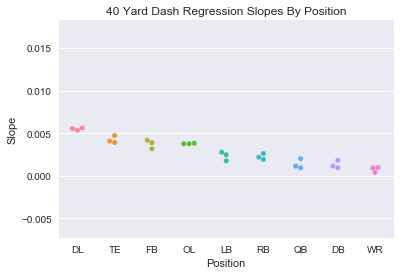

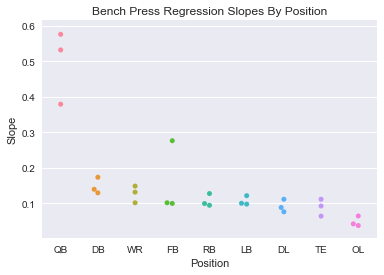

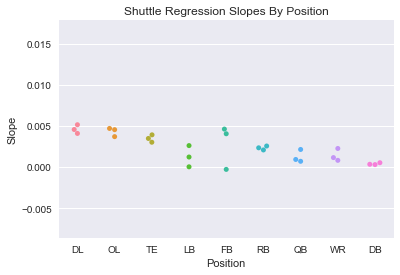

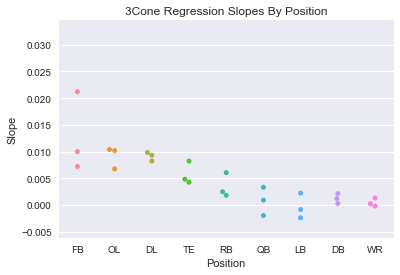

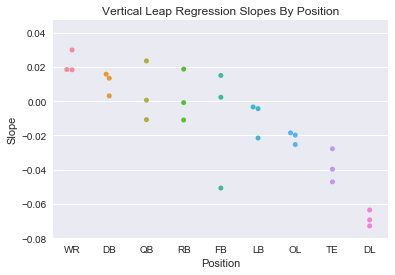

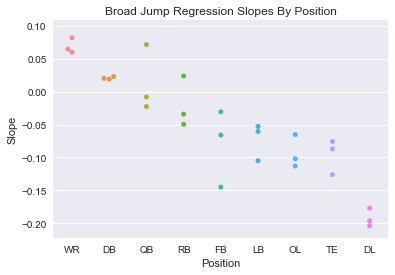

In [25]:
#Making swarmplots of regression slopes so we can see how they differ by position group

#import csv consisting of the following columns: Position, R_Squared, Drill, Rounds, Slope
EDA_df = pd.read_csv('R_Squared_Combine.csv')

r_squared_df = EDA_df[['Position', 'R_Squared', 'Drill']]


#Making swarmplots for exercises that should have a generally positive slope
slope_df = EDA_df[['Position', 'Drill', 'Slope', 'R_Squared']]
plt.title('40 Yard Dash Regression Slopes By Position')
positive_slope_df_40 = slope_df.loc[slope_df['Drill'].isin(['40 Yard Dash'])]
sns.swarmplot(x = 'Position', y = 'Slope', data = positive_slope_df_40, order = ['DL', 'TE', 'FB', 'OL', 'LB', 'RB', 'QB', 'DB', 'WR'])
plt.show()

positive_slope_df_Bench_Press = slope_df.loc[slope_df['Drill'].isin(['Bench Press'])]
plt.title('Bench Press Regression Slopes By Position')
sns.swarmplot(x = 'Position', y = 'Slope', data = positive_slope_df_Bench_Press, order = ['QB', 'DB', 'WR', 'FB', 'RB', 'LB', 'DL', 'TE', 'OL'])
plt.show()

positive_slope_df_Shuttle = slope_df.loc[slope_df['Drill'].isin(['Shuttle'])]
plt.title('Shuttle Regression Slopes By Position')
sns.swarmplot(x = 'Position', y = 'Slope', data = positive_slope_df_Shuttle, order = ['DL', 'OL', 'TE', 'LB', 'FB', 'RB', 'QB', 'WR', 'DB'])
plt.show()

positive_slope_df_3Cone = slope_df.loc[slope_df['Drill'].isin(['3Cone'])]
plt.title('3Cone Regression Slopes By Position')
sns.swarmplot(x = 'Position', y = 'Slope', data = positive_slope_df_3Cone, order = ['FB', 'OL', 'DL', 'TE', 'RB', 'QB', 'LB', 'DB', 'WR'])
plt.show()



#These plots should generally have negative slopes
negative_slope_df_Vertical_Leap = slope_df.loc[slope_df['Drill'].isin(['Vertical Leap'])]
plt.title('Vertical Leap Regression Slopes By Position')
sns.swarmplot(x = 'Position', y = 'Slope', data = negative_slope_df_Vertical_Leap, order = ['WR', 'DB', 'QB', 'RB', 'FB', 'LB', 'OL', 'TE', 'DL'])
plt.show()

negative_slope_df_Broad_Jump = slope_df.loc[slope_df['Drill'].isin(['Broad Jump'])]
plt.title('Broad Jump Regression Slopes By Position')
sns.swarmplot(x = 'Position', y = 'Slope', data = negative_slope_df_Broad_Jump, order = ['WR', 'DB', 'QB', 'RB', 'FB', 'LB', 'OL', 'TE', 'DL'])
plt.show()

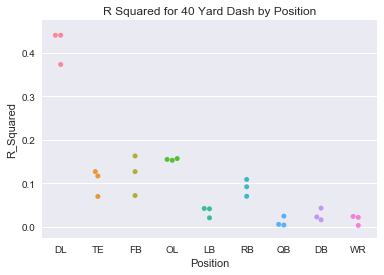

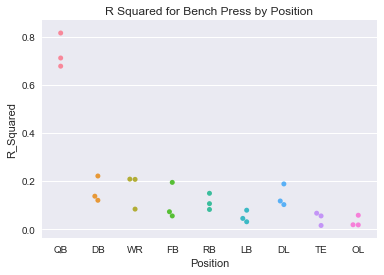

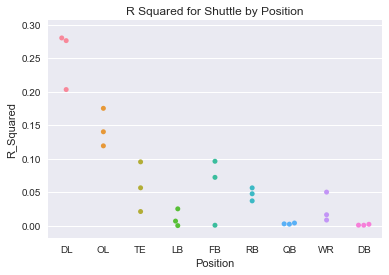

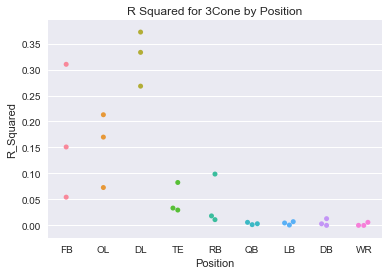

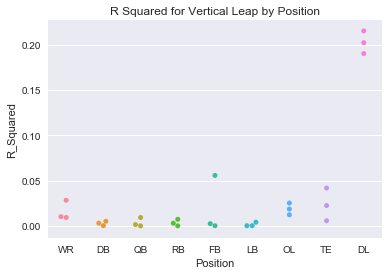

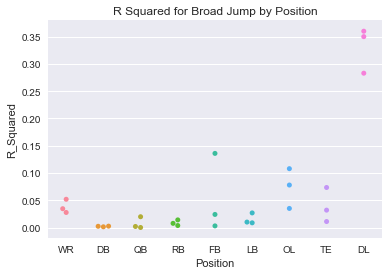

In [26]:
#Swarmplots of R-squared for each drill, grouped by position

sns.swarmplot(x = 'Position', y = 'R_Squared', data = positive_slope_df_40, order = ['DL', 'TE', 'FB', 'OL', 'LB', 'RB', 'QB', 'DB', 'WR'])
plt.title('R Squared for 40 Yard Dash by Position')
plt.show()

sns.swarmplot(x = 'Position', y = 'R_Squared', data = positive_slope_df_Bench_Press, order = ['QB', 'DB', 'WR', 'FB', 'RB', 'LB', 'DL', 'TE', 'OL'])
plt.title('R Squared for Bench Press by Position')
plt.show()

sns.swarmplot(x = 'Position', y = 'R_Squared', data = positive_slope_df_Shuttle, order = ['DL', 'OL', 'TE', 'LB', 'FB', 'RB', 'QB', 'WR', 'DB'])
plt.title('R Squared for Shuttle by Position')
plt.show()

sns.swarmplot(x = 'Position', y = 'R_Squared', data = positive_slope_df_3Cone, order = ['FB', 'OL', 'DL', 'TE', 'RB', 'QB', 'LB', 'DB', 'WR'])
plt.title('R Squared for 3Cone by Position')
plt.show()

sns.swarmplot(x = 'Position', y = 'R_Squared', data = negative_slope_df_Vertical_Leap, order = ['WR', 'DB', 'QB', 'RB', 'FB', 'LB', 'OL', 'TE', 'DL'])
plt.title('R Squared for Vertical Leap by Position')
plt.show()

sns.swarmplot(x = 'Position', y = 'R_Squared', data = negative_slope_df_Broad_Jump, order = ['WR', 'DB', 'QB', 'RB', 'FB', 'LB', 'OL', 'TE', 'DL'])
plt.title('R Squared for Broad Jump by Position')
plt.show()

In [27]:
print(df_OL.head())

          Rnd Pos  Height  Weight  Wonderlic  40_Yard  Bench_Press  Vert_Leap  \
1         4-7  OL   77.63     304        NaN     5.23         23.0       29.5   
10        1-3  OL   78.38     302        NaN     5.15         24.0       31.0   
17  Undrafted  OL   75.00     318        NaN     5.35         24.0       20.0   
19  Undrafted  OL   76.25     295        NaN     4.81         34.0        NaN   
21  Undrafted  OL   78.25     329        NaN     5.04         25.0       28.0   

    Broad_Jump  Shuttle  3Cone  
1         96.0     4.94   8.02  
10       108.0     4.94   7.98  
17        91.0     5.00   8.08  
19         NaN     4.73    NaN  
21       102.0     4.90   7.85  


In [28]:
#turning each of the round groups into 0, 1, or 2 so we can build machine learning model on data for each position group

def multiclassifier(i):
    if i == '1-3':
        return 2
    elif i == '4-7':
        return 1
    else:
        return 0
    
df_OL.Rnd = df_OL.Rnd.apply(multiclassifier)


print(df_OL.head())

    Rnd Pos  Height  Weight  Wonderlic  40_Yard  Bench_Press  Vert_Leap  \
1     1  OL   77.63     304        NaN     5.23         23.0       29.5   
10    2  OL   78.38     302        NaN     5.15         24.0       31.0   
17    0  OL   75.00     318        NaN     5.35         24.0       20.0   
19    0  OL   76.25     295        NaN     4.81         34.0        NaN   
21    0  OL   78.25     329        NaN     5.04         25.0       28.0   

    Broad_Jump  Shuttle  3Cone  
1         96.0     4.94   8.02  
10       108.0     4.94   7.98  
17        91.0     5.00   8.08  
19         NaN     4.73    NaN  
21       102.0     4.90   7.85  


/Users/paul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [29]:
df_DB.Rnd = df_DB.Rnd.apply(multiclassifier)
df_DL.Rnd = df_DL.Rnd.apply(multiclassifier)
df_LB.Rnd = df_LB.Rnd.apply(multiclassifier)
df_RB.Rnd = df_RB.Rnd.apply(multiclassifier)
df_TE.Rnd = df_TE.Rnd.apply(multiclassifier)
df_WR.Rnd = df_WR.Rnd.apply(multiclassifier)

/Users/paul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [30]:
#Logistic Regression on OL

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Value to input for C
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'C':Cs}

df_OL = df_OL[['Rnd', 'Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']].dropna()

# Split the data into a training and test set, then run gridsearch
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_OL[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_OL.Rnd.values, random_state=5, test_size = 0.2)
grid_search_model = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search_model.fit(Xlr, ylr)

print('Test score - OL: ' + str(grid_search_model.score(Xtestlr, ytestlr)))
print('Top parameters - OL: ' + str(grid_search_model.best_params_))
print('Top CV score - OL: ' + str(grid_search_model.best_score_))


Test score - OL: 0.474358974359
Top parameters - OL: {'C': 1000}
Top CV score - OL: 0.511229946524


In [31]:
# Rest of position groups - Logistic Regression
df_DB = df_DB[['Rnd', 'Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']].dropna()

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_DB[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_DB.Rnd.values, random_state=5, test_size = 0.2)
grid_search_model = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search_model.fit(Xlr, ylr)

print('Test score - DB: ' + str(grid_search_model.score(Xtestlr, ytestlr)))
print('Top parameters - DB: ' + str(grid_search_model.best_params_))
print('Top CV score - DB: ' + str(grid_search_model.best_score_))


df_DL = df_DL[['Rnd', 'Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']].dropna()

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_DL[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_DL.Rnd.values, random_state=5, test_size = 0.2)
grid_search_model = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search_model.fit(Xlr, ylr)

print('Test score - DL: ' + str(grid_search_model.score(Xtestlr, ytestlr)))
print('Top parameters - DL: ' + str(grid_search_model.best_params_))
print('Top CV score - DL: ' + str(grid_search_model.best_score_))


df_LB = df_LB[['Rnd', 'Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']].dropna()

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_LB[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_LB.Rnd.values, random_state=5, test_size = 0.2)
grid_search_model = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search_model.fit(Xlr, ylr)

print('Test score - LB: ' + str(grid_search_model.score(Xtestlr, ytestlr)))
print('Top parameters - LB: ' + str(grid_search_model.best_params_))
print('Top CV score - LB: ' + str(grid_search_model.best_score_))


df_RB = df_RB[['Rnd', 'Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']].dropna()

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_RB[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_RB.Rnd.values, random_state=5, test_size = 0.2)
grid_search_model = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search_model.fit(Xlr, ylr)

print('Test score - RB: ' + str(grid_search_model.score(Xtestlr, ytestlr)))
print('Top parameters - RB: ' + str(grid_search_model.best_params_))
print('Top CV score - RB: ' + str(grid_search_model.best_score_))

df_TE = df_TE[['Rnd', 'Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']].dropna()

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_TE[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_TE.Rnd.values, random_state=5, test_size = 0.2)
grid_search_model = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search_model.fit(Xlr, ylr)

print('Test score - TE: ' + str(grid_search_model.score(Xtestlr, ytestlr)))
print('Top parameters - TE: ' + str(grid_search_model.best_params_))
print('Top CV score - TE: ' + str(grid_search_model.best_score_))

df_WR = df_WR[['Rnd', 'Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']].dropna()

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_WR[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_WR.Rnd.values, random_state=5, test_size = 0.2)
grid_search_model = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search_model.fit(Xlr, ylr)

print('Test score - WR: ' + str(grid_search_model.score(Xtestlr, ytestlr)))
print('Top parameters - WR: ' + str(grid_search_model.best_params_))
print('Top CV score - WR: ' + str(grid_search_model.best_score_))

Test score - DB: 0.521739130435
Top parameters - DB: {'C': 1000}
Top CV score - DB: 0.527292576419
Test score - DL: 0.46568627451
Top parameters - DL: {'C': 1000}
Top CV score - DL: 0.498159509202
Test score - LB: 0.522292993631
Top parameters - LB: {'C': 1}
Top CV score - LB: 0.493610223642
Test score - RB: 0.639344262295
Top parameters - RB: {'C': 100}
Top CV score - RB: 0.537190082645
Test score - TE: 0.512820512821
Top parameters - TE: {'C': 10}
Top CV score - TE: 0.516233766234
Test score - WR: 0.540540540541
Top parameters - WR: {'C': 1000}
Top CV score - WR: 0.503378378378


In [43]:
#Linear Discriminant Analysis as a prediction model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Split the data into a training and test set, then run gridsearch
X, Xtest, y, ytest = train_test_split(df_OL[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_OL.Rnd.values, random_state=5, test_size = 0.2)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print('Test score - OL: ' + str(clf.score(Xtest, ytest)))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_DB[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_DB.Rnd.values, random_state=5, test_size = 0.2)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print('Test score - DB: ' + str(clf.score(Xtest, ytest)))



# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_DL[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_DL.Rnd.values, random_state=5, test_size = 0.2)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print('Test score - DL: ' + str(clf.score(Xtest, ytest)))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_LB[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_LB.Rnd.values, random_state=5, test_size = 0.2)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print('Test score - LB: ' + str(clf.score(Xtest, ytest)))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_RB[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_RB.Rnd.values, random_state=5, test_size = 0.2)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print('Test score - RB: ' + str(clf.score(Xtest, ytest)))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_TE[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_TE.Rnd.values, random_state=5, test_size = 0.2)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print('Test score - TE: ' + str(clf.score(Xtest, ytest)))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_WR[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_WR.Rnd.values, random_state=5, test_size = 0.2)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print('Test score - WR: ' + str(clf.score(Xtest, ytest)))


Test score - OL: 0.470085470085
Test score - DB: 0.54347826087
Test score - DL: 0.460784313725
Test score - LB: 0.522292993631
Test score - RB: 0.614754098361
Test score - TE: 0.538461538462
Test score - WR: 0.567567567568


In [39]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Split the data into a training and test set, then run gridsearch
X, Xtest, y, ytest = train_test_split(df_OL[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_OL.Rnd.values, random_state=5, test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(X, y)

print('Test score - OL: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - OL: ' + str(clf.feature_importances_))

# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_DB[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_DB.Rnd.values, random_state=5, test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(X, y)

print('Test score - DB: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - DB: ' + str(clf.feature_importances_))



# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_DL[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_DL.Rnd.values, random_state=5, test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(X, y)

print('Test score - DL: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - DL: ' + str(clf.feature_importances_))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_LB[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_LB.Rnd.values, random_state=5, test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(X, y)

print('Test score - LB: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - LB: ' + str(clf.feature_importances_))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_RB[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_RB.Rnd.values, random_state=5, test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(X, y)

print('Test score - RB: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - RB: ' + str(clf.feature_importances_))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_TE[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_TE.Rnd.values, random_state=5, test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(X, y)

print('Test score - TE: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - TE: ' + str(clf.feature_importances_))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_WR[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_WR.Rnd.values, random_state=5, test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(X, y)

print('Test score - WR: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - WR: ' + str(clf.feature_importances_))




Test score - OL: 0.487179487179
Feature Importances - OL: [ 0.18252019  0.20583745  0.19202931  0.13365147  0.15073319  0.13522838]
Test score - DB: 0.521739130435
Feature Importances - DB: [ 0.16390102  0.16428531  0.22784618  0.1411898   0.14564554  0.15713215]
Test score - DL: 0.416666666667
Feature Importances - DL: [ 0.17046458  0.19935081  0.19616604  0.13219398  0.15923326  0.14259133]
Test score - LB: 0.414012738854
Feature Importances - LB: [ 0.17370381  0.15680153  0.21044024  0.14743362  0.14884769  0.16277311]
Test score - RB: 0.508196721311
Feature Importances - RB: [ 0.17470559  0.1572157   0.22302232  0.14245908  0.15680747  0.14578983]
Test score - TE: 0.448717948718
Feature Importances - TE: [ 0.17335568  0.17607386  0.1870901   0.1343632   0.15998511  0.16913205]
Test score - WR: 0.527027027027
Feature Importances - WR: [ 0.15985875  0.17082047  0.24977055  0.13072511  0.14738594  0.14143917]


In [36]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into a training and test set, then run gridsearch
X, Xtest, y, ytest = train_test_split(df_OL[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_OL.Rnd.values, random_state=5, test_size = 0.2)
clf = GradientBoostingClassifier()
clf.fit(X, y)

print('Test score - OL: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - OL: ' + str(clf.feature_importances_))

# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_DB[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_DB.Rnd.values, random_state=5, test_size = 0.2)
clf = GradientBoostingClassifier()
clf.fit(X, y)

print('Test score - DB: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - DB: ' + str(clf.feature_importances_))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_DL[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_DL.Rnd.values, random_state=5, test_size = 0.2)
clf = GradientBoostingClassifier()
clf.fit(X, y)

print('Test score - DL: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - DL: ' + str(clf.feature_importances_))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_LB[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_LB.Rnd.values, random_state=5, test_size = 0.2)
clf = GradientBoostingClassifier()
clf.fit(X, y)

print('Test score - LB: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - LB: ' + str(clf.feature_importances_))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_RB[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_RB.Rnd.values, random_state=5, test_size = 0.2)
clf = GradientBoostingClassifier()
clf.fit(X, y)

print('Test score - RB: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - RB: ' + str(clf.feature_importances_))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_TE[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_TE.Rnd.values, random_state=5, test_size = 0.2)
clf = GradientBoostingClassifier()
clf.fit(X, y)

print('Test score - TE: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - TE: ' + str(clf.feature_importances_))


# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_WR[['Height','Weight', '40_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump']], df_WR.Rnd.values, random_state=5, test_size = 0.2)
clf = GradientBoostingClassifier()
clf.fit(X, y)

print('Test score - WR: ' + str(clf.score(Xtest, ytest)))
print('Feature Importances - WR: ' + str(clf.feature_importances_))


Test score - OL: 0.482905982906
Feature Importances - OL: [ 0.20425082  0.1956558   0.17902352  0.14058483  0.13416795  0.14631708]
Test score - DB: 0.539130434783
Feature Importances - DB: [ 0.20905987  0.14736934  0.23727169  0.13155321  0.14919588  0.12555   ]
Test score - DL: 0.460784313725
Feature Importances - DL: [ 0.1597719   0.17937163  0.19246832  0.14541756  0.19754481  0.12542579]
Test score - LB: 0.490445859873
Feature Importances - LB: [ 0.18648328  0.17772902  0.2165213   0.14521722  0.15468484  0.11936433]
Test score - RB: 0.540983606557
Feature Importances - RB: [ 0.17371705  0.22116214  0.1815859   0.1274252   0.14885971  0.14725001]
Test score - TE: 0.512820512821
Feature Importances - TE: [ 0.17238479  0.16361454  0.230165    0.1217493   0.15662778  0.15545861]
Test score - WR: 0.472972972973
Feature Importances - WR: [ 0.2374431   0.19201765  0.22515238  0.1183426   0.12263815  0.10440612]


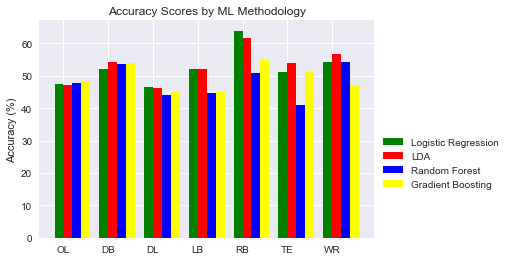

In [100]:
#Make barcharts to compare accuracies across various models

#Make lists of accuracy scores based on order stated in results

y_logistic_regression = [47.4, 52.2, 46.6, 52.2, 63.9, 51.3, 54.1]
y_lda = [47.0, 54.3, 46.1,52.2,61.5,53.8,56.8]
y_random_forest = [47.9, 53.5, 44.1, 44.6, 50.8, 41.0, 54.1]
y_gradient_boosting = [48.3, 53.9, 45.1, 45.1, 54.9, 51.3, 47.3]

ax = plt.subplot()

N=7
ind = np.arange(N)

p1 = ax.bar(ind, y_logistic_regression,width=0.2,color='green',align='center')
p2 = ax.bar(ind+0.2, y_lda,width=0.2,color='red',align='center')
p3 = ax.bar(ind+0.4, y_random_forest,width=0.2,color='blue',align='center')
p4 = ax.bar(ind+0.6, y_gradient_boosting,width=0.2,color='yellow',align='center')


ax.set_title('Accuracy Scores by ML Methodology')
ax.set_xticks(ind + 0.2 / 2)
ax.set_xticklabels(['OL', 'DB', 'DL', 'LB', 'RB', 'TE', 'WR'])
plt.ylabel('Accuracy (%)')
ax.legend((p1[0], p2[0], p3[0], p4[0]), ('Logistic Regression', 'LDA', 'Random Forest', 'Gradient Boosting'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()

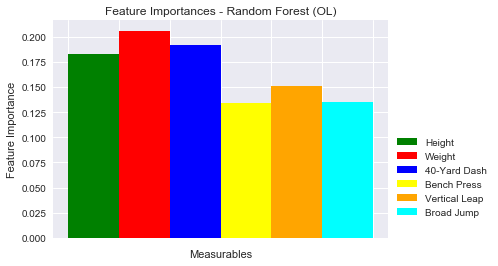

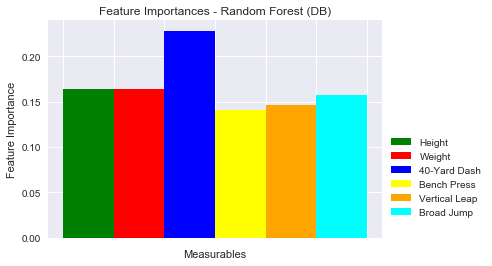

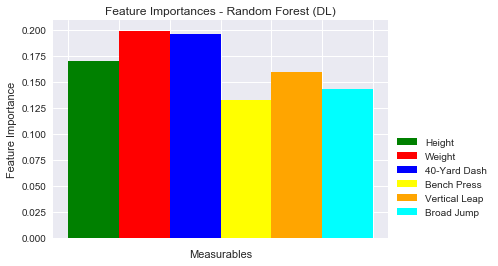

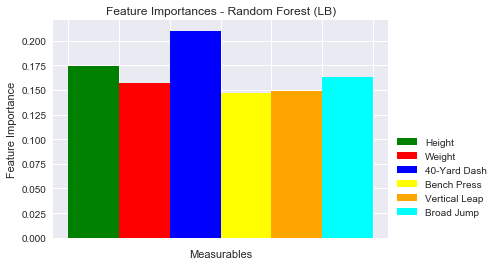

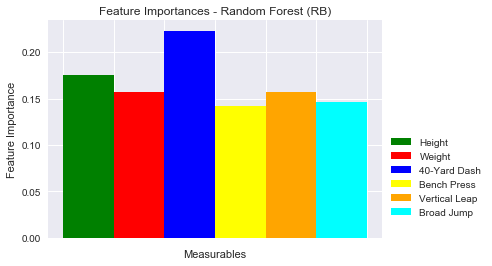

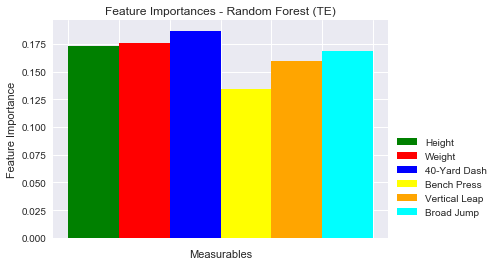

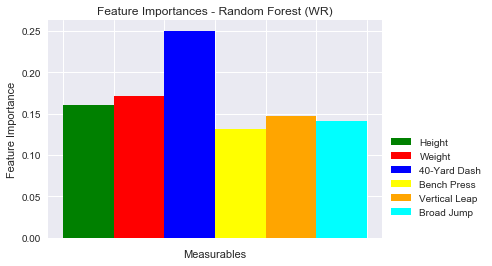

In [97]:
#Random Forest Feature Importances

#OL Feature Importances
FI_Height = [0.183]
FI_Weight = [0.206]
FI_40_Yard = [0.192]
FI_Bench_Press = [0.134]
FI_Vert_Leap = [0.151]
FI_Broad_Jump = [0.135]


ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Random Forest (OL)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()



#DB Feature Importances
FI_Height = [0.164]
FI_Weight = [0.164]
FI_40_Yard = [0.228]
FI_Bench_Press = [0.141]
FI_Vert_Leap = [0.146]
FI_Broad_Jump = [0.157]


ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Random Forest (DB)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()



#DL Feature Importances
FI_Height = [0.170]
FI_Weight = [0.199]
FI_40_Yard = [0.196]
FI_Bench_Press = [0.132]
FI_Vert_Leap = [0.159]
FI_Broad_Jump = [0.143]


ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Random Forest (DL)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()




#LB Feature Importances
FI_Height = [0.174]
FI_Weight = [0.157]
FI_40_Yard = [0.210]
FI_Bench_Press = [0.147]
FI_Vert_Leap = [0.149]
FI_Broad_Jump = [0.163]

ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Random Forest (LB)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()


#RB Feature Importances
FI_Height = [0.175]
FI_Weight = [0.157]
FI_40_Yard = [0.223]
FI_Bench_Press = [0.142]
FI_Vert_Leap = [0.157]
FI_Broad_Jump = [0.146]

ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Random Forest (RB)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()




#TE Feature Importances
FI_Height = [0.173]
FI_Weight = [0.176]
FI_40_Yard = [0.187]
FI_Bench_Press = [0.134]
FI_Vert_Leap = [0.160]
FI_Broad_Jump = [0.169]

ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Random Forest (TE)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()

#WR Feature Importances
FI_Height = [0.160]
FI_Weight = [0.171]
FI_40_Yard = [0.250]
FI_Bench_Press = [0.131]
FI_Vert_Leap = [0.147]
FI_Broad_Jump = [0.141]

ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Random Forest (WR)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()


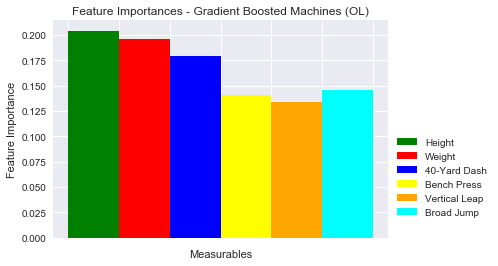

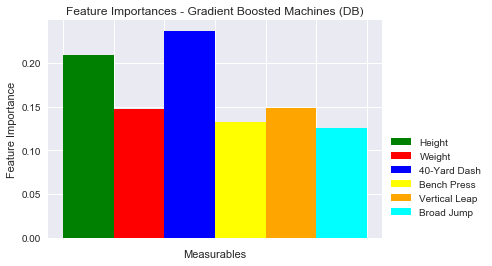

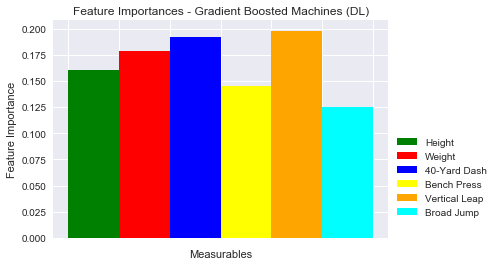

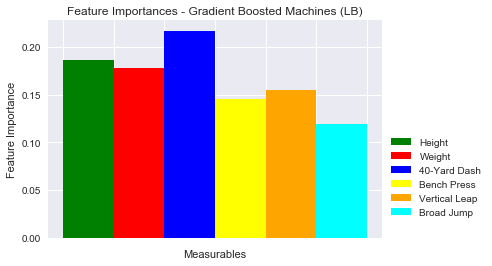

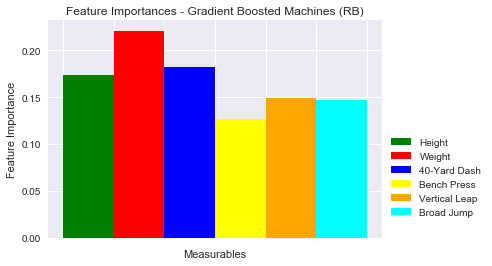

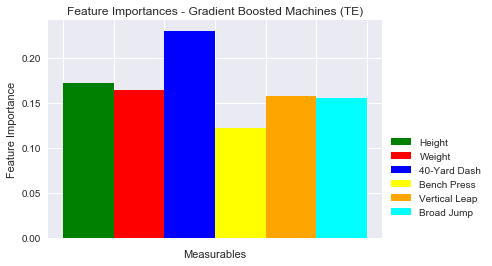

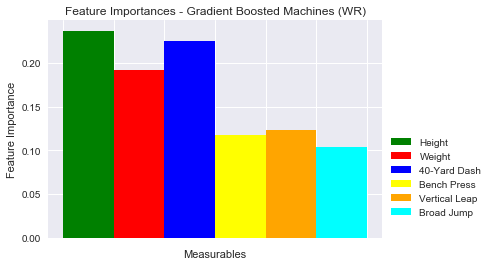

In [99]:
#Gradient Boosted Machine Feature Importances

#OL
FI_Height = [0.204]
FI_Weight = [0.196]
FI_40_Yard = [0.179]
FI_Bench_Press = [0.141]
FI_Vert_Leap = [0.134]
FI_Broad_Jump = [0.146]

ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Gradient Boosted Machines (OL)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()

#DB

FI_Height = [0.209]
FI_Weight = [0.147]
FI_40_Yard = [0.237]
FI_Bench_Press = [0.132]
FI_Vert_Leap = [0.149]
FI_Broad_Jump = [0.126]

ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Gradient Boosted Machines (DB)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()

#DL
FI_Height = [0.160]
FI_Weight = [0.179]
FI_40_Yard = [0.192]
FI_Bench_Press = [0.145]
FI_Vert_Leap = [0.198]
FI_Broad_Jump = [0.125]

ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Gradient Boosted Machines (DL)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()

#LB

FI_Height = [0.186]
FI_Weight = [0.178]
FI_40_Yard = [0.217]
FI_Bench_Press = [0.145]
FI_Vert_Leap = [0.155]
FI_Broad_Jump = [0.119]

ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Gradient Boosted Machines (LB)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()

#RB
FI_Height = [0.174]
FI_Weight = [0.221]
FI_40_Yard = [0.182]
FI_Bench_Press = [0.127]
FI_Vert_Leap = [0.149]
FI_Broad_Jump = [0.147]

ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Gradient Boosted Machines (RB)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()

#TE
FI_Height = [0.172]
FI_Weight = [0.164]
FI_40_Yard = [0.230]
FI_Bench_Press = [0.122]
FI_Vert_Leap = [0.157]
FI_Broad_Jump = [0.155]

ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Gradient Boosted Machines (TE)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()

#WR

FI_Height = [0.237]
FI_Weight = [0.192]
FI_40_Yard = [0.225]
FI_Bench_Press = [0.118]
FI_Vert_Leap = [0.123]
FI_Broad_Jump = [0.104]

ax = plt.subplot()

ind = 1

p1 = ax.bar(ind, FI_Height,width=0.2,color='green',align='edge')
p2 = ax.bar(ind+0.2, FI_Weight,width=0.2,color='red',align='edge')
p3 = ax.bar(ind+0.4, FI_40_Yard,width=0.2,color='blue',align='edge')
p4 = ax.bar(ind+0.6, FI_Bench_Press,width=0.2,color='yellow',align='edge')
p5 = ax.bar(ind+0.8, FI_Vert_Leap,width=0.2,color='orange',align='edge')
p6 = ax.bar(ind+1.0, FI_Broad_Jump,width=0.2,color='cyan',align='edge')


ax.set_title('Feature Importances - Gradient Boosted Machines (WR)')
ax.set_xticklabels([])
plt.xlabel('Measurables')
plt.ylabel('Feature Importance')
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Height', 'Weight', '40-Yard Dash', 'Bench Press', 'Vertical Leap', 'Broad Jump'), loc = 0, bbox_to_anchor=(1, 0.5))
plt.show()